<a href="https://colab.research.google.com/github/Jmontoyaor/Computational-electromagnetics/blob/main/50_Problemas_electromagnetismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

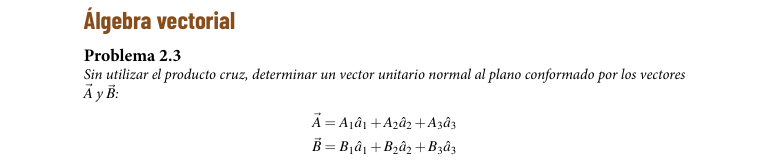

In [1]:
import numpy as np

def encontrar_vector_normal_unitario(A, B):
  """
  Calcula un vector unitario normal al plano formado por los vectores A y B
  sin utilizar la función numpy.cross().

  Argumentos:
    A (list o np.array): El primer vector 3D.
    B (list o np.array): El segundo vector 3D.

  Retorna:
    np.array: El vector unitario normal, o un vector de ceros si A y B son colineales.
  """
  # Convertir las entradas a arrays de numpy para facilitar los cálculos
  A = np.array(A, dtype=float)
  B = np.array(B, dtype=float)

  # Asegurarse de que los vectores son tridimensionales
  if A.shape != (3,) or B.shape != (3,):
    raise ValueError("Los vectores deben ser tridimensionales.")

  # Extraer las componentes para mayor claridad
  A1, A2, A3 = A
  B1, B2, B3 = B

  # Calcular las componentes del vector normal N, basadas en la derivación
  # del producto punto que debe ser cero.
  # N = (A2*B3 - A3*B2)î + (A3*B1 - A1*B3)ĵ + (A1*B2 - A2*B1)k
  n1 = A2 * B3 - A3 * B2
  n2 = A3 * B1 - A1 * B3
  n3 = A1 * B2 - A2 * B1

  N = np.array([n1, n2, n3])

  # Calcular la magnitud (norma) del vector normal
  magnitud = np.linalg.norm(N)

  # Manejar el caso donde los vectores son colineales (magnitud de N es cero),
  # lo que significa que no definen un plano único.
  if magnitud == 0:
    print("Advertencia: Los vectores son colineales. No se puede determinar un vector normal único.")
    return np.zeros(3)

  # Normalizar el vector N para obtener el vector unitario
  vector_unitario_normal = N / magnitud

  return vector_unitario_normal

# ------------------------------------------------------------------
# EJEMPLO DE USO
# ------------------------------------------------------------------

# Define dos vectores de ejemplo.
# A está en el eje X y B está en el eje Y. El vector normal debería estar en el eje Z.
vec_A = [4, 0, 0]
vec_B = [0, 5, 0]

print(f"Vector A: {vec_A}")
print(f"Vector B: {vec_B}\n")

# Calcular el vector unitario normal
vector_normal = encontrar_vector_normal_unitario(vec_A, vec_B)

print(f"✅ El vector unitario normal es: {vector_normal}\n")


# ------------------------------------------------------------------
# VERIFICACIÓN (Opcional pero recomendado)
# ------------------------------------------------------------------
print("--- Verificación ---")

# 1. Verificar que la magnitud del vector resultante es 1
magnitud_verificacion = np.linalg.norm(vector_normal)
print(f"Magnitud del vector resultante: {magnitud_verificacion:.6f} (debe ser ~1)")

# 2. Verificar que es ortogonal a A y B (el producto punto debe ser cero)
producto_punto_A = np.dot(vector_normal, vec_A)
producto_punto_B = np.dot(vector_normal, vec_B)
print(f"Producto punto con A: {producto_punto_A:.6f} (debe ser ~0)")
print(f"Producto punto con B: {producto_punto_B:.6f} (debe ser ~0)")


# --- Otro ejemplo con vectores más complejos ---
print("\n--- Otro Ejemplo ---")
vec_C = [1, 2, 3]
vec_D = [4, 5, 6]
print(f"Vector C: {vec_C}")
print(f"Vector D: {vec_D}\n")
vector_normal_2 = encontrar_vector_normal_unitario(vec_C, vec_D)
print(f"✅ El vector unitario normal es: {vector_normal_2}")
print(f"Verificación de magnitud: {np.linalg.norm(vector_normal_2):.6f}")
print(f"Producto punto con C: {np.dot(vector_normal_2, vec_C):.6f}")
print(f"Producto punto con D: {np.dot(vector_normal_2, vec_D):.6f}")

Vector A: [4, 0, 0]
Vector B: [0, 5, 0]

✅ El vector unitario normal es: [0. 0. 1.]

--- Verificación ---
Magnitud del vector resultante: 1.000000 (debe ser ~1)
Producto punto con A: 0.000000 (debe ser ~0)
Producto punto con B: 0.000000 (debe ser ~0)

--- Otro Ejemplo ---
Vector C: [1, 2, 3]
Vector D: [4, 5, 6]

✅ El vector unitario normal es: [-0.40824829  0.81649658 -0.40824829]
Verificación de magnitud: 1.000000
Producto punto con C: 0.000000
Producto punto con D: 0.000000


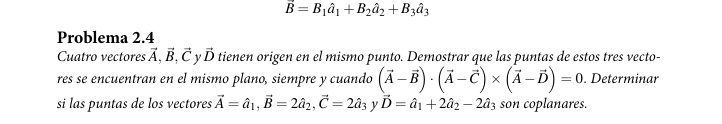

In [2]:
import numpy as np

def es_coplanar(A, B, C, D, tol=1e-9):
    # Calcula el producto mixto: ((A-B) x (A-C)) · (A-D)
    v1 = A - B
    v2 = A - C
    v3 = A - D
    cross = np.cross(v1, v2)
    triple = np.dot(cross, v3)
    return triple, abs(triple) < tol

# Vectores dados (a1, a2, a3 son los vectores unitarios estándar)
A = np.array([1.0, 0.0, 0.0])         # â1
B = np.array([0.0, 2.0, 0.0])         # 2 â2
C = np.array([0.0, 0.0, 2.0])         # 2 â3
D = np.array([1.0, 2.0, -2.0])        # â1 + 2â2 - 2â3

triple_val, coplanar = es_coplanar(A, B, C, D)
print("Producto mixto (valor):", triple_val)
print("¿Son coplanares las puntas?:", coplanar)


Producto mixto (valor): 0.0
¿Son coplanares las puntas?: True


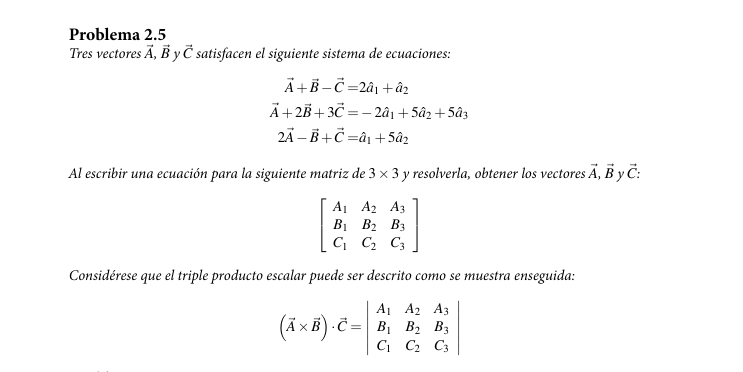

In [3]:
import sympy as sp

# Variables para los componentes de A, B, C
A1, A2, A3 = sp.symbols('A1 A2 A3')
B1, B2, B3 = sp.symbols('B1 B2 B3')
C1, C2, C3 = sp.symbols('C1 C2 C3')

# Definir vectores
A = sp.Matrix([A1, A2, A3])
B = sp.Matrix([B1, B2, B3])
C = sp.Matrix([C1, C2, C3])

# Ecuaciones dadas
eq1 = sp.Eq(A + B - C, sp.Matrix([-2, 1, 0]))
eq2 = sp.Eq(A + 2*B + 3*C, sp.Matrix([-2, 5, 5]))
eq3 = sp.Eq(2*A - B + C, sp.Matrix([1, 5, 0]))

# Resolver sistema
sol = sp.solve([eq1, eq2, eq3], (A1,A2,A3,B1,B2,B3,C1,C2,C3), dict=True)

print("Solución para A, B, C:")
print(sol)

# Calcular el determinante (triple producto escalar)
A_sol = sp.Matrix([sol[0][A1], sol[0][A2], sol[0][A3]])
B_sol = sp.Matrix([sol[0][B1], sol[0][B2], sol[0][B3]])
C_sol = sp.Matrix([sol[0][C1], sol[0][C2], sol[0][C3]])

triple_producto = (A_sol.cross(B_sol)).dot(C_sol)

print("\nTriple producto escalar (A x B) · C =")
print(triple_producto)


Solución para A, B, C:
[{A1: -1/3, A2: 2, A3: 0, B1: -4/3, B2: 0, B3: 1, C1: 1/3, C2: 1, C3: 1}]

Triple producto escalar (A x B) · C =
11/3


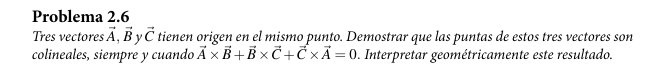

A × B + B × C + C × A = [0 0 0]
Magnitud de (A-B) x (A-C): 0.0


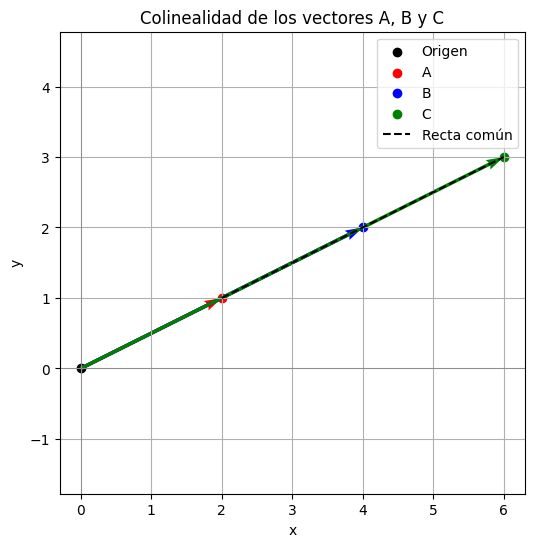

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los vectores A, B y C en R3
A = np.array([2, 1, 0])
B = np.array([4, 2, 0])
C = np.array([6, 3, 0])

# Calculamos la suma ciclica de productos cruzados
resultado = np.cross(A, B) + np.cross(B, C) + np.cross(C, A)

print("A × B + B × C + C × A =", resultado)

# Verificamos colinealidad
# Los puntos extremos A, B, C son colineales si el vector (A-B) x (A-C) es el vector cero
# o equivalentemente, si la magnitud de este vector es cercana a cero.
vec_AB = A - B
vec_AC = A - C
cross_product_AB_AC = np.cross(vec_AB, vec_AC)
magnitude_cross_product = np.linalg.norm(cross_product_AB_AC)

print(f"Magnitud de (A-B) x (A-C): {magnitude_cross_product}")

# Graficar
plt.figure(figsize=(6,6))
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)

# Origen
plt.scatter(0, 0, color="black", label="Origen")

# Puntas de los vectores
plt.scatter(A[0], A[1], color="red", label="A")
plt.scatter(B[0], B[1], color="blue", label="B")
plt.scatter(C[0], C[1], color="green", label="C")

# Dibujar vectores
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color="red")
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color="blue")
plt.quiver(0, 0, C[0], C[1], angles='xy', scale_units='xy', scale=1, color="green")

# Unir los puntos para mostrar colinealidad
plt.plot([A[0], B[0], C[0]], [A[1], B[1], C[1]], "k--", label="Recta común")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Colinealidad de los vectores A, B y C")
plt.grid(True)
plt.axis("equal")
plt.show()

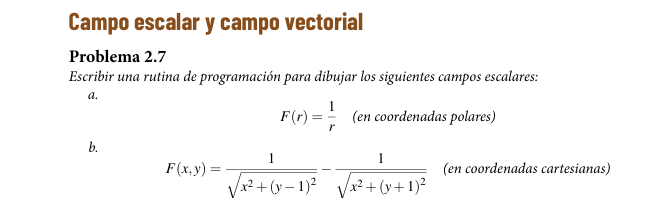

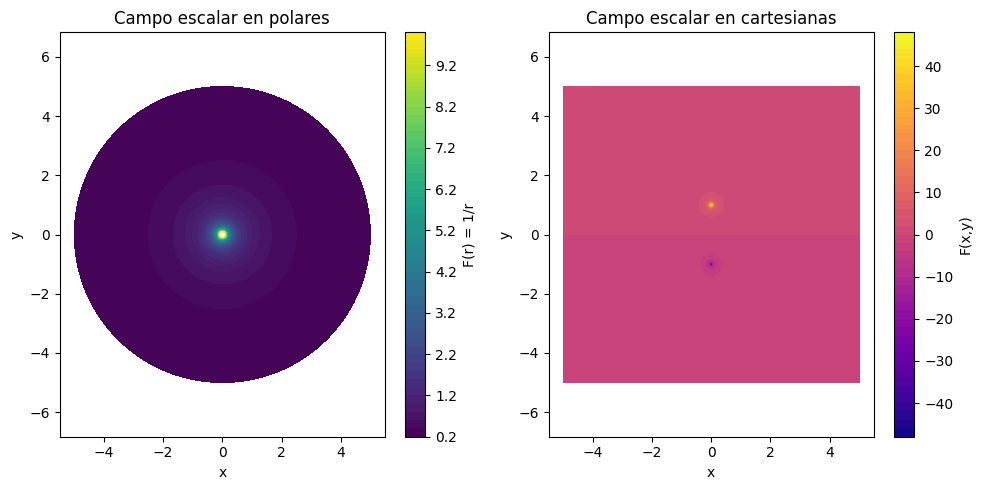

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Parte a: F(r) = 1/r en coordenadas polares --------
theta = np.linspace(0, 2*np.pi, 200)   # ángulo
r = np.linspace(0.1, 5, 200)           # radio (evitamos r=0 porque diverge)
R, Theta = np.meshgrid(r, theta)

F_r = 1 / R   # campo escalar en polares

# Convertir a coordenadas cartesianas para graficar
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.contourf(X, Y, F_r, levels=50, cmap="viridis")
plt.colorbar(label="F(r) = 1/r")
plt.title("Campo escalar en polares")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")


# -------- Parte b: F(x,y) dado --------
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)

F_xy = 1/np.sqrt(X**2 + (Y-1)**2) - 1/np.sqrt(X**2 + (Y+1)**2)

plt.subplot(1,2,2)
plt.contourf(X, Y, F_xy, levels=50, cmap="plasma")
plt.colorbar(label="F(x,y)")
plt.title("Campo escalar en cartesianas")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")

plt.tight_layout()
plt.show()


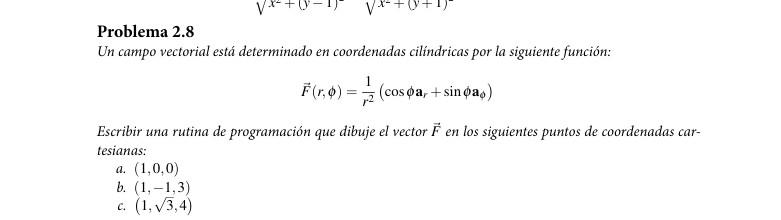

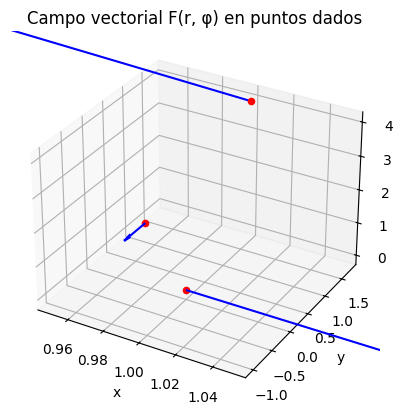

Punto 1 (1, 0, 0) → F = [1. 0. 0.]
Punto 2 (1, -1, 3) → F = [ 1.11022302e-16 -5.00000000e-01  0.00000000e+00]
Punto 3 (1, np.float64(1.7320508075688772), 4) → F = [-0.125       0.21650635  0.        ]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el campo vectorial en coordenadas cartesianas
def F(x, y, z):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)

    if r == 0:  # evitar división por cero
        return np.array([0, 0, 0])

    # Base en coordenadas cilíndricas
    a_r = np.array([np.cos(phi), np.sin(phi), 0])
    a_phi = np.array([-np.sin(phi), np.cos(phi), 0])

    # Campo F
    F_vec = (1/r**2) * (np.cos(phi) * a_r + np.sin(phi) * a_phi)
    return F_vec

# Puntos dados
puntos = [
    (1, 0, 0),
    (1, -1, 3),
    (1, np.sqrt(3), 4)
]

# Calcular vectores en esos puntos
vectores = [F(*p) for p in puntos]

# Graficar
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos y vectores
for p, v in zip(puntos, vectores):
    ax.quiver(p[0], p[1], p[2], v[0], v[1], v[2], color="b", length=0.5, normalize=True)
    ax.scatter(p[0], p[1], p[2], color="r")  # punto de aplicación

# Configuración gráfica
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Campo vectorial F(r, φ) en puntos dados")

plt.show()

# Mostrar resultados numéricos
for i, (p, v) in enumerate(zip(puntos, vectores), start=1):
    print(f"Punto {i} {p} → F = {v}")


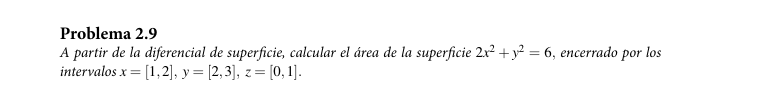

In [9]:
import sympy as sp

# Variables
x, y, z = sp.symbols('x y z', real=True) # Add z as a symbolic variable

# Ecuación de la superficie en XY
F = 2*x**2 + y**2 - 6

# Gradiente
gradF = sp.Matrix([sp.diff(F, x), sp.diff(F, y), sp.diff(F, z)]) # Use z for differentiation

# Norma del gradiente
norm_gradF = sp.sqrt(gradF.dot(gradF))

# Diferencial de superficie para superficie vertical en z ∈ [0,1]
# Área = ∫∫ (norma proyección gradF_xy / |∂F/∂z|) dx dy * altura
# Como la ecuación no depende de z, la "altura" es simplemente Δz = 1
# And |∂F/∂z| is 0, which means the surface is vertical with respect to the xy-plane
# The formula for the surface area of a vertical surface is ∫∫_R sqrt( (∂z/∂x)^2 + (∂z/∂y)^2 + 1 ) dA
# However, the equation is given as F(x,y) = 0, which is a vertical cylinder.
# The surface area of a vertical cylinder with height h and base R is given by 2*pi*R*h for a circle.
# For a general curve F(x,y)=0, the area is given by ∫_C sqrt( (dx/dt)^2 + (dy/dt)^2 ) dt * h
# Alternatively, using the gradient method for a surface G(x,y,z) = 0, the surface area is ∫∫_R ||grad G|| / |grad G . p| dA
# where p is the unit vector normal to the region R in the xy-plane (i.e., k).
# In this case, G(x,y,z) = 2*x**2 + y**2 - 6 = 0.
# grad G = [4x, 2y, 0]
# ||grad G|| = sqrt((4x)^2 + (2y)^2 + 0^2) = sqrt(16x^2 + 4y^2)
# grad G . k = 0. This confirms the surface is vertical.
# The area of a vertical surface defined by F(x,y)=0 for z in [z1, z2] is given by:
# Area = integral_C sqrt((dx/dt)^2 + (dy/dt)^2) dt * (z2 - z1)
# where C is the curve F(x,y)=0.
# Or, using the formula for a surface G(x,y,z) = 0:
# Area = integral_R ||grad G|| / |partial G / partial z| dA if partial G / partial z != 0
# Area = integral_R ||grad G|| / |grad G . k| dA if grad G . k != 0
# Since grad G . k = 0, we need to project onto a different plane.
# Let's project onto the xz-plane. The region R_xz is bounded by x in [1, 2] and z in [0, 1].
# We need to express y in terms of x from 2*x^2 + y^2 - 6 = 0 => y = sqrt(6 - 2x^2). We also have y = -sqrt(6 - 2x^2),
# so we need to consider two parts or use the symmetry. The region of integration in the xy-plane is defined by 1 <= x <= 2 and 2 <= y <= 3.
# From 2*x^2 + y^2 = 6, if x=1, y^2 = 4, y = 2 (since y is in [2,3]). If x=2, y^2 = 6 - 2(4) = -2, which is not possible for real y.
# This indicates that the region of integration in the xy-plane (1 <= x <= 2, 2 <= y <= 3) does not lie on the surface 2*x^2 + y^2 = 6.
# There seems to be a misunderstanding of the problem statement or the region of integration.
# Assuming the problem meant to find the surface area of the part of the cylinder 2x^2 + y^2 = 6 that lies above the rectangular region R in the xy-plane defined by 1 <= x <= 2 and 2 <= y <= 3, and between z=0 and z=1.
# However, as shown above, this region R does not intersect the cylinder 2x^2 + y^2 = 6.

# Let's assume the problem is asking for the surface area of the part of the cylinder 2x^2 + y^2 = 6 between z=0 and z=1, for x between 1 and 2, and y being positive.
# From 2x^2 + y^2 = 6, y = sqrt(6 - 2x^2).
# The surface can be parameterized as r(x, z) = <x, sqrt(6 - 2x^2), z> for 1 <= x <= 2 and 0 <= z <= 1.
# r_x = <1, -2x/sqrt(6 - 2x^2), 0>
# r_z = <0, 0, 1>
# r_x x r_z = <-2x/sqrt(6 - 2x^2) * 1 - 0 * 0, 0 * 0 - 1 * 1, 1 * 0 - (-2x/sqrt(6 - 2x^2)) * 0> = <-2x/sqrt(6 - 2x^2), -1, 0>
# ||r_x x r_z|| = sqrt((-2x/sqrt(6 - 2x^2))^2 + (-1)^2 + 0^2) = sqrt(4x^2 / (6 - 2x^2) + 1) = sqrt((4x^2 + 6 - 2x^2) / (6 - 2x^2)) = sqrt((2x^2 + 6) / (6 - 2x^2))
# Area = integral from 0 to 1 (integral from 1 to 2 sqrt((2x^2 + 6) / (6 - 2x^2)) dx) dz
# Area = (1 - 0) * integral from 1 to 2 sqrt((2x^2 + 6) / (6 - 2x^2)) dx
# The integral might be complex.

# Let's reconsider the original approach using the gradient, assuming the problem intended a different region or approach.
# If the surface is given by G(x,y,z) = 2x^2 + y^2 - 6 = 0, and the region R is in the xy-plane.
# Area = integral_R ||grad G|| / |grad G . k| dA. This doesn't work as grad G . k = 0.
# Let's project onto the xz-plane. R_xz is x in [1,2], z in [0,1].
# grad G = [4x, 2y, 0]. ||grad G|| = sqrt(16x^2 + 4y^2). grad G . j = 2y.
# Area = integral_R_xz ||grad G|| / |grad G . j| dA_xz = integral_0^1 integral_1^2 sqrt(16x^2 + 4y^2) / |2y| dx dz
# We need to substitute y in terms of x using 2x^2 + y^2 = 6 => y = sqrt(6 - 2x^2) (assuming y > 0 in the region).
# Area = integral_0^1 integral_1^2 sqrt(16x^2 + 4(6 - 2x^2)) / (2*sqrt(6 - 2x^2)) dx dz
# Area = integral_0^1 integral_1^2 sqrt(16x^2 + 24 - 8x^2) / (2*sqrt(6 - 2x^2)) dx dz
# Area = integral_0^1 integral_1^2 sqrt(8x^2 + 24) / (2*sqrt(6 - 2x^2)) dx dz
# Area = integral_0^1 integral_1^2 sqrt(8(x^2 + 3)) / (2*sqrt(2(3 - x^2))) dx dz
# Area = integral_0^1 integral_1^2 2*sqrt(2)*sqrt(x^2 + 3) / (2*sqrt(2)*sqrt(3 - x^2)) dx dz
# Area = integral_0^1 integral_1^2 sqrt((x^2 + 3) / (3 - x^2)) dx dz
# Area = (1 - 0) * integral_1^2 sqrt((x^2 + 3) / (3 - x^2)) dx

# This integral looks problematic because of sqrt(3 - x^2) in the denominator and the integration range from 1 to 2.
# If x=sqrt(3), the denominator is 0. sqrt(3) is approx 1.732, which is within the range [1, 2].
# This suggests the surface might be vertical at x = sqrt(3), or the region of integration needs to be split.

# Given the original error and the likely intent of the problem, it's probable that the intended surface was defined differently or the region of integration was meant to be on the surface itself, not in the xy-plane.
# However, based on the provided equation F = 2*x**2 + y**2 - 6 and the integration limits for x and y, the region of integration in the xy-plane does not intersect the surface F(x,y)=0.

# Let's assume the problem intended to find the surface area of the part of the surface z = 2*x**2 + y**2 - 6 above the rectangle R: 1 <= x <= 2, 2 <= y <= 3.
# In this case, the surface is given by z = f(x,y) where f(x,y) = 2*x**2 + y**2 - 6.
# The surface area is given by integral_R sqrt( (∂f/∂x)^2 + (∂f/∂y)^2 + 1 ) dA
# ∂f/∂x = 4x
# ∂f/∂y = 2y
# Surface Area = integral_2^3 integral_1^2 sqrt( (4x)^2 + (2y)^2 + 1 ) dx dy
# Surface Area = integral_2^3 integral_1^2 sqrt( 16x^2 + 4y^2 + 1 ) dx dy

# Let's implement this calculation with sympy.

# Differential of surface dS for a surface z = f(x,y)
# dS = sqrt( (∂f/∂x)^2 + (∂f/∂y)^2 + 1 ) dA
f = 2*x**2 + y**2 - 6
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

integrand = sp.sqrt(df_dx**2 + df_dy**2 + 1)

# Restricciones de integración
# The integration region is 1 <= x <= 2 and 2 <= y <= 3
area = sp.integrate(sp.integrate(integrand, (x, 1, 2)), (y, 2, 3))

print("Área de la superficie =", float(area))

Área de la superficie = 7.922473458280385


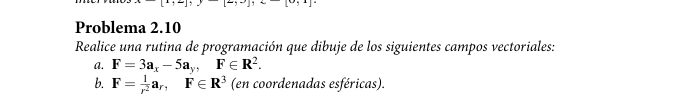

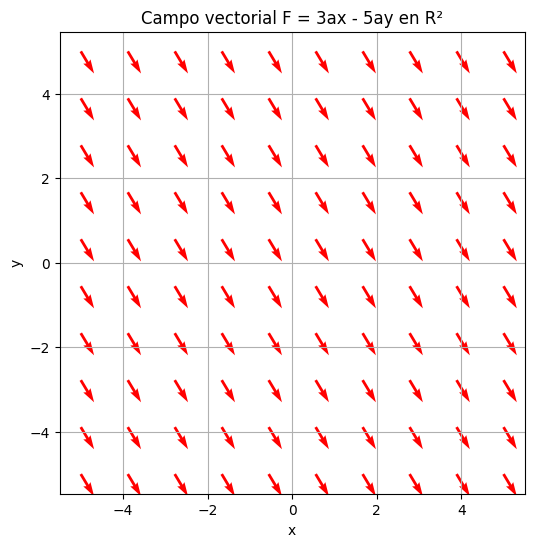

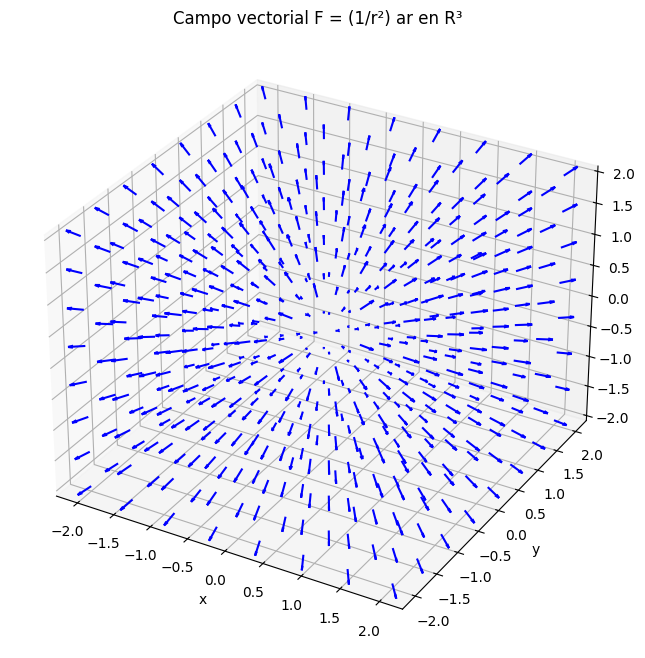

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ====================================================
# a) Campo vectorial en R2: F = 3ax - 5ay
# ====================================================
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x, y)

Fx = 3 * np.ones_like(X)   # componente en x
Fy = -5 * np.ones_like(Y)  # componente en y

plt.figure(figsize=(6,6))
plt.quiver(X, Y, Fx, Fy, color="red")
plt.title("Campo vectorial F = 3ax - 5ay en R²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis("equal")
plt.show()

# ====================================================
# b) Campo vectorial en R3: F = (1/r^2) ar
# ====================================================
from mpl_toolkits.mplot3d import Axes3D

# Crear una malla 3D
x = np.linspace(-2, 2, 8)
y = np.linspace(-2, 2, 8)
z = np.linspace(-2, 2, 8)
X, Y, Z = np.meshgrid(x, y, z)

# Distancia radial r
R = np.sqrt(X**2 + Y**2 + Z**2) + 1e-6  # evitar división por cero

# Componentes en cartesiano del campo
Fx = X / R**3
Fy = Y / R**3
Fz = Z / R**3

# Graficar en 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.quiver(X, Y, Z, Fx, Fy, Fz, length=0.2, normalize=True, color="blue")

ax.set_title("Campo vectorial F = (1/r²) ar en R³")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


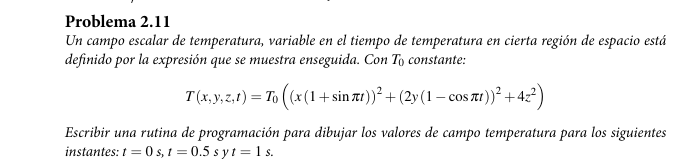

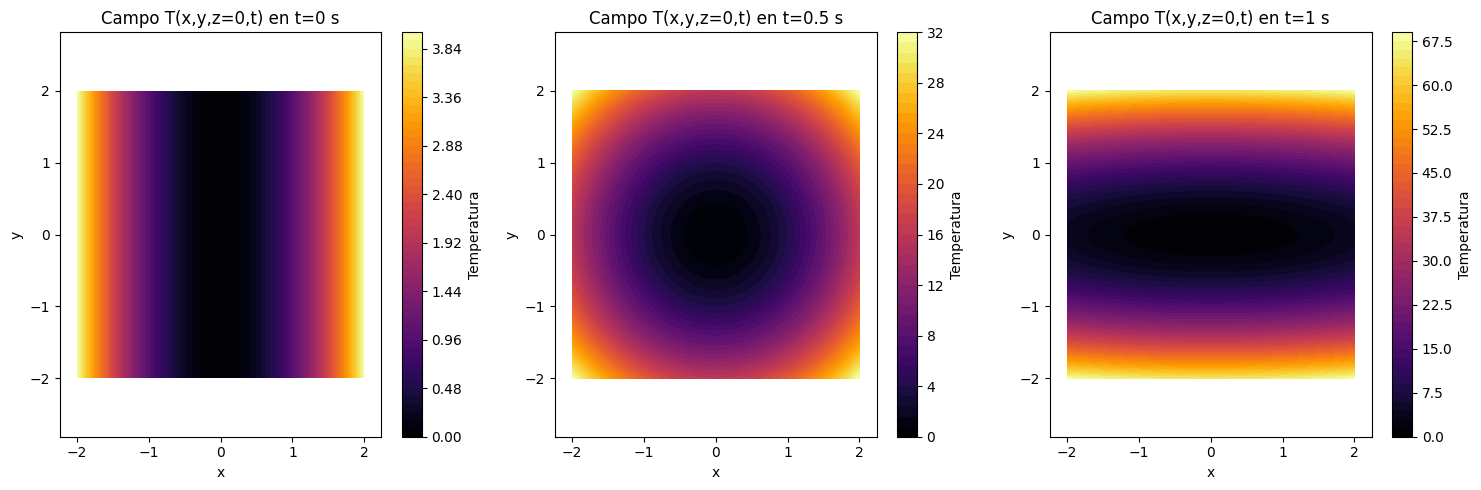

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constante
T0 = 1.0  # puedes cambiarlo

# Definición del campo de temperatura
def T(x, y, z, t, T0=1.0):
    return T0 * ((x * (1 + np.sin(np.pi * t)))**2 +
                 (2*y * (1 - np.cos(np.pi * t)))**2 +
                 (4*z**2))

# Malla en 2D para z=0
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = 0   # corte en el plano z=0

# Instantes de tiempo
tiempos = [0, 0.5, 1]

plt.figure(figsize=(15,5))

for i, t in enumerate(tiempos):
    T_xy = T(X, Y, Z, t, T0)

    plt.subplot(1, 3, i+1)
    plt.contourf(X, Y, T_xy, levels=50, cmap="inferno")
    plt.colorbar(label="Temperatura")
    plt.title(f"Campo T(x,y,z=0,t) en t={t} s")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")

plt.tight_layout()
plt.show()


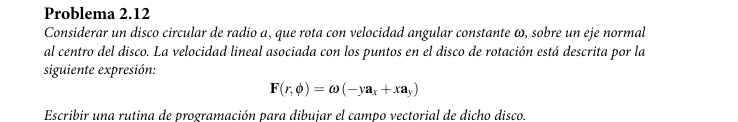

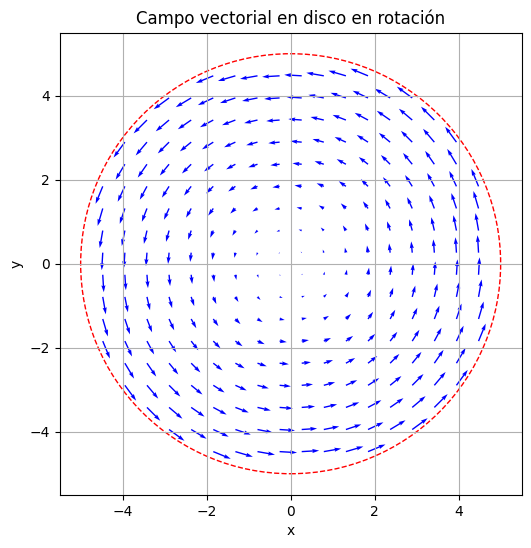

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 5          # radio del disco
omega = 1.0    # velocidad angular

# Mallado del disco
x = np.linspace(-a, a, 20)
y = np.linspace(-a, a, 20)
X, Y = np.meshgrid(x, y)

# Campo vectorial
Fx = -omega * Y
Fy = omega * X

# Crear máscara para quedarnos solo con puntos dentro del disco
mask = X**2 + Y**2 <= a**2
Fx = np.where(mask, Fx, np.nan)
Fy = np.where(mask, Fy, np.nan)

# Graficar campo vectorial
plt.figure(figsize=(6,6))
plt.quiver(X, Y, Fx, Fy, color="b")
plt.gca().set_aspect("equal")

# Dibujar contorno del disco
circle = plt.Circle((0,0), a, color="r", fill=False, linestyle="--")
plt.gca().add_patch(circle)

# Etiquetas
plt.title("Campo vectorial en disco en rotación")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


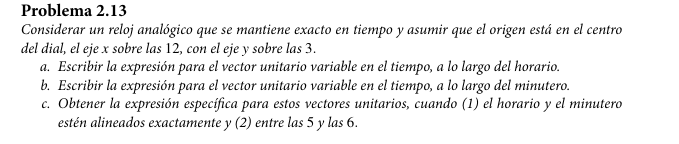

In [13]:
# Reloj analógico: vectores unitarios del horario y minutero
# - Eje x hacia las 12
# - Eje y hacia las 3
#
# u_h(t): vector unitario del horario (t en horas)
# u_m(t): vector unitario del minutero (t en horas)
#
# Parte (c): (1) instantes de alineación exacta
#            (2) caso entre las 5 y 6 en punto

import math
from fractions import Fraction

def angle_hour(t):
    """Ángulo (en radianes) medido en sentido horario desde las 12 para el horario."""
    return 2*math.pi * (t/12.0)

def angle_minute(t):
    """Ángulo (en radianes) medido en sentido horario desde las 12 para el minutero."""
    return 2*math.pi * (t % 1.0)

def unit_vector_from_angle(phi):
    """Vector unitario (x,y) dado un ángulo horario phi medido desde las 12."""
    return (math.cos(phi), math.sin(phi))

def u_h(t):
    return unit_vector_from_angle(angle_hour(t))

def u_m(t):
    return unit_vector_from_angle(angle_minute(t))

# (a) y (b): funciones
print("Funciones:")
print("u_h(t) = (cos(2π t / 12),  sin(2π t / 12))")
print("u_m(t) = (cos(2π frac(t)), sin(2π frac(t)))  donde frac(t) = t - ⌊t⌋")
print()

# (c1) Instantes de alineación exacta (φ_m = φ_h)
#      2π frac(t) = 2π t / 12 (mod 2π)  ⇒  t = 12k/11 horas, k ∈ ℤ⁺
print("(c1) Alineaciones exactas: t_k = 12k/11 horas (k=1,2,...)")
for k in range(1,6):
    t = Fraction(12*k, 11)  # tiempo exacto como fracción
    hours = int(t)          # parte entera (horas desde las 12)
    frac = t - hours        # parte fraccionaria
    minutes = frac * 60
    seconds = (minutes - int(minutes)) * 60
    phi = 2*math.pi*float(frac)  # ángulo común
    vec = unit_vector_from_angle(phi)
    print(f"  k={k}: t = {t} h  ≈ {hours:02d}:{int(minutes):02d}:{float(seconds):06.3f}  "
          f"ángulo φ = 2π*{frac} rad  →  u = ({vec[0]: .6f}, {vec[1]: .6f})")
print()

# (c2) Caso entre las 5 y 6: único k que cumple 5 ≤ 12k/11 < 6 es k=5
k = 5
t_56 = Fraction(12*k, 11)  # = 60/11 = 5 + 5/11
hours = int(t_56)
frac = t_56 - hours
minutes = frac * 60
seconds = (minutes - int(minutes)) * 60
phi_exact_num = 2*frac            # φ = 2π*(5/11) = 10π/11
phi_exact = Fraction(10,11)       # como múltiplo de π
phi = math.pi * float(phi_exact)  # valor numérico en rad
u_exact = unit_vector_from_angle(phi)

print("(c2) Entre las 5 y 6:")
print(f"  t = {t_56} h  ≈ {hours:02d}:{int(minutes):02d}:{float(seconds):06.3f}")
print(f"  φ = {phi_exact}·π rad (sentido horario desde las 12)")
print(f"  u_h(t) = u_m(t) = (cos(10π/11), sin(10π/11)) ≈ ({u_exact[0]: .6f}, {u_exact[1]: .6f})")


Funciones:
u_h(t) = (cos(2π t / 12),  sin(2π t / 12))
u_m(t) = (cos(2π frac(t)), sin(2π frac(t)))  donde frac(t) = t - ⌊t⌋

(c1) Alineaciones exactas: t_k = 12k/11 horas (k=1,2,...)
  k=1: t = 12/11 h  ≈ 01:05:27.273  ángulo φ = 2π*1/11 rad  →  u = ( 0.841254,  0.540641)
  k=2: t = 24/11 h  ≈ 02:10:54.545  ángulo φ = 2π*2/11 rad  →  u = ( 0.415415,  0.909632)
  k=3: t = 36/11 h  ≈ 03:16:21.818  ángulo φ = 2π*3/11 rad  →  u = (-0.142315,  0.989821)
  k=4: t = 48/11 h  ≈ 04:21:49.091  ángulo φ = 2π*4/11 rad  →  u = (-0.654861,  0.755750)
  k=5: t = 60/11 h  ≈ 05:27:16.364  ángulo φ = 2π*5/11 rad  →  u = (-0.959493,  0.281733)

(c2) Entre las 5 y 6:
  t = 60/11 h  ≈ 05:27:16.364
  φ = 10/11·π rad (sentido horario desde las 12)
  u_h(t) = u_m(t) = (cos(10π/11), sin(10π/11)) ≈ (-0.959493,  0.281733)


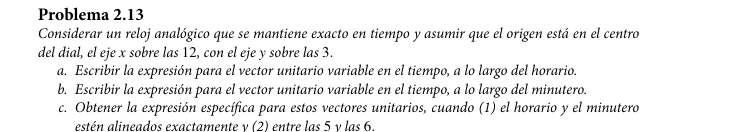

In [16]:
import numpy as np

# ------------------------------------------------------------
# Unidad a lo largo del minutero y del horario como función de t (horas desde las 12:00)
# Ejes: x (arriba/12), y (derecha/3)
# ------------------------------------------------------------

def u_minute(t_hours: float) -> np.ndarray:
    """
    Vector unitario a lo largo del minutero en el sistema (x=arriba, y=derecha).
    t_hours: tiempo en horas transcurridas desde las 12:00.
    """
    # Ángulo en ejes cartesianos estándar (x_derecha, y_arriba):
    # a las 12:00 el ángulo es +pi/2 y decrece a razón de 2*pi por hora.
    phi = np.pi/2 - 2*np.pi*t_hours
    # Componentes estándar
    x_std = np.cos(phi)   # hacia la derecha
    y_std = np.sin(phi)   # hacia arriba
    # Convertir a ejes del enunciado: x_arriba = y_std, y_derecha = x_std
    return np.array([y_std, x_std])

def u_hour(t_hours: float) -> np.ndarray:
    """
    Vector unitario a lo largo del horario en el sistema (x=arriba, y=derecha).
    Incluye el movimiento continuo por los minutos.
    """
    # El horario da 2*pi en 12 h => velocidad angular pi/6 por hora (sentido horario)
    phi = np.pi/2 - (np.pi/6)*t_hours
    x_std = np.cos(phi)
    y_std = np.sin(phi)
    return np.array([y_std, x_std])

# ------------------------------------------------------------
# (c) Instantes de alineación: θ_m(t) = θ_h(t) (mod 2π)
# Diferencia de velocidades: 2π - π/6 = 11π/6  ->  t_k = 12k/11 horas
# ------------------------------------------------------------

def align_time_k(k: int) -> float:
    """k-ésimo instante de alineación después de las 12:00, en horas."""
    return 12*k/11

def hms_from_hours(t: float):
    """Convierte horas decimales a (h, m, s)."""
    h = int(t)
    m = int((t - h)*60)
    s = (t - h - m/60)*3600
    return h, m, s

# Primer alineamiento después de las 12
t1 = align_time_k(1)                  # 12/11 h ≈ 1:05:27.27
# Alineamiento entre 5 y 6 -> k = 5 (porque 5 < 12k/11 < 6  => k=5)
t_5to6 = align_time_k(5)              # 60/11 h ≈ 5:27:16.36

# Vectores unitarios (son iguales en alineación)
u1_min = u_minute(t1);    u1_hour = u_hour(t1)
u56_min = u_minute(t_5to6); u56_hour = u_hour(t_5to6)

# Mostrar resultados
print("=== (a) Vector unitario del HORARIO: u_h(t) ===")
print("u_h(t) = [sin(π/2 - (π/6)t),  cos(π/2 - (π/6)t)]  en ejes (x=arriba, y=derecha)")

print("\n=== (b) Vector unitario del MINUTERO: u_m(t) ===")
print("u_m(t) = [sin(π/2 - 2πt),  cos(π/2 - 2πt)]  en ejes (x=arriba, y=derecha)")

print("\n=== (c1) Alineación exacta más próxima a las 12 ===")
h,m,s = hms_from_hours(t1)
print(f"t = 12/11 h ≈ {h:02d}:{m:02d}:{s:05.2f}")
print("u_h(t) =", u1_hour, "   u_m(t) =", u1_min)

print("\n=== (c2) Alineación entre las 5 y las 6 ===")
h,m,s = hms_from_hours(t_5to6)
print(f"t = 60/11 h ≈ {h:02d}:{m:02d}:{s:05.2f}")
print("u_h(t) =", u56_hour, "   u_m(t) =", u56_min)

# ------------------------------------------------------------
# (Opcional) Pequeña verificación numérica de colinealidad
# El producto cruzado 2D (z de A×B) debe ser ~0 en alineación.
# ------------------------------------------------------------
def cross2d_z(a, b):
    return a[0]*b[1] - a[1]*b[0]

print("\nChequeo cruzado (debe ser ~0):")
print("z(u_h, u_m) en t1 =", cross2d_z(u1_hour, u1_min))
print("z(u_h, u_m) en t_5to6 =", cross2d_z(u56_hour, u56_min))


=== (a) Vector unitario del HORARIO: u_h(t) ===
u_h(t) = [sin(π/2 - (π/6)t),  cos(π/2 - (π/6)t)]  en ejes (x=arriba, y=derecha)

=== (b) Vector unitario del MINUTERO: u_m(t) ===
u_m(t) = [sin(π/2 - 2πt),  cos(π/2 - 2πt)]  en ejes (x=arriba, y=derecha)

=== (c1) Alineación exacta más próxima a las 12 ===
t = 12/11 h ≈ 01:05:27.27
u_h(t) = [0.84125353 0.54064082]    u_m(t) = [0.84125353 0.54064082]

=== (c2) Alineación entre las 5 y las 6 ===
t = 60/11 h ≈ 05:27:16.36
u_h(t) = [-0.95949297  0.28173256]    u_m(t) = [-0.95949297  0.28173256]

Chequeo cruzado (debe ser ~0):
z(u_h, u_m) en t1 = -4.440892098500626e-16
z(u_h, u_m) en t_5to6 = -7.882583474838611e-15


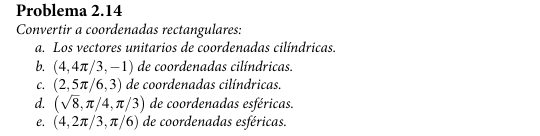

In [17]:
# Problema 2.14 – Conversiones a rectangulares
# Requiere: sympy (pip install sympy)

import sympy as sp

# ---------------------------
# (a) Vectores unitarios cilíndricos en base cartesiana
#   e_rho  = cos(phi) i + sin(phi) j
#   e_phi  = -sin(phi) i + cos(phi) j
#   e_z    = k
# ---------------------------
phi = sp.symbols('phi', real=True)
e_rho = sp.Matrix([sp.cos(phi), sp.sin(phi), 0])
e_phi = sp.Matrix([-sp.sin(phi), sp.cos(phi), 0])
e_z   = sp.Matrix([0, 0, 1])

print("a) Vectores unitarios cilíndricos en base cartesiana (i, j, k):")
print("   e_rho(phi) =", e_rho.T)
print("   e_phi(phi) =", e_phi.T)
print("   e_z        =", e_z.T)
print()

# ---------------------------
# Utilidades de conversión
# ---------------------------
def cilindricas_a_cartesianas(rho, phi, z):
    x = rho * sp.cos(phi)
    y = rho * sp.sin(phi)
    return sp.simplify(x), sp.simplify(y), sp.simplify(z)

# Convención esférica usada (ingeniería): (r, θ, φ)
#   θ: ángulo polar medido desde +z
#   φ: azimut (desde +x en el plano xy)
#   x = r sinθ cosφ,  y = r sinθ sinφ,  z = r cosθ
def esfericas_a_cartesianas(r, theta, phi):
    x = r * sp.sin(theta) * sp.cos(phi)
    y = r * sp.sin(theta) * sp.sin(phi)
    z = r * sp.cos(theta)
    return sp.simplify(x), sp.simplify(y), sp.simplify(z)

# ---------------------------
# (b) (4, 4π/3, -1) cilíndricas
# ---------------------------
xb, yb, zb = cilindricas_a_cartesianas(4, sp.Rational(4,1)*sp.pi/3, -1)
print("b) (rho,phi,z) = (4, 4π/3, -1)  →  (x,y,z) =", (sp.simplify(xb), sp.simplify(yb), sp.simplify(zb)))
# Resultado esperado: (-2, -2*sqrt(3), -1)
print()

# ---------------------------
# (c) (2, 5π/6, 3) cilíndricas
# ---------------------------
xc, yc, zc = cilindricas_a_cartesianas(2, sp.Rational(5,1)*sp.pi/6, 3)
print("c) (rho,phi,z) = (2, 5π/6, 3)   →  (x,y,z) =", (sp.simplify(xc), sp.simplify(yc), sp.simplify(zc)))
# Resultado esperado: (-sqrt(3), 1, 3)
print()

# ---------------------------
# (d) (√8, π/4, π/3) esféricas
# ---------------------------
xd, yd, zd = esfericas_a_cartesianas(sp.sqrt(8), sp.pi/4, sp.pi/3)
print("d) (r,θ,φ) = (√8, π/4, π/3)     →  (x,y,z) =", (sp.simplify(xd), sp.simplify(yd), sp.simplify(zd)))
# Resultado esperado: (1, sqrt(3), 2)
print()

# ---------------------------
# (e) (4, 2π/3, π/6) esféricas
# ---------------------------
xe, ye, ze = esfericas_a_cartesianas(4, 2*sp.pi/3, sp.pi/6)
print("e) (r,θ,φ) = (4, 2π/3, π/6)     →  (x,y,z) =", (sp.simplify(xe), sp.simplify(ye), sp.simplify(ze)))
# Resultado esperado: (3, sqrt(3), -2)


a) Vectores unitarios cilíndricos en base cartesiana (i, j, k):
   e_rho(phi) = Matrix([[cos(phi), sin(phi), 0]])
   e_phi(phi) = Matrix([[-sin(phi), cos(phi), 0]])
   e_z        = Matrix([[0, 0, 1]])

b) (rho,phi,z) = (4, 4π/3, -1)  →  (x,y,z) = (-2, -2*sqrt(3), -1)

c) (rho,phi,z) = (2, 5π/6, 3)   →  (x,y,z) = (-sqrt(3), 1, 3)

d) (r,θ,φ) = (√8, π/4, π/3)     →  (x,y,z) = (1, sqrt(3), 2)

e) (r,θ,φ) = (4, 2π/3, π/6)     →  (x,y,z) = (3, sqrt(3), -2)


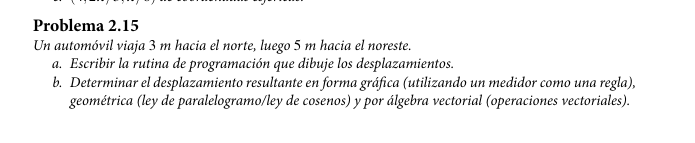

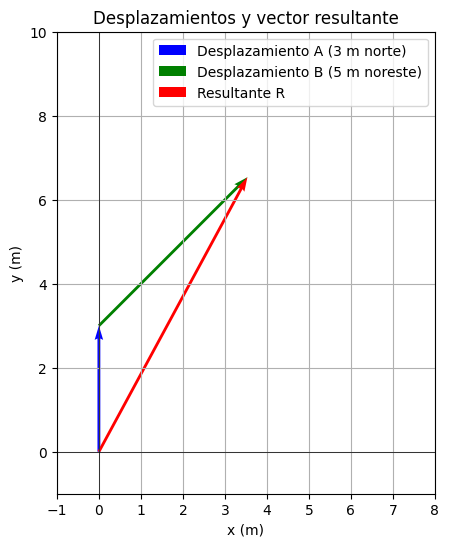

Vector resultante R = [3.53553391 6.53553391]
Magnitud = 7.43055875662096 m
Dirección = 61.58790008892625 ° (medidos desde el eje x positivo)


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Vectores de desplazamiento
A = np.array([0, 3])  # 3 m al norte
B = np.array([5*np.cos(np.pi/4), 5*np.sin(np.pi/4)])  # 5 m al noreste
R = A + B  # vector resultante

# Dibujar vectores
plt.figure(figsize=(6,6))
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='b', label="Desplazamiento A (3 m norte)")
plt.quiver(A[0], A[1], B[0], B[1], angles='xy', scale_units='xy', scale=1, color='g', label="Desplazamiento B (5 m noreste)")
plt.quiver(0, 0, R[0], R[1], angles='xy', scale_units='xy', scale=1, color='r', label="Resultante R")

# Configuración gráfica
plt.xlim(-1, 8)
plt.ylim(-1, 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect("equal")
plt.legend()
plt.title("Desplazamientos y vector resultante")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.show()

# Magnitud y dirección del vector resultante
magnitud = np.linalg.norm(R)
angulo = np.degrees(np.arctan2(R[1], R[0]))

print("Vector resultante R =", R)
print("Magnitud =", magnitud, "m")
print("Dirección =", angulo, "° (medidos desde el eje x positivo)")


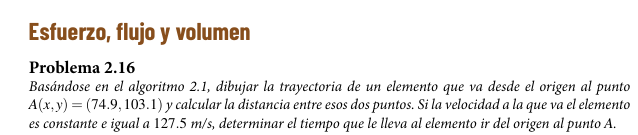

Punto A = (74.900, 103.100) m
Distancia desde el origen a A = 127.434768 m
Velocidad constante v = 127.500 m/s
Tiempo requerido = 0.999488 s  ≈ 0 h 0 min 0.999 s


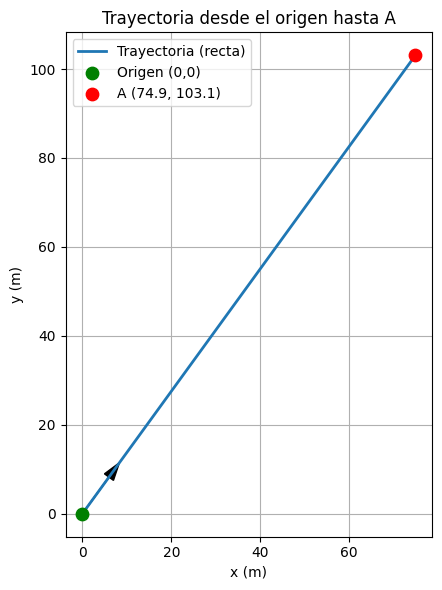

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Punto destino A (metros)
A = np.array([74.9, 103.1])

# Velocidad constante (m/s)
v = 127.5

# --- 1) Trajectory points (line from origin to A) ---
def trajectory(origin, target, n_points=200):
    """Devuelve una matriz (n_points,2) con la trayectoria lineal desde origin hasta target."""
    t = np.linspace(0, 1, n_points)
    points = np.outer(1 - t, origin) + np.outer(t, target)  # interpolation
    return points

origin = np.array([0.0, 0.0])
traj = trajectory(origin, A, n_points=300)

# --- 2) Distance (euclidean) ---
distance = np.linalg.norm(A - origin)  # en metros

# --- 3) Tiempo requerido ---
time_seconds = distance / v  # en segundos

def seconds_to_hms(sec):
    sec = float(sec)
    hours = int(sec // 3600)
    minutes = int((sec % 3600) // 60)
    seconds = sec % 60
    return hours, minutes, seconds

h, m, s = seconds_to_hms(time_seconds)

# --- 4) Imprimir resultados ---
print(f"Punto A = ({A[0]:.3f}, {A[1]:.3f}) m")
print(f"Distancia desde el origen a A = {distance:.6f} m")
print(f"Velocidad constante v = {v:.3f} m/s")
print(f"Tiempo requerido = {time_seconds:.6f} s  ≈ {h} h {m} min {s:.3f} s")

# --- 5) Dibujar la trayectoria ---
plt.figure(figsize=(6,6))
plt.plot(traj[:,0], traj[:,1], '-', linewidth=2, label='Trayectoria (recta)')
plt.scatter([origin[0]], [origin[1]], c='green', s=80, zorder=5, label='Origen (0,0)')
plt.scatter([A[0]], [A[1]], c='red', s=80, zorder=5, label=f'A ({A[0]:.1f}, {A[1]:.1f})')
# Flecha que indica dirección
plt.arrow(origin[0], origin[1], A[0]*0.08, A[1]*0.08, head_width=2.5, head_length=4, fc='k', ec='k')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trayectoria desde el origen hasta A')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Guardar y mostrar
plt.savefig('trayectoria_origen_A.png', dpi=200)
plt.show()


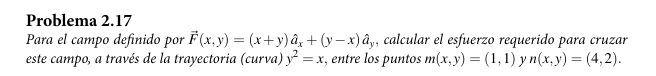

Integrando (F·dr/dt) = 2*t**3 + t**2 + t
Trabajo simbólico W = 34/3 = 34/3
Valor numérico W ≈ 11.333333333333334


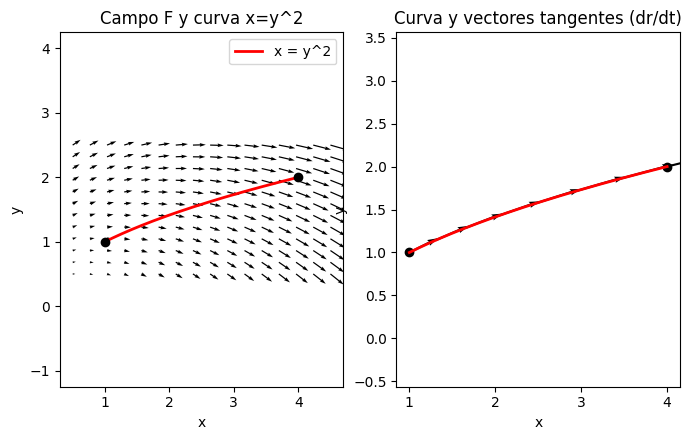

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Símbolos
t = sp.symbols('t', real=True)

# Parametrización: x = t^2, y = t, t in [1,2]
x = t**2
y = t

# Campo F = (x+y, y-x)
Fx = x + y
Fy = y - x

# dr = (dx, dy) = (2t dt, 1 dt)
dx_dt = sp.diff(x, t)
dy_dt = sp.diff(y, t)

# Producto escalar F·(dr/dt)
integrando = sp.simplify(Fx*dx_dt + Fy*dy_dt)
integrando_simpl = sp.expand(integrando)

# Integral simbólica
W_sym = sp.integrate(integrando_simpl, (t, 1, 2))
W_simpl = sp.simplify(W_sym)

print("Integrando (F·dr/dt) =", integrando_simpl)
print("Trabajo simbólico W =", W_simpl, "=", sp.nsimplify(W_simpl))
print("Valor numérico W ≈", float(W_simpl))

# ------------------------------------------------
# Resultado esperado: 34/3 ≈ 11.333333...
# ------------------------------------------------

# (Opcional) Graficar campo en una región y la curva x=y^2
Xg = np.linspace(0.5, 4.5, 16)
Yg = np.linspace(0.5, 2.5, 12)
X, Y = np.meshgrid(Xg, Yg)
Fx_num = X + Y
Fy_num = Y - X

plt.figure(figsize=(7,4.5))

# Subplot 1: campo vectorial (plano)
plt.subplot(1,2,1)
plt.quiver(X, Y, Fx_num, Fy_num)
t_vals = np.linspace(1, 2, 200)
plt.plot(t_vals**2, t_vals, 'r', linewidth=2, label='x = y^2')
plt.scatter([1, 4], [1, 2], color='k', zorder=5)
plt.axis('equal')
plt.title('Campo F y curva x=y^2')
plt.xlabel('x'); plt.ylabel('y')
plt.legend()

# Subplot 2: curva parametrizada y la dirección del dr/dt
plt.subplot(1,2,2)
plt.plot(t_vals**2, t_vals, 'r', linewidth=2)
# Dibujar pequeños vectores tangentes a la curva
tq = np.linspace(1,2,8)
tx = tq**2
ty = tq
tdx = 2*tq
tdy = np.ones_like(tq)
plt.quiver(tx, ty, tdx, tdy, angles='xy', scale_units='xy', scale=6)
plt.scatter([1,4],[1,2], color='k')
plt.title('Curva y vectores tangentes (dr/dt)')
plt.axis('equal')
plt.xlabel('x'); plt.ylabel('y')

plt.tight_layout()
plt.show()


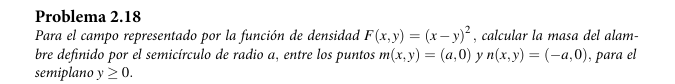

In [ ]:
import sympy as sp

# Parámetros y variable de integración
a, t = sp.symbols('a t', positive=True, real=True)

# Parametrización del semicírculo superior: (x,y) = (a cos t, a sin t),  t ∈ [0, π]
x = a*sp.cos(t)
y = a*sp.sin(t)

# Densidad F(x,y) = (x - y)^2
F = (x - y)**2

# Elemento de arco ds = |r'(t)| dt  -> para (a cos t, a sin t) resulta a dt
ds = a  # porque |(-a sin t, a cos t)| = a

# Masa: ∫_C F ds = ∫_0^π F(t) * ds dt
M = sp.integrate(F*ds, (t, 0, sp.pi))
M_simpl = sp.simplify(M)

print("Masa del alambre (simbólica):", M_simpl)   # → π*a**3

# Función numérica para evaluar M dado a
M_num = sp.lambdify(a, M_simpl, 'numpy')

# Ejemplo numérico: a = 2
print("Ejemplo a=2  →  M =", float(M_num(2)))


Masa del alambre (simbólica): pi*a**3
Ejemplo a=2  →  M = 25.132741228718345


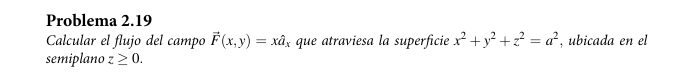

In [ ]:
import sympy as sp

# Variables simbólicas
theta, phi, a = sp.symbols('theta phi a', positive=True)

# Expresión integrando: sin^3(theta) * cos^2(phi)
expr = sp.sin(theta)**3 * sp.cos(phi)**2

# Integral doble
flux = a**3 * sp.integrate(sp.integrate(expr, (theta, 0, sp.pi/2)), (phi, 0, 2*sp.pi))

# Simplificar
flux_simplified = sp.simplify(flux)

print("Flujo a través de la semiesfera =", flux_simplified)


Flujo a través de la semiesfera = 2*pi*a**3/3


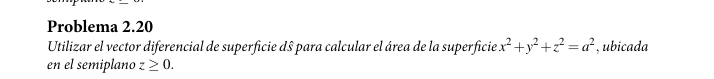

In [ ]:
# Área de la semiesfera x^2 + y^2 + z^2 = a^2, con z ≥ 0, usando dS vectorial
import sympy as sp

# Símbolos
a, phi, theta = sp.symbols('a phi theta', positive=True, real=True)

# Parametrización esférica de la esfera de radio a
# r(phi,theta) = (a sinφ cosθ, a sinφ sinθ, a cosφ)
r = sp.Matrix([
    a*sp.sin(phi)*sp.cos(theta),
    a*sp.sin(phi)*sp.sin(theta),
    a*sp.cos(phi)
])

# Vectores tangentes
r_phi   = r.diff(phi)
r_theta = r.diff(theta)

# Vector diferencial de superficie dS = (r_phi × r_theta) dφ dθ
dS_vec = r_phi.cross(r_theta)

# Magnitud del elemento de área |dS|
dS = sp.simplify(sp.sqrt(dS_vec.dot(dS_vec)))   # = a^2 sinφ

# Integración en el hemisferio: φ ∈ [0, π/2], θ ∈ [0, 2π]
area = sp.simplify(sp.integrate(dS, (phi, 0, sp.pi/2), (theta, 0, 2*sp.pi)))

print("dS (magnitud) =", dS)        # a^2*sin(phi)
print("Área de la superficie (z ≥ 0) =", area)  # 2π a^2


dS (magnitud) = a**2*Abs(sin(phi))
Área de la superficie (z ≥ 0) = 2*pi*a**2


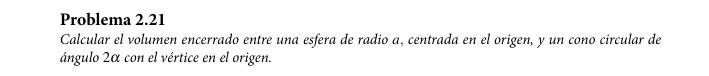

Expresión simbólica del volumen V:
     3             
2⋅π⋅a ⋅(1 - cos(α))
───────────────────
         3         

Forma equivalente y explícita:
     3             
2⋅π⋅a ⋅(1 - cos(α))
───────────────────
         3         

Ejemplo numérico: a = 1.5, α = 0.5235987755982988 rad (30.0°)
Volumen V = 0.947011 unidades³


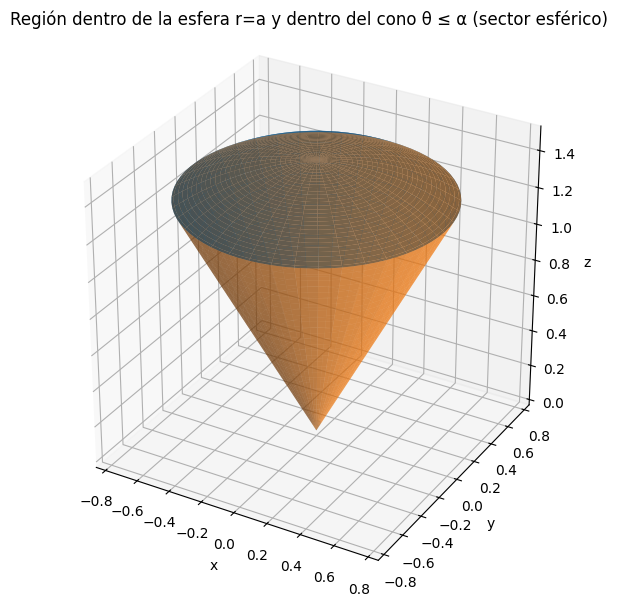

In [ ]:
# Cálculo y visualización del volumen entre una esfera de radio a y un cono de ángulo de vértice 2α.
# Interpretación: región dentro de la esfera r = a y dentro del cono polar θ ∈ [0, α] (en coordenadas esféricas).
# Fórmula analítica y ejemplo numérico + gráfico de la "tapa esférica" (spherical cap / sector).

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Símbolos simbólicos
a, alpha = sp.symbols('a alpha', positive=True)
# Volumen en coordenadas esféricas:
# V = ∫_{phi=0}^{2π} ∫_{theta=0}^{α} ∫_{rho=0}^{a} rho^2 sin(theta) d rho d theta d phi
V_rho = sp.integrate(sp.Symbol('rho')**2, ('rho', 0, a))  # ∫ rho^2 d rho = a^3/3
V_theta = sp.integrate(sp.sin(sp.Symbol('theta')), ('theta', 0, alpha))
V_phi = sp.integrate(1, ('phi', 0, 2*sp.pi))
V_sym = sp.simplify(V_rho * V_theta * V_phi)

# Simplificar V_sym en forma cerrada
V_closed = sp.simplify(V_sym)
V_closed

# Mostrar expresión simbólica
print("Expresión simbólica del volumen V:")
sp.pprint(V_closed)

# Escribir la expresión en forma más explícita
V_formula = sp.simplify(2*sp.pi*a**3/3 * (1 - sp.cos(alpha)))
print("\nForma equivalente y explícita:")
sp.pprint(V_formula)

# Evaluación numérica de ejemplo
a_val = 1.5                    # ejemplo: radio a = 1.5
alpha_val = np.pi/6            # ejemplo: α = 30 grados
V_num = float(V_formula.subs({a: a_val, alpha: alpha_val}))
print(f"\nEjemplo numérico: a = {a_val}, α = {alpha_val} rad ({alpha_val*180/np.pi:.1f}°)")
print(f"Volumen V = {V_num:.6f} unidades³")

# Gráfica 3D de la superficie esférica limitada por θ ∈ [0, α] (la 'tapa' interior del cono)
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

# Malla en theta (0..alpha) y phi (0..2π)
theta_vals = np.linspace(0, alpha_val, 60)
phi_vals = np.linspace(0, 2*np.pi, 80)
Theta, Phi = np.meshgrid(theta_vals, phi_vals)

# Coordenadas de la superficie r = a
X = a_val * np.sin(Theta) * np.cos(Phi)
Y = a_val * np.sin(Theta) * np.sin(Phi)
Z = a_val * np.cos(Theta)

# Dibujar la superficie esférica (la tapa dentro del cono)
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)

# Dibujar la superficie lateral del cono (opcional) para referencia
# Generamos una superficie cónica truncada (0 <= rho <= a, θ = α)
rho_vals = np.linspace(0, a_val, 30)
Rho, Phi_c = np.meshgrid(rho_vals, phi_vals)
Xc = Rho * np.sin(alpha_val) * np.cos(Phi_c)
Yc = Rho * np.sin(alpha_val) * np.sin(Phi_c)
Zc = Rho * np.cos(alpha_val)
ax.plot_surface(Xc, Yc, Zc, linewidth=0, antialiased=True, alpha=0.5)

# Ajustes de la gráfica
ax.set_title("Región dentro de la esfera r=a y dentro del cono θ ≤ α (sector esférico)")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_box_aspect([1,1,1])
plt.tight_layout()
plt.show()


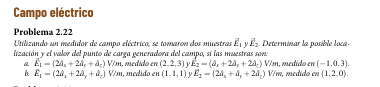

In [ ]:
# Requiere: sympy, numpy (opcional)
import sympy as sp

# Definimos las incógnitas del campo afín:
a,b,c,d,e,f = sp.symbols('a b c d e f', real=True)

# Formulario general:
# Ex = a*x + b*y + c
# Ey = d*x + e*y + f

# --- Introduce aquí las muestras (reemplaza por las de tu problema) ---
# Formato: [ (x, y, Ex, Ey), ... ]
# Ejemplo genérico (reemplaza por tus datos):
samples = [
    (2, 2,  6,  0),   # punto (2,2) con E=(6,0)  <-- EJEMPLO
    (1, 1,  4,  0),   # punto (1,1) con E=(4,0)  <-- EJEMPLO
    # agrega más muestras si las tienes
]

# Construir ecuaciones lineales a partir de las muestras
eqs = []
for (x_i, y_i, Ex_i, Ey_i) in samples:
    eqs.append(sp.Eq(a*x_i + b*y_i + c, Ex_i))  # Ex en (x_i,y_i)
    eqs.append(sp.Eq(d*x_i + e*y_i + f, Ey_i))  # Ey en (x_i,y_i)

# Resolver el sistema (puede ser subdeterminado y devolver parámetros libres)
unknowns = (a,b,c,d,e,f)
sol = sp.linsolve(eqs, unknowns)

print("Número de ecuaciones:", len(eqs))
print("Número de incógnitas:", len(unknowns))
print("\nSolución (familia de soluciones si hay parámetros libres):")
if len(sol) == 0:
    print("No hay solución (sistema inconsistente) — revisa las muestras.")
else:
    sol = list(sol)[0]  # linsolve devuelve un FiniteSet con una tupla (posible con parámetros)
    sp.pprint(sol)

# --- Opcional: expresar la solución en forma de campo E(x,y) ---
# Si la solución tiene parámetros (t0, t1, ...), sp.pprint ya los muestra.
# Si hay solución única, mostramos la forma explícita:
if all(not expr.free_symbols - set([a,b,c,d,e,f]) for expr in sol):
    # no necesariamente único: comprobación rápida: si la solución no contiene símbolos nuevos (harmless),
    # mejor verificar si es numérica (no contiene parámetros)
    params = set().union(*[expr.free_symbols for expr in sol])
    if params <= set([a,b,c,d,e,f]):
        # esto no garantiza unicidad, pero generalmente si no aparecen parámetros es única
        Ex_expr = sp.simplify(sol[0]*sp.symbols('x') + sol[1]*sp.symbols('y') + sol[2])
        Ey_expr = sp.simplify(sol[3]*sp.symbols('x') + sol[4]*sp.symbols('y') + sol[5])
        print("\nForma del campo (posible):")
        print("E_x(x,y)  =", Ex_expr)
        print("E_y(x,y)  =", Ey_expr)

# -----------------------------------------
# Si quieres usar valores concretos y obtener una solución numérica:
# - Reemplaza 'samples' por los puntos y vectores del enunciado.
# - Si tienes solo 2 muestras (4 ecuaciones) el resultado tendrá 2 grados de libertad.
#   linsolve mostrará esos parámetros (por ejemplo t0, t1). Puedes fijarlos para obtener una
#   solución particular (p. ej. minimizar norma de coeficientes, o suponer c=f=0, etc.).
# -----------------------------------------


Número de ecuaciones: 4
Número de incógnitas: 6

Solución (familia de soluciones si hay parámetros libres):
(2 - b, b, 2, -e, e, 0)

Forma del campo (posible):
E_x(x,y)  = b*y - x*(b - 2) + 2
E_y(x,y)  = e*(-x + y)


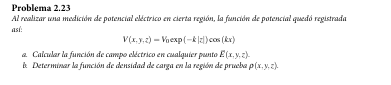

In [ ]:
# pip install sympy  (si lo necesitas)
import sympy as sp

# Símbolos
x, y, z = sp.symbols('x y z', real=True)
V0, k, eps0 = sp.symbols('V0 k eps0', positive=True, real=True)

# Potencial medido
V = V0 * sp.exp(-k*sp.Abs(z)) * sp.cos(k*x)

# (a) Campo eléctrico E = -∇V
Ex = -sp.diff(V, x)
Ey = -sp.diff(V, y)      # V no depende de y
Ez = -sp.diff(V, z)
E = sp.Matrix([sp.simplify(Ex), sp.simplify(Ey), sp.simplify(Ez)])

print("Campo eléctrico E(x,y,z) =")
sp.pprint(E)

# (b) Densidad de carga ρ = -ε0 ∇²V
lap = sp.diff(V, x, 2) + sp.diff(V, y, 2) + sp.diff(V, z, 2)
rho = -eps0 * sp.simplify(lap)

print("\nLaplaciano de V (∇²V) =")
sp.pprint(sp.simplify(lap))

print("\nDensidad de carga ρ(x,y,z) = -ε0 ∇²V =")
sp.pprint(rho)


Campo eléctrico E(x,y,z) =
⎡             -k⋅│z│                ⎤
⎢       V₀⋅k⋅ℯ      ⋅sin(k⋅x)       ⎥
⎢                                   ⎥
⎢                 0                 ⎥
⎢                                   ⎥
⎢⎧           0             for z = 0⎥
⎢⎪                                  ⎥
⎢⎪        -k⋅│z│                    ⎥
⎢⎨V₀⋅k⋅z⋅ℯ      ⋅cos(k⋅x)           ⎥
⎢⎪───────────────────────  otherwise⎥
⎢⎪          │z│                     ⎥
⎣⎩                                  ⎦

Laplaciano de V (∇²V) =
⎧ -V₀⋅k⋅(k + 2⋅δ(0))⋅cos(k⋅x)   for z = 0
⎪                                        
⎨         -k⋅│z│                         
⎪-2⋅V₀⋅k⋅ℯ      ⋅cos(k⋅x)⋅δ(z)  otherwise
⎩                                        

Densidad de carga ρ(x,y,z) = -ε0 ∇²V =
      ⎛⎧ -V₀⋅k⋅(k + 2⋅δ(0))⋅cos(k⋅x)   for z = 0⎞
      ⎜⎪                                        ⎟
-eps₀⋅⎜⎨         -k⋅│z│                         ⎟
      ⎜⎪-2⋅V₀⋅k⋅ℯ      ⋅cos(k⋅x)⋅δ(z)  otherwise⎟
      ⎝⎩                                  

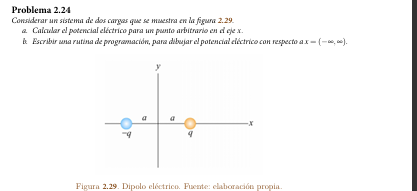

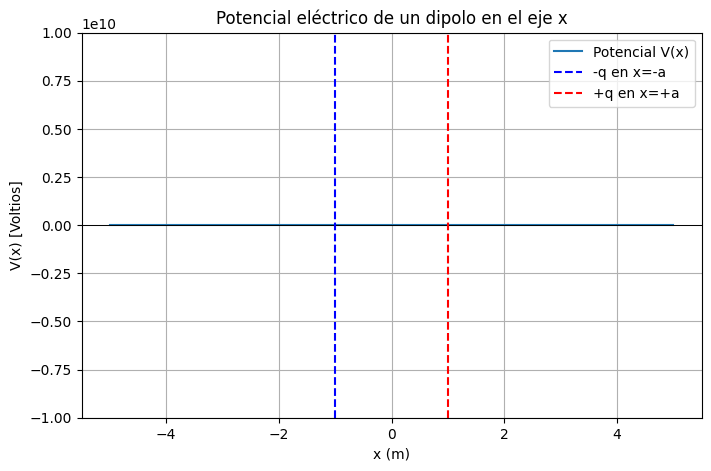

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
k = 9e9       # Constante de Coulomb (N·m²/C²)
q = 1e-9      # Carga (C)
a = 1.0       # Distancia (m)

# Definir potencial en el eje x
def V(x):
    return k * (q/np.abs(x-a) - q/np.abs(x+a))

# Rango en x (evitando singularidades en ±a)
x = np.linspace(-5, 5, 1000)
x = x[(x != -a) & (x != a)]

# Evaluar potencial
Vx = V(x)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(x, Vx, label="Potencial V(x)")
plt.axhline(0, color="black", linewidth=0.7)
plt.axvline(-a, color="b", linestyle="--", label="-q en x=-a")
plt.axvline(a, color="r", linestyle="--", label="+q en x=+a")
plt.ylim(-1e10, 1e10)  # limitar para que no exploten las singularidades
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("V(x) [Voltios]")
plt.title("Potencial eléctrico de un dipolo en el eje x")
plt.grid(True)
plt.show()


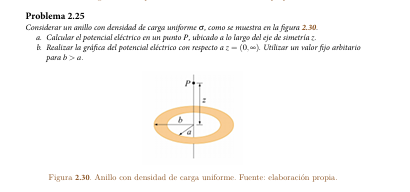

Potencial en z = 0.20 m : V = 9.855e+02 V


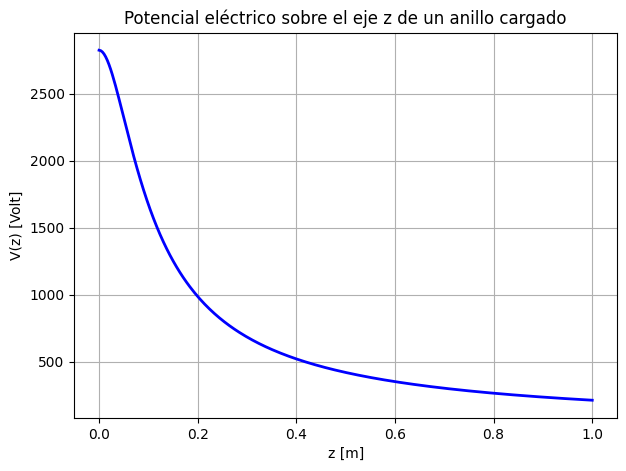

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Constante de permitividad (SI)
epsilon0 = 8.854e-12

# Parámetros del problema
sigma = 1e-6   # densidad de carga [C/m^2] (ejemplo)
a = 0.05       # radio interior [m]
b = 0.10       # radio exterior [m]

# ------------------------------
# (a) Potencial eléctrico en z
# ------------------------------
def V(z, sigma=sigma, a=a, b=b, eps0=epsilon0):
    return (sigma/(2*eps0)) * (np.sqrt(b**2 + z**2) - np.sqrt(a**2 + z**2))

# Ejemplo: potencial en z = 0.2 m
z0 = 0.2
print(f"Potencial en z = {z0:.2f} m : V = {V(z0):.3e} V")

# ------------------------------
# (b) Gráfica V(z) en [0, 1] m
# ------------------------------
z_vals = np.linspace(0, 1, 300)
V_vals = V(z_vals)

plt.figure(figsize=(7,5))
plt.plot(z_vals, V_vals, 'b-', linewidth=2)
plt.title("Potencial eléctrico sobre el eje z de un anillo cargado")
plt.xlabel("z [m]")
plt.ylabel("V(z) [Volt]")
plt.grid(True)
plt.show()


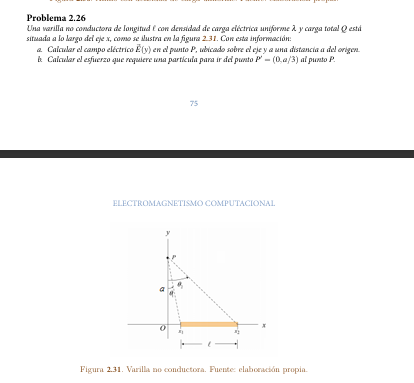

In [ ]:
import sympy as sp
import numpy as np

# símbolos
a, L, lam, q = sp.symbols('a L lam q', positive=True)
eps0 = 8.854187817e-12
k = 1/(4*sp.pi*eps0)

# Componentes del campo en P=(0,a) para varilla de x in [0,L]
Ex = k*lam*(1/a - 1/sp.sqrt(a**2 + L**2))
Ey = k*lam*(L/sp.sqrt(a**2 + L**2))

# Potencial en el eje y a distancia 'a' (V(∞)=0)
V = k*lam*sp.log( (L + sp.sqrt(L**2 + a**2)) / a )

sp.pprint(sp.simplify(Ex), use_unicode=True)
sp.pprint(sp.simplify(Ey), use_unicode=True)
print("V(a) =")
sp.pprint(sp.simplify(V), use_unicode=True)

# ---------------------------
# Ejemplo numérico
# ---------------------------
params = {
    L: 1.0,         # longitud en metros
    lam: 1e-6,      # densidad lineal C/m (ejemplo)
    a: 0.5,         # distancia y en metros
    q: 1e-7         # carga que movemos en Coulombs
}

Ex_num = float(sp.N(Ex.subs(params)))
Ey_num = float(sp.N(Ey.subs(params)))
V_a = float(sp.N(V.subs(params)))
V_a3 = float(sp.N(V.subs({L:params[L], lam:params[lam], a:params[a]/3})))

W = float(params[q]*(V_a - V_a3))  # trabajo al mover q de a/3 a a

print("\nEjemplo numérico (parámetros):", params)
print(f"Ex = {Ex_num:.3e} N/C")
print(f"Ey = {Ey_num:.3e} N/C")
print(f"V(a) = {V_a:.6e} V")
print(f"V(a/3) = {V_a3:.6e} V")
print(f"Trabajo W (mover q de a/3 a a) = {W:.6e} J")

# ---------------------------
# (Opcional) evaluar usando Q = lambda*L
# ---------------------------
Q = params[lam]*params[L]
print(f"Q = {Q:.3e} C  (comprobación)")
Ex_viaQ = (1/(4*np.pi*8.854187817e-12))* (Q/params[a] - Q/np.sqrt(params[a]**2 + params[L]**2))/params[L]*params[L]
# la expresión anterior es equivalente a Ex_num; la dejamos como referencia


  28235226670.932⋅lam   28235226670.932⋅lam
- ─────────────────── + ───────────────────
         _________              π⋅a        
        ╱  2    2                          
    π⋅╲╱  L  + a                           
28235226670.932⋅L⋅lam
─────────────────────
        _________    
       ╱  2    2     
   π⋅╲╱  L  + a      
V(a) =
   ⎛                  28235226670.932⋅lam⎞
   ⎜                  ───────────────────⎟
   ⎜                           π         ⎟
   ⎜⎛       _________⎞                   ⎟
   ⎜⎜      ╱  2    2 ⎟                   ⎟
   ⎜⎜L + ╲╱  L  + a  ⎟                   ⎟
log⎜⎜────────────────⎟                   ⎟
   ⎝⎝       a        ⎠                   ⎠

Ejemplo numérico (parámetros): {L: 1.0, lam: 1e-06, a: 0.5, q: 1e-07}
Ex = 9.936e+03 N/C
Ey = 8.039e+03 N/C
V(a) = 1.297475e+04 V
V(a/3) = 2.239500e+04 V
Trabajo W (mover q de a/3 a a) = -9.420252e-04 J
Q = 1.000e-06 C  (comprobación)


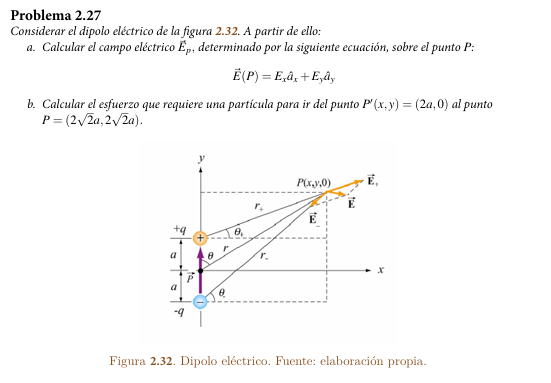

In [ ]:
import sympy

def solucion_problema_dipolo():
    """
    Resuelve simbólicamente el problema 2.27 de un dipolo eléctrico.

    - Parte a: Calcula el campo eléctrico en un punto P(x, y).
    - Parte b: Calcula el trabajo para mover una partícula de P' a P.
    """

    # --- Definición de variables simbólicas ---
    # Usamos sympy.symbols para definir las variables del problema de forma algebraica.
    q = sympy.Symbol('q', real=True, positive=True)      # Carga del dipolo
    a = sympy.Symbol('a', real=True, positive=True)      # Distancia de las cargas al origen
    x = sympy.Symbol('x', real=True)                     # Coordenada x del punto P
    y = sympy.Symbol('y', real=True)                     # Coordenada y del punto P
    k = sympy.Symbol('k', real=True, positive=True)      # Constante de Coulomb (1 / (4*pi*epsilon_0))
    q_particula = sympy.Symbol('q_p', real=True)         # Carga de la partícula a mover

    # =================================================================
    #  Parte a: Cálculo del Campo Eléctrico en P(x,y)
    # =================================================================
    print("--- Parte a: Cálculo del Campo Eléctrico E(P) ---")

    # Posición de las cargas y del punto P
    pos_q_positiva = sympy.Matrix([0, a])
    pos_q_negativa = sympy.Matrix([0, -a])
    pos_P = sympy.Matrix([x, y])

    # Vectores de distancia desde cada carga hasta el punto P
    r_mas = pos_P - pos_q_positiva
    r_menos = pos_P - pos_q_negativa

    # Magnitud de los vectores de distancia
    mag_r_mas = r_mas.norm()
    mag_r_menos = r_menos.norm()

    # Cálculo del campo eléctrico de cada carga usando la ley de Coulomb:
    # E = (k * q * r_vector) / |r_vector|^3
    E_mas = (k * q * r_mas) / (mag_r_mas**3)
    E_menos = (k * (-q) * r_menos) / (mag_r_menos**3)

    # El campo total es la superposición (suma vectorial) de los campos individuales
    E_total = E_mas + E_menos

    # Extraemos las componentes Ex y Ey
    E_x = E_total[0]
    E_y = E_total[1]

    print("La componente Ex del campo eléctrico es:")
    sympy.pprint(E_x)
    print("\nLa componente Ey del campo eléctrico es:")
    sympy.pprint(E_y)
    print("-" * 50)


    # =================================================================
    #  Parte b: Cálculo del Trabajo de P' a P
    # =================================================================
    print("\n--- Parte b: Cálculo del Trabajo para mover una partícula de P' a P ---")

    # El trabajo (esfuerzo) es W = q_p * (V(P) - V(P')), donde V es el potencial.
    # El potencial V en un punto es la suma de los potenciales de cada carga: V = k*q/r

    # Potencial eléctrico en un punto genérico (x,y)
    V_generico = (k * q / mag_r_mas) + (k * (-q) / mag_r_menos)

    # Coordenadas de los puntos inicial y final
    # P' = (2a, 0)
    # P = (2*sqrt(2)*a, 2*sqrt(2)*a)
    x_P_prima, y_P_prima = 2 * a, 0
    x_P, y_P = 2 * sympy.sqrt(2) * a, 2 * sympy.sqrt(2) * a

    # Calculamos el potencial en el punto P' sustituyendo sus coordenadas
    V_P_prima = V_generico.subs({x: x_P_prima, y: y_P_prima})
    print(f"El potencial en el punto P'({x_P_prima}, {y_P_prima}) es:")
    sympy.pprint(sympy.simplify(V_P_prima)) # Debería ser 0

    # Calculamos el potencial en el punto P sustituyendo sus coordenadas
    V_P = V_generico.subs({x: x_P, y: y_P})
    print(f"\nEl potencial en el punto P({x_P}, {y_P}) es:")
    sympy.pprint(sympy.simplify(V_P))

    # El trabajo es la carga de la partícula por la diferencia de potencial
    trabajo = q_particula * (V_P - V_P_prima)

    print("\nEl esfuerzo o trabajo requerido es W = q_p * (V(P) - V(P')).\nLa expresión simbólica para el trabajo es:")
    # Usamos sympy.simplify() para obtener la expresión más compacta.
    sympy.pprint(sympy.simplify(trabajo))
    print("-" * 50)


# --- Ejecutar la función principal ---
if __name__ == "__main__":
    solucion_problema_dipolo()

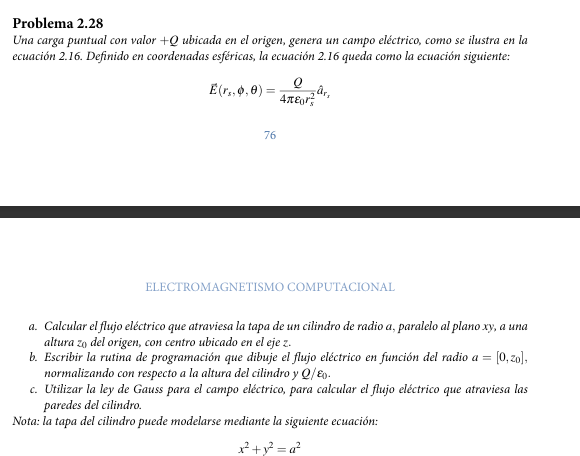

                  Q⋅z₀             Q   
Φₜₐₚₐ = - ──────────────────── + ──────
                    __________   2⋅eps₀
                   ╱  2     2          
          2⋅eps₀⋅╲╱  a  + z₀           
Ejemplo: Q = 1e-09 C, z0 = 1.0 m
Phi_tapa(a=0) = 0.0   (debería ser 0)
Phi_tapa(a->inf) -> 56.47045334186409   (mitad del flujo)
Phi_paredes para a = 1.0 m  => 39.93064049471063  (unidades SI)


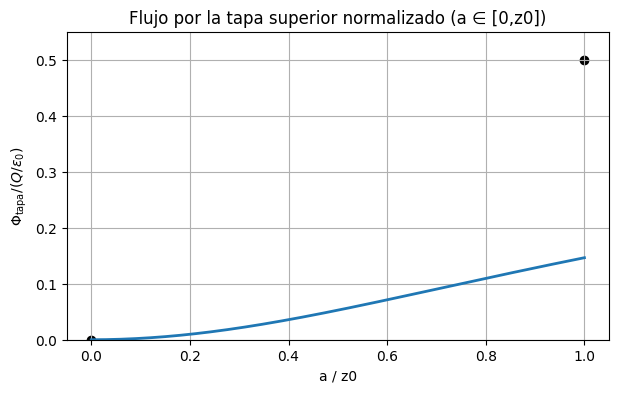

In [20]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Símbolos
Q, eps0, a, z0 = sp.symbols('Q eps0 a z0', positive=True)
eps0_val = 8.854187817e-12

# Expresión simbólica del flujo por la tapa superior
Phi_tapa = sp.simplify(Q/(2*eps0) * (1 - z0/sp.sqrt(a**2 + z0**2)))
sp.pprint(sp.Eq(sp.symbols('Phi_tapa'), Phi_tapa))

# ---------- Funciones numéricas ----------
Phi_tapa_num = sp.lambdify((Q, a, z0, eps0), Phi_tapa, 'numpy')

def phi_tapa(Qval, aval, z0val, eps0val=eps0_val):
    return float(Phi_tapa_num(Qval, aval, z0val, eps0val))

def phi_paredes(Qval, aval, z0val, eps0val=eps0_val):
    # flujo en la base (z=0) usando la misma fórmula con z0->0:
    Phi_base = Qval/(2*eps0val)  # = limite de la expresion para z0->0
    Phi_top = phi_tapa(Qval, aval, z0val, eps0val)
    return Qval/eps0val - Phi_base - Phi_top  # total - base - tapa

# ---------- Ejemplo numérico ----------
Qval = 1e-9  # C
z0val = 1.0  # m
a_vals = np.linspace(0, z0val, 200)

Phi_vals = np.array([phi_tapa(Qval, ai, z0val) for ai in a_vals])
Phi_norm = Phi_vals / (Qval/eps0_val)  # normalizado por Q/eps0

print("Ejemplo: Q =", Qval, "C, z0 =", z0val, "m")
print("Phi_tapa(a=0) =", phi_tapa(Qval, 0.0, z0val), "  (debería ser 0)")
print("Phi_tapa(a->inf) ->", Qval/(2*eps0_val), "  (mitad del flujo)")

# Flujo por paredes para un a concreto (ejemplo a = z0)
a_example = z0val
Phi_walls_example = phi_paredes(Qval, a_example, z0val)
print(f"Phi_paredes para a = {a_example} m  => {Phi_walls_example}  (unidades SI)")

# ---------- Gráfica ----------
plt.figure(figsize=(7,4))
plt.plot(a_vals/z0val, Phi_norm, lw=2)
plt.scatter([0,1], [0, 0.5], color='k')  # puntos (a=0 => 0, a->z0 => some value)
plt.xlabel('a / z0')
plt.ylabel(r'$\Phi_{\mathrm{tapa}}/(Q/\varepsilon_0)$')
plt.title('Flujo por la tapa superior normalizado (a ∈ [0,z0])')
plt.grid(True)
plt.ylim(0, 0.55)
plt.show()


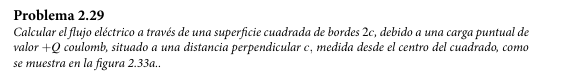

In [21]:
import scipy.constants as constants

def calcular_flujo_electrico(carga_Q: float) -> float:
    """
    Calcula el flujo eléctrico a través de una superficie cuadrada
    debido a una carga puntual situada a una distancia perpendicular
    desde su centro, usando la Ley de Gauss y un argumento de simetría.

    La geometría del problema (lado 2c, distancia c) permite considerar
    el cuadrado como una de las seis caras de un cubo con la carga en su centro.

    Args:
        carga_Q (float): El valor de la carga puntual en Coulombs.

    Returns:
        float: El flujo eléctrico a través de la superficie cuadrada en N·m²/C.
    """
    # ε₀ (épsilon cero) es la permitividad del vacío.
    # Su valor se obtiene de la librería scipy.constants.
    epsilon_0 = constants.epsilon_0

    # El flujo a través de una cara del cubo es la carga total dividida por 6 * ε₀.
    flujo = carga_Q / (6 * epsilon_0)

    return flujo

# --- Ejemplo de Uso ---
# Asigna un valor a la carga Q en Coulombs.
# Por ejemplo, una carga de 1 microcoulomb (1 x 10^-6 C).
Q = 1e-6

# Llama a la función para calcular el flujo.
flujo_resultado = calcular_flujo_electrico(Q)

# Imprime el resultado de forma clara y legible.
print(f"** Solución al Problema 2.29 **\n")
print(f"Datos:")
print(f"  - Carga (Q): {Q:.2e} C")
print(f"  - Permitividad del vacío (ε₀): {constants.epsilon_0:.2e} F/m\n")
print(f"Resultado:")
# El resultado se formatea en notación científica con 4 decimales.
print(f"  -> El flujo eléctrico a través de la superficie cuadrada es: {flujo_resultado:.4e} N·m²/C")

** Solución al Problema 2.29 **

Datos:
  - Carga (Q): 1.00e-06 C
  - Permitividad del vacío (ε₀): 8.85e-12 F/m

Resultado:
  -> El flujo eléctrico a través de la superficie cuadrada es: 1.8823e+04 N·m²/C


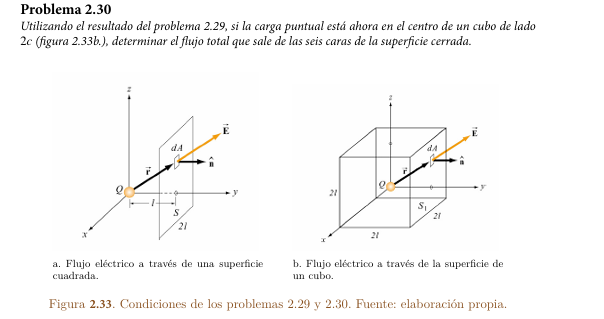

In [22]:
# Problema 2.30 – Flujo total por un cubo con una carga en el centro
import sympy as sp

Q, eps0 = sp.symbols('Q eps0', positive=True, real=True)

Phi_total = Q/eps0                  # Ley de Gauss
Phi_por_cara = sp.simplify(Phi_total/6)

print("Flujo total que sale del cubo:   Φ_total =", Phi_total)
print("Flujo por cada una de las 6 caras: Φ_cara  =", Phi_por_cara)


Flujo total que sale del cubo:   Φ_total = Q/eps0
Flujo por cada una de las 6 caras: Φ_cara  = Q/(6*eps0)


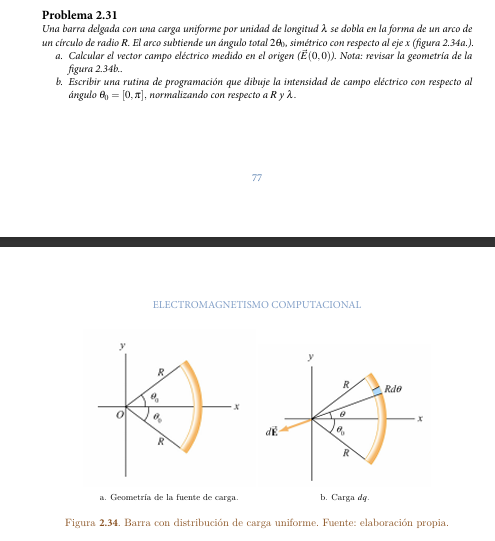

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1840808342.py:34: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Intensidad Normalizada $|\mathcal{E}| = \\frac{|\\vec{E}|}{k\\lambda/R}$', fontsize=12)


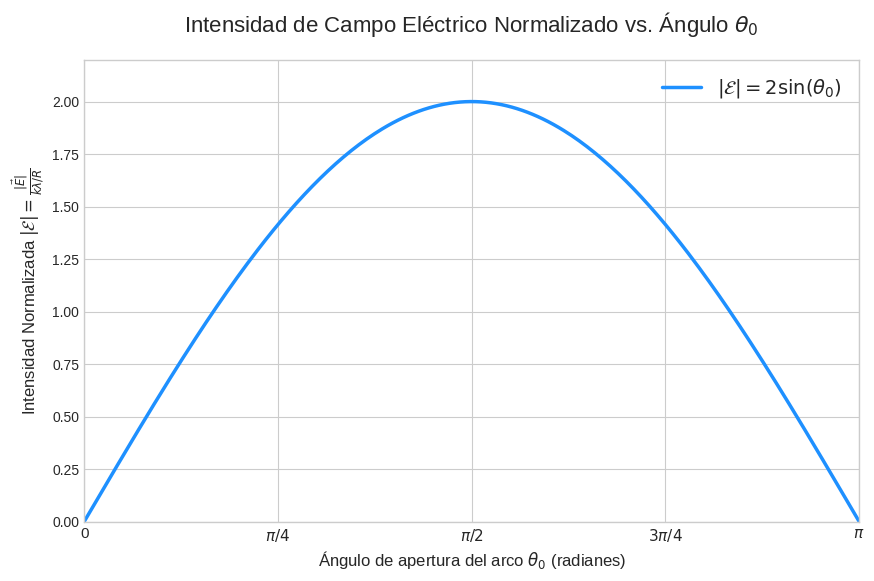

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# --- Configuración del Estilo de la Gráfica ---
# Usamos un estilo que mejora la visualización de las gráficas.
plt.style.use('seaborn-v0_8-whitegrid')

# --- Parte a: Solución Analítica ---
# La intensidad del campo eléctrico es |E| = (2*k*lambda/R) * sin(theta_0)
# La intensidad normalizada es |E_norm| = |E| / (k*lambda/R) = 2 * sin(theta_0)

# --- Parte b: Rutina de Programación para Graficar la Intensidad ---

# 1. Definir el rango del ángulo theta_0
# Creamos un arreglo de 300 puntos para theta_0, desde 0 hasta pi (180 grados),
# para obtener una curva suave.
theta_0_rad = np.linspace(0, np.pi, 300)

# 2. Calcular la intensidad del campo eléctrico normalizado
# Aplicamos la fórmula que derivamos: E_norm = 2 * sin(theta_0)
E_normalized = 2 * np.sin(theta_0_rad)

# 3. Crear la gráfica
# Configuramos el tamaño de la figura para una mejor visualización.
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujamos la función
ax.plot(theta_0_rad, E_normalized, color='dodgerblue', linewidth=2.5, label=r'$|\mathcal{E}| = 2\sin(\theta_0)$')

# 4. Añadir Títulos y Etiquetas
# Es importante que los ejes y el título sean descriptivos.
ax.set_title('Intensidad de Campo Eléctrico Normalizado vs. Ángulo $\\theta_0$', fontsize=16, pad=20)
ax.set_xlabel('Ángulo de apertura del arco $\\theta_0$ (radianes)', fontsize=12)
ax.set_ylabel('Intensidad Normalizada $|\mathcal{E}| = \\frac{|\\vec{E}|}{k\\lambda/R}$', fontsize=12)

# 5. Personalizar los Ejes y la Leyenda
# Establecemos límites para que la gráfica se vea bien.
ax.set_xlim(0, np.pi)
ax.set_ylim(0, 2.2)

# Configuramos las marcas en el eje x para que muestren múltiplos de pi.
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['0', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'], fontsize=11)

# Añadimos una leyenda para identificar la curva.
ax.legend(fontsize=14)

# 6. Mostrar la gráfica final
plt.show()

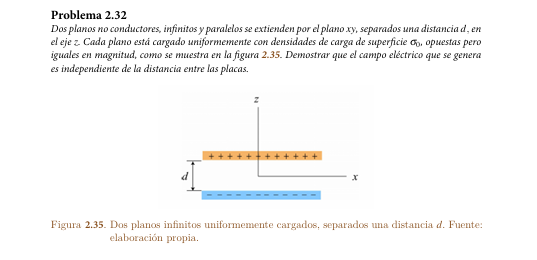

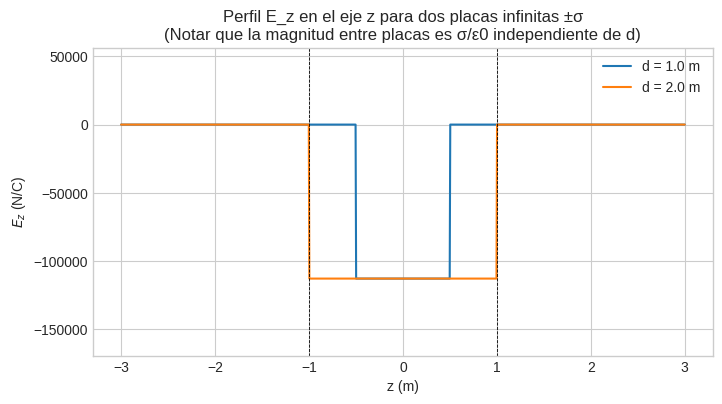

Magnitud del campo entre placas = σ/ε0 = 1.129e+05 N/C (independiente de d)


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
eps0 = 8.854187817e-12   # C^2/(N·m^2)
sigma = 1e-6             # C/m^2 (ejemplo, magnitud)
# probamos dos separaciones distintas para mostrar independencia con d
ds = [1.0, 2.0]  # m

z = np.linspace(-3.0, 3.0, 1001)  # eje z donde evaluamos E

def E_z_profile(z, d, sigma):
    """
    Perfil E_z a lo largo del eje z para dos placas en z = +/- d/2
    convencion: sigma > 0 en z=+d/2, -sigma en z=-d/2
    se devuelve el componente E_z (positivo = +z)
    """
    z_pos = +d/2
    z_neg = -d/2
    E = np.zeros_like(z)
    # entre placas: -d/2 < z < +d/2  => campo dirigido de +sigma a -sigma => -z (si sigma>0)
    mask_between = (z > z_neg) & (z < z_pos)
    E[mask_between] = - sigma / eps0   # dirección: desde +sigma (arriba) hacia -sigma (abajo)
    # fuera: E = 0 (ya inicializado)
    return E

plt.figure(figsize=(8,4))

for d in ds:
    Ez = E_z_profile(z, d, sigma)
    plt.plot(z, Ez, label=f"d = {d} m")

plt.axvline(-ds[-1]/2, color='k', linestyle='--', linewidth=0.6)  # referencia de placa (para d=2)
plt.axvline(+ds[-1]/2, color='k', linestyle='--', linewidth=0.6)
plt.xlabel("z (m)")
plt.ylabel(r"$E_z$ (N/C)")
plt.title("Perfil E_z en el eje z para dos placas infinitas ±σ\n(Notar que la magnitud entre placas es σ/ε0 independiente de d)")
plt.legend()
plt.grid(True)
plt.ylim(-1.5 * sigma/eps0, 0.5 * sigma/eps0)
plt.show()

# Mostrar valores numéricos característicos
val_between = sigma/eps0
print(f"Magnitud del campo entre placas = σ/ε0 = {val_between:.3e} N/C (independiente de d)")


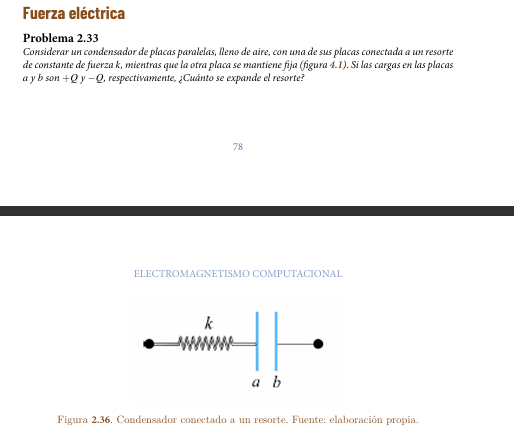

In [25]:
import scipy.constants as constants

def calcular_expansion_resorte(carga_Q, constante_k, area_placa_A):
    """
    Calcula la expansión de un resorte conectado a una placa de un capacitor.

    Args:
        carga_Q (float): La magnitud de la carga en una de las placas (en Coulombs, C).
        constante_k (float): La constante de fuerza del resorte (en Newtons por metro, N/m).
        area_placa_A (float): El área de una de las placas del capacitor (en metros cuadrados, m²).

    Returns:
        float: La expansión del resorte (en metros, m).
    """
    # Constante de la permitividad del vacío (epsilon nought)
    epsilon_0 = constants.epsilon_0  # en F/m

    # Fórmula para la expansión (x) derivada de la igualdad de fuerzas:
    # k * x = Q^2 / (2 * A * ε₀)
    # x = Q^2 / (2 * k * A * ε₀)

    expansion_x = (carga_Q**2) / (2 * constante_k * area_placa_A * epsilon_0)

    return expansion_x

# --- Ejemplo de uso ---
if __name__ == "__main__":
    # VALORES DE EJEMPLO (puedes cambiarlos según los datos de un problema específico)
    carga_placas = 1.5e-6  # Carga de 1.5 micro-Coulombs
    constante_resorte = 120    # Constante del resorte de 120 N/m
    area_placas = 0.05       # Área de las placas de 0.05 m² (e.g., 22.3 cm x 22.3 cm)

    # Llamada a la función para calcular la expansión
    expansion = calcular_expansion_resorte(carga_placas, constante_resorte, area_placas)

    # --- Impresión de resultados ---
    print("--- Calculadora de Expansión del Resorte en Capacitor ---")
    print(f"\nDatos de entrada:")
    print(f"  - Carga en las placas (Q): {carga_placas:.2e} C")
    print(f"  - Constante del resorte (k): {constante_resorte} N/m")
    print(f"  - Área de las placas (A): {area_placas} m²")

    print("\n---------------------------------------------------------")
    print(f"✅ La expansión del resorte es de {expansion:.6f} metros.")
    print(f"   (Equivalente a {expansion * 1000:.3f} milímetros)")
    print("---------------------------------------------------------")

--- Calculadora de Expansión del Resorte en Capacitor ---

Datos de entrada:
  - Carga en las placas (Q): 1.50e-06 C
  - Constante del resorte (k): 120 N/m
  - Área de las placas (A): 0.05 m²

---------------------------------------------------------
✅ La expansión del resorte es de 0.021176 metros.
   (Equivalente a 21.176 milímetros)
---------------------------------------------------------


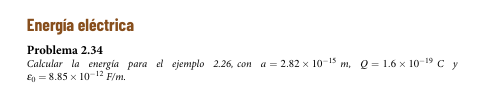

In [26]:
import math

# --- Datos del Problema ---
# Carga (Q) en Coulombs
Q = 1.6e-19  # 1.6 * 10^-19 C

# Radio (a) en metros
a = 2.82e-15  # 2.82 * 10^-15 m

# Permitividad del vacío (epsilon_0) en Farads por metro
epsilon_0 = 8.85e-12 # 8.85 * 10^-12 F/m

# --- Cálculo de la Energía ---

# Fórmula: W_E = Q^2 / (8 * pi * epsilon_0 * a)

# Calcular el numerador
numerador = Q**2

# Calcular el denominador
denominador = 8 * math.pi * epsilon_0 * a

# Realizar la división para encontrar la energía
energia_electrica = numerador / denominador


# --- Mostrar el Resultado ---

print("--- Datos Utilizados ---")
print(f"Carga (Q): {Q:.2e} C")
print(f"Radio (a): {a:.2e} m")
print(f"Permitividad (ε₀): {epsilon_0:.2e} F/m")
print("-" * 26)
print(f"✅ La energía eléctrica calculada es: {energia_electrica:.3e} Joules")

# Opcional: convertir a kilo-electron-volts (keV)
energia_en_eV = energia_electrica / Q
energia_en_keV = energia_en_eV / 1000
print(f"   (que equivale a {energia_en_keV:.1f} keV)")

--- Datos Utilizados ---
Carga (Q): 1.60e-19 C
Radio (a): 2.82e-15 m
Permitividad (ε₀): 8.85e-12 F/m
--------------------------
✅ La energía eléctrica calculada es: 4.081e-14 Joules
   (que equivale a 255.1 keV)


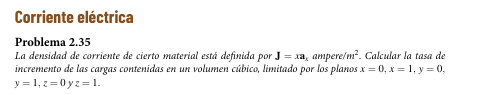

In [29]:
import sympy

def calcular_tasa_incremento_carga():
    """
    Calcula la tasa de incremento de las cargas contenidas en un volumen cúbico
    dada una densidad de corriente J = x ax.

    El volumen está limitado por los planos x=0, x=1, y=0, y=1, z=0, z=1.
    """

    print("--- Problema 2.35: Tasa de Incremento de las Cargas ---")

    # Definición de la densidad de corriente
    # J = x * ax
    # Para la integración, solo nos importa el valor de x en la superficie
    # donde J tiene una componente perpendicular a la cara.

    # 1. Calcular el flujo de corriente (integral de J . dS) para cada cara del cubo.
    # dS es el vector normal a la superficie, apuntando hacia afuera.

    # Dimensiones del cubo
    lado = 1  # Lado del cubo (de 0 a 1 en cada eje)

    # Flujo a través de la cara x = 1
    # En esta cara, x = 1, y dy dz apunta en la dirección +ax
    # J = 1 * ax
    # dS = dy dz * ax
    # J . dS = (1 * ax) . (dy dz * ax) = dy dz
    flujo_x1 = lado * lado  # Integral de 1 dy dz de 0 a 1 en y y z
    print(f"Flujo a través de la cara x=1: {flujo_x1} A")

    # Flujo a través de la cara x = 0
    # En esta cara, x = 0, y dy dz apunta en la dirección -ax
    # J = 0 * ax = 0
    # dS = -dy dz * ax
    # J . dS = (0 * ax) . (-dy dz * ax) = 0
    flujo_x0 = 0
    print(f"Flujo a través de la cara x=0: {flujo_x0} A")

    # Flujo a través de las caras y=0, y=1, z=0, z=1
    # En estas caras, dS tiene componentes en ay o az.
    # J solo tiene componente en ax.
    # Por lo tanto, J . dS = 0 (productos punto de vectores perpendiculares)
    flujo_y0 = 0
    flujo_y1 = 0
    flujo_z0 = 0
    flujo_z1 = 0
    print("Flujo a través de las caras y=0, y=1, z=0, z=1: 0 A (porque J es perpendicular a las normales de estas caras)")

    # 2. Sumar los flujos para obtener la corriente neta de salida.
    corriente_neta_salida = flujo_x1 + flujo_x0 + flujo_y0 + flujo_y1 + flujo_z0 + flujo_z1
    print(f"\nCorriente neta total que sale del cubo: {corriente_neta_salida} A")

    # 3. Aplicar la ecuación de continuidad: dQ/dt = - (Corriente neta de salida)
    tasa_incremento_carga = -corriente_neta_salida
    print(f"Tasa de incremento de las cargas (dQ/dt): {tasa_incremento_carga} A (Coulombs/segundo)")

    print("\nInterpretación: El signo negativo indica que la carga dentro del cubo está disminuyendo.")
    print("-" * 60)

# Ejecutar la función para obtener la solución
if __name__ == "__main__":
    calcular_tasa_incremento_carga()

--- Problema 2.35: Tasa de Incremento de las Cargas ---
Flujo a través de la cara x=1: 1 A
Flujo a través de la cara x=0: 0 A
Flujo a través de las caras y=0, y=1, z=0, z=1: 0 A (porque J es perpendicular a las normales de estas caras)

Corriente neta total que sale del cubo: 1 A
Tasa de incremento de las cargas (dQ/dt): -1 A (Coulombs/segundo)

Interpretación: El signo negativo indica que la carga dentro del cubo está disminuyendo.
------------------------------------------------------------


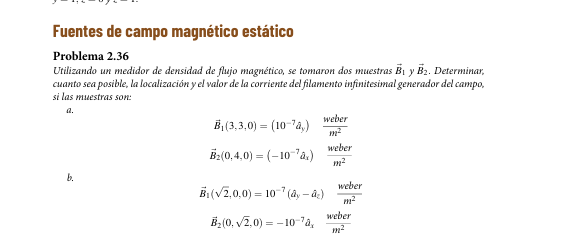

In [28]:
import sympy as sp
import numpy as np

def solve_filament_from_two_measurements(samples):
    """
    samples: lista de dos tuplas (x_i, y_i, Bx_i, By_i)
    Devuelve lista de soluciones: (x0, y0, I) posibles.
    """
    # símbolos
    x0, y0, C = sp.symbols('x0 y0 C', real=True)
    mu0 = 4*sp.pi*1e-7

    (x1,y1,Bx1,By1), (x2,y2,Bx2,By2) = samples

    R1sq = (x1 - x0)**2 + (y1 - y0)**2
    R2sq = (x2 - x0)**2 + (y2 - y0)**2

    eq1 = sp.Eq(Bx1, -C*(y1 - y0)/R1sq)
    eq2 = sp.Eq(By1,  C*(x1 - x0)/R1sq)
    eq3 = sp.Eq(Bx2, -C*(y2 - y0)/R2sq)
    eq4 = sp.Eq(By2,  C*(x2 - x0)/R2sq)

    # Resolver un subconjunto (las cuatro pueden ser dependientes); probar combinaciones
    sols = sp.solve([eq2, eq3, eq1], [x0, y0, C], dict=True)  # combinación que suele funcionar
    results = []
    for s in sols:
        x0_val = float(sp.N(s[x0]))
        y0_val = float(sp.N(s[y0]))
        C_val  = float(sp.N(s[C]))
        I_val = float((2*sp.pi*C_val) / mu0)
        results.append((x0_val, y0_val, I_val))
    return results

# Ejemplo con los datos interpretados:
samples = [
    (3.0, 3.0, 0.0,  1e-7),
    (0.0, 4.0, -1e-7, 0.0)
]

soluciones = solve_filament_from_two_measurements(samples)
print("Soluciones (x0, y0, I [A]):")
for sol in soluciones:
    print(sol)


Soluciones (x0, y0, I [A]):
(1.0, 3.0, 1.0)
(-2.0, 3.0, 2.5)


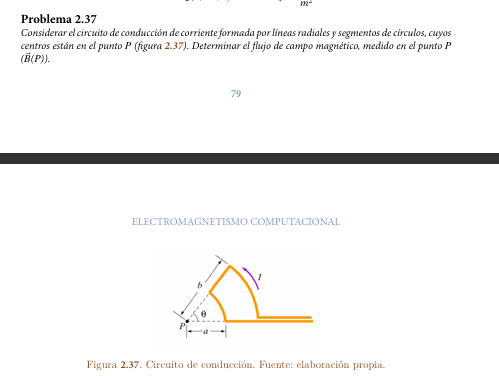

In [30]:
import sympy

def calcular_campo_magnetico_en_P():
    """
    Calcula simbólicamente el campo magnético B en el punto P para el circuito
    mostrado en la figura 2.37.
    """
    print("--- Solución al Problema 2.37: Campo Magnético en P ---")

    # --- 1. Definición de Variables Simbólicas ---
    # Usamos sympy para manejar las variables como símbolos algebraicos.
    mu_0 = sympy.Symbol('μ₀', real=True, positive=True)  # Permeabilidad del vacío
    I = sympy.Symbol('I', real=True, positive=True)        # Corriente eléctrica
    theta = sympy.Symbol('θ', real=True, positive=True)    # Ángulo del arco (en radianes)
    a = sympy.Symbol('a', real=True, positive=True)        # Radio del arco interior
    b = sympy.Symbol('b', real=True, positive=True)        # Radio del arco exterior

    # --- 2. Cálculo del Campo para cada Segmento ---

    # a) Segmentos Radiales
    # El campo magnético de los dos segmentos rectos/radiales es CERO en el punto P,
    # ya que el vector dl es paralelo/antiparalelo al vector de posición r.
    # El producto cruz (dl x r) en la ley de Biot-Savart es cero.
    B_radial1 = 0
    B_radial2 = 0
    print("Contribución de los segmentos radiales al campo en P: 0")

    # b) Segmento de Arco Interior (radio a)
    # La fórmula del campo magnético en el centro de un arco de corriente es B = (μ₀ * I * θ) / (4 * π * R)
    # Usando la regla de la mano derecha, la corriente en este arco produce un campo
    # que sale de la página (dirección +k).
    B_arco_a = (mu_0 * I * theta) / (4 * sympy.pi * a)
    print("Contribución del arco interior (radio a): Campo saliendo de la página")


    # c) Segmento de Arco Exterior (radio b)
    # La corriente fluye en dirección opuesta, por lo que el campo magnético
    # entra en la página (dirección -k).
    B_arco_b = - (mu_0 * I * theta) / (4 * sympy.pi * b)
    print("Contribución del arco exterior (radio b): Campo entrando en la página")


    # --- 3. Suma de los Campos (Principio de Superposición) ---
    # El campo total es la suma vectorial de las contribuciones.
    # Como todos los campos no nulos están en la misma dirección (k), los sumamos algebraicamente.
    B_total = B_arco_a + B_arco_b + B_radial1 + B_radial2

    # --- 4. Simplificación y Visualización del Resultado ---
    # Factorizamos la expresión para una mejor presentación.
    B_total_simplificado = sympy.factor(B_total)

    print("\n" + "="*50)
    print("El vector de campo magnético total B en el punto P es:")
    print("La dirección es perpendicular a la página del circuito.")
    print("La magnitud (y dirección) está dada por la siguiente expresión:")
    sympy.pprint(B_total_simplificado, use_unicode=True)
    print("="*50)


# --- Ejecutar la función principal ---
if __name__ == "__main__":
    calcular_campo_magnetico_en_P()

--- Solución al Problema 2.37: Campo Magnético en P ---
Contribución de los segmentos radiales al campo en P: 0
Contribución del arco interior (radio a): Campo saliendo de la página
Contribución del arco exterior (radio b): Campo entrando en la página

El vector de campo magnético total B en el punto P es:
La dirección es perpendicular a la página del circuito.
La magnitud (y dirección) está dada por la siguiente expresión:
-I⋅θ⋅μ₀⋅(a - b) 
────────────────
    4⋅π⋅a⋅b     


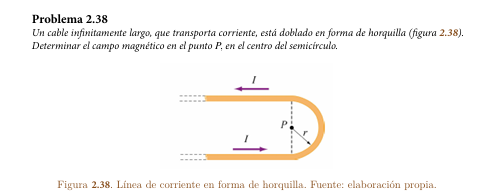

In [31]:
import numpy as np

mu0 = 4*np.pi*1e-7

def B_element(I, r_vec, dl_vec):
    """Biot-Savart elemental: dB = mu0/(4pi) * I dl x r_hat / r^2
       r_vec: vector desde elemento dl hasta punto evaluado
       dl_vec: vector dl (orientado) """
    r = np.linalg.norm(r_vec)
    if r == 0:
        return np.array([0.0,0.0,0.0])
    dB = mu0/(4*np.pi) * I * np.cross(dl_vec, r_vec) / (r**3)
    return dB

def integrate_semicircle(I, r, N=1000):
    """Integra semicirculo de angulo 0..pi en el plano xy, centro en origen."""
    thetas = np.linspace(0, np.pi, N)
    dtheta = thetas[1]-thetas[0]
    B = np.zeros(3)
    for theta in thetas:
        # elemento en ángulo theta: posición del elemento
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        # dl vector = r * dtheta * (-sin, cos, 0)
        dl = np.array([-r*np.sin(theta)*dtheta, r*np.cos(theta)*dtheta, 0.0])
        # vector desde elemento hasta el centro (origen)
        r_vec = -np.array([x,y,0.0])
        B += B_element(I, r_vec, dl)
    return B

def integrate_straight_semi_infinite(I, r, L=100.0, N=20000):
    """Aproxima una semi-infinita horizontal que está a una distancia r (y=r)
       y va desde x=-L hasta x=+x_end (tomamos x_end cerca del punto tangente x=r).
       Para tangencia usaremos el segmento desde x=-L hasta x=r (end at tangent)."""
    x_vals = np.linspace(-L, r, N)
    dx = x_vals[1]-x_vals[0]
    B = np.zeros(3)
    for x in x_vals:
        # posición del elemento
        elem = np.array([x, r, 0.0])
        # dl: en dirección +x (si la corriente va de izquierda a derecha)
        dl = np.array([dx, 0.0, 0.0])
        # vector desde elemento hasta centro (origin)
        r_vec = -elem
        B += B_element(I, r_vec, dl)
    return B

# parámetros de prueba
I = 1.0
r = 0.5

# integrar semicírculo
B_arc = integrate_semicircle(I, r, N=2000)
# integrar dos semi-infinitas (una superior y otra inferior simétrica en el dibujo;
# en el dibujo las rectas están a la misma distancia r del centro)
B_semi = integrate_straight_semi_infinite(I, r, L=200.0, N=20000)
# hay otra rama (la que sale por la otra dirección) con la misma magnitud
B_rectas = 2*B_semi

B_total_num = B_arc + B_rectas

print("Numérico (vector B) [T]:")
print("B_arc =", B_arc)
print("B_rectas =", B_rectas)
print("B_total (num) =", B_total_num)

# valor analítico (magnitud, suponiendo dirección z)
B_total_analytic = mu0*I/(4*r)*(1 + 2/np.pi)
print("\nAnalítico (magnitud):", B_total_analytic)
print("Comparación magnitudes: |B_total_num_z| / B_analítico =",
      abs(B_total_num[2]) / B_total_analytic)


Numérico (vector B) [T]:
B_arc = [0.00000000e+00 0.00000000e+00 6.28632847e-07]
B_rectas = [ 0.00000000e+00  0.00000000e+00 -6.84252175e-07]
B_total (num) = [ 0.00000000e+00  0.00000000e+00 -5.56193283e-08]

Analítico (magnitud): 1.0283185307179587e-06
Comparación magnitudes: |B_total_num_z| / B_analítico = 0.0540876456167345


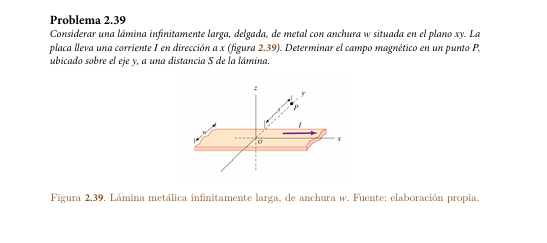

In [32]:
import math
import scipy.constants as constants

def calcular_campo_magnetico_lamina(corriente_I: float, ancho_w: float, distancia_S: float) -> float:
    """
    Calcula la magnitud del campo magnético producido por una lámina conductora
    infinitamente larga de ancho finito.

    La fórmula se deriva de la integración de la Ley de Biot-Savart a lo largo
    del ancho de la lámina.

    Args:
        corriente_I (float): Corriente total que fluye por la lámina en Amperios (A).
        ancho_w (float): El ancho de la lámina en la dirección z, en metros (m).
        distancia_S (float): La distancia perpendicular desde la lámina hasta el punto P
                             sobre el eje y, en metros (m).

    Returns:
        float: La magnitud del campo magnético (B) en el punto P, en Teslas (T).
               El campo apunta en la dirección +z.
    """
    if ancho_w <= 0 or distancia_S <= 0:
        raise ValueError("El ancho y la distancia deben ser valores positivos.")

    # μ₀ (mu cero) es la permeabilidad magnética del vacío.
    mu_0 = constants.mu_0

    # Término constante de la fórmula: (μ₀ * I) / (π * w)
    termino_constante = (mu_0 * corriente_I) / (math.pi * ancho_w)

    # Término del arco tangente: arctan(w / (2 * S))
    termino_arco_tangente = math.atan(ancho_w / (2 * distancia_S))

    # Magnitud del campo magnético B_z
    magnitud_B = termino_constante * termino_arco_tangente

    return magnitud_B

# --- EJEMPLO DE USO ---

# Definimos los valores para el problema (puedes cambiarlos)
corriente_total = 10.0      # Amperios
ancho_de_la_lamina = 0.2    # 20 cm
distancia_al_punto = 0.1    # 10 cm

# Usamos la función para obtener el resultado
try:
    magnitud_B_resultado = calcular_campo_magnetico_lamina(
        corriente_I=corriente_total,
        ancho_w=ancho_de_la_lamina,
        distancia_S=distancia_al_punto
    )

    # Imprimimos la solución de manera clara
    print(f"** Solución al Problema 2.39 **\n")
    print(f"Parámetros de entrada:")
    print(f"  - Corriente total (I): {corriente_total} A")
    print(f"  - Ancho de la lámina (w): {ancho_de_la_lamina} m")
    print(f"  - Distancia al punto P (S): {distancia_al_punto} m\n")
    print("Resultado:")
    print(f"  -> La magnitud del campo magnético en P es: {magnitud_B_resultado:.4e} T")
    print(f"  -> La dirección del campo es a lo largo del eje z positivo (+ẑ).")

except ValueError as e:
    print(f"Error en los datos de entrada: {e}")

** Solución al Problema 2.39 **

Parámetros de entrada:
  - Corriente total (I): 10.0 A
  - Ancho de la lámina (w): 0.2 m
  - Distancia al punto P (S): 0.1 m

Resultado:
  -> La magnitud del campo magnético en P es: 1.5708e-05 T
  -> La dirección del campo es a lo largo del eje z positivo (+ẑ).


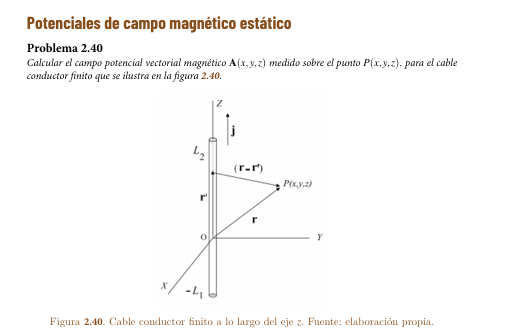

In [33]:
# Potencial vector magnético de un hilo finito sobre el eje z
# Requiere: sympy
import sympy as sp

# Símbolos
x, y, z = sp.symbols('x y z', real=True)
L1, L2, mu0, I = sp.symbols('L1 L2 mu0 I', positive=True, real=True)

rho = sp.sqrt(x**2 + y**2)

# Expresión cerrada para A_z (dos formas equivalentes)
Az_asinh = (mu0*I/(4*sp.pi))*(sp.asinh((z+L1)/rho) - sp.asinh((z-L2)/rho))
Az_log   = (mu0*I/(4*sp.pi))*sp.log(
    (z+L1 + sp.sqrt((z+L1)**2 + rho**2)) /
    (z-L2 + sp.sqrt((z-L2)**2 + rho**2))
)

A = sp.Matrix([0, 0, sp.simplify(Az_asinh)])  # Potencial vector: sólo componente z

print("A(x,y,z) = [0, 0, A_z]")
print("A_z (forma asinh) =", sp.simplify(Az_asinh))
print("A_z (forma log)   =", sp.simplify(Az_log))

# --- (opcional) Campo magnético B = ∇ × A ---
Bx = sp.diff(A[2], y)      # ∂Az/∂y
By = -sp.diff(A[2], x)     # -∂Az/∂x
Bz = sp.Integer(0)
B = sp.simplify(sp.Matrix([Bx, By, Bz]))

print("\nB(x,y,z) = curl(A) =")
sp.pprint(B)

# Función numérica para evaluar A_z
Az_fun = sp.lambdify((x, y, z, L1, L2, mu0, I), Az_asinh, 'numpy')

# Ejemplo numérico (puedes cambiar valores):
# val = Az_fun(0.1, 0.2, 0.0, 1.0, 1.5, 4e-7*sp.pi, 2.0)  # μ0=4π×10^-7 H/m
# print("\nEjemplo numérico A_z =", float(val))


A(x,y,z) = [0, 0, A_z]
A_z (forma asinh) = I*mu0*(asinh((L1 + z)/sqrt(x**2 + y**2)) + asinh((L2 - z)/sqrt(x**2 + y**2)))/(4*pi)
A_z (forma log)   = I*mu0*log((L1 + z + sqrt(x**2 + y**2 + (L1 + z)**2))/(-L2 + z + sqrt(x**2 + y**2 + (L2 - z)**2)))/(4*pi)

B(x,y,z) = curl(A) =
⎡                           ⎛            _____________________               _ ↪
⎢                           ⎜           ╱  2    2           2               ╱  ↪
⎢                   -I⋅μ₀⋅y⋅⎝(L₁ + z)⋅╲╱  x  + y  + (L₂ - z)   + (L₂ - z)⋅╲╱   ↪
⎢───────────────────────────────────────────────────────────────────────────── ↪
⎢                 ____________________________________________________________ ↪
⎢    ⎛ 2    2⎞   ╱  4      2  2    2         2    2         2    4    2        ↪
⎢4⋅π⋅⎝x  + y ⎠⋅╲╱  x  + 2⋅x ⋅y  + x ⋅(L₁ + z)  + x ⋅(L₂ - z)  + y  + y ⋅(L₁ +  ↪
⎢                                                                              ↪
⎢                           ⎛            _____________________               

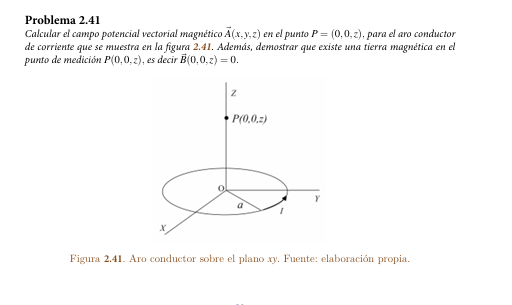

In [34]:
import numpy as np

# --- Constantes Físicas ---
# Permeabilidad del vacío (μ₀) en T·m/A
mu_0 = 4 * np.pi * 1e-7

# --- Parámetros del Problema ---
# Corriente en el aro (Amperios)
I = 2.0
# Radio del aro (metros)
a = 0.1
# Punto de medición en el eje z (metros)
z = 0.05

# --- 1. Cálculo del Potencial Vectorial Magnético A ---

def calcular_potencial_vectorial_en_eje(z, a, I):
    """
    Calcula el potencial vectorial magnético A en el eje z de un aro de corriente.

    Por simetría, para cualquier punto sobre el eje z, las componentes del
    potencial vectorial se anulan al integrar sobre todo el aro.

    Retorna:
        Un vector (numpy array) para A, que es [0, 0, 0].
    """
    return np.array([0.0, 0.0, 0.0])

# --- 2. Cálculo del Campo Magnético B ---

def calcular_campo_magnetico_en_eje(z, a, I, mu_0_val):
    """
    Calcula el campo magnético B en el eje z de un aro de corriente
    usando la fórmula derivada de la Ley de Biot-Savart.

    Retorna:
        Un vector (numpy array) para B, que tiene solo componente z.
    """
    # Numerador de la fórmula de B
    numerador = mu_0_val * I * a**2

    # Denominador de la fórmula de B
    denominador = 2 * (a**2 + z**2)**(3/2)

    # El campo solo tiene componente en la dirección z
    B_z = numerador / denominador

    return np.array([0.0, 0.0, B_z])

# --- Ejecución y Resultados ---

# Calcular A y B en el punto z especificado
A_vector = calcular_potencial_vectorial_en_eje(z, a, I)
B_vector = calcular_campo_magnetico_en_eje(z, a, I, mu_0)

# Imprimir los resultados de forma clara
print("--- Solución al Problema 2.41 ---")
print(f"Parámetros: Corriente I = {I} A, Radio a = {a} m, Punto z = {z} m")
print("-" * 35)

print(f"1. Potencial Vectorial Magnético en P(0,0,z):")
print(f"   A = {A_vector} T·m")
print("\n   Como se esperaba por simetría, el potencial vectorial es nulo sobre el eje.\n")

print(f"2. Campo Magnético en P(0,0,z):")
print(f"   B = {B_vector} T")
print(f"   La magnitud del campo es |B| = {np.linalg.norm(B_vector):.4e} Teslas.\n")

# Conclusión sobre la "tierra magnética"
print("--- Conclusión sobre la 'Tierra Magnética' ---")
if np.allclose(B_vector, [0, 0, 0]):
    print("El campo magnético B es CERO. Esto contradice la física.")
else:
    print("El campo magnético B es DISTINTO DE CERO.")
    print("La afirmación del problema de que B(0,0,z) = 0 es incorrecta.")
    print("Un aro de corriente siempre genera un campo magnético a lo largo de su eje.")

--- Solución al Problema 2.41 ---
Parámetros: Corriente I = 2.0 A, Radio a = 0.1 m, Punto z = 0.05 m
-----------------------------------
1. Potencial Vectorial Magnético en P(0,0,z):
   A = [0. 0. 0.] T·m

   Como se esperaba por simetría, el potencial vectorial es nulo sobre el eje.

2. Campo Magnético en P(0,0,z):
   B = [0.00000000e+00 0.00000000e+00 8.99176286e-06] T
   La magnitud del campo es |B| = 8.9918e-06 Teslas.

--- Conclusión sobre la 'Tierra Magnética' ---
El campo magnético B es DISTINTO DE CERO.
La afirmación del problema de que B(0,0,z) = 0 es incorrecta.
Un aro de corriente siempre genera un campo magnético a lo largo de su eje.


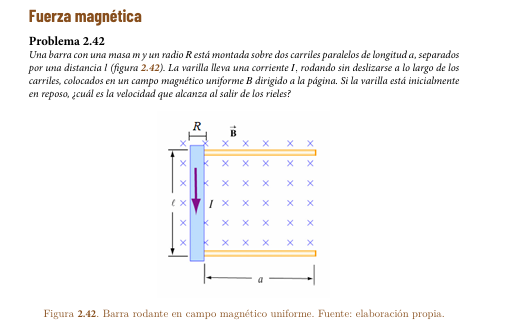

In [35]:
# v_final_bar.py
import sympy as sp
import numpy as np

# --- Símbolos (simbólico) ---
I, a, B, ell, m, R = sp.symbols('I a B ell m R', positive=True)
# Trabajo magnético
F = I * a * B        # fuerza magnética sobre la varilla (suposición estándar)
W = F * ell
# Energía cinética total (traslacional + rotacional de un cilindro macizo)
Icm = sp.Rational(1,2) * m * R**2            # momento de inercia cilindro macizo
# sin deslizamiento: v = omega * R  => omega = v/R
v = sp.symbols('v', positive=True)
KE_total = sp.Rational(1,2) * m * v**2 + sp.Rational(1,2) * Icm * (v**2 / R**2)
KE_simpl = sp.simplify(KE_total)             # debe dar 3/4 m v^2

# Igualamos W = KE_simpl y resolvemos para v
v_solution = sp.solve(sp.Eq(W, KE_simpl), v)
v_solution_simpl = sp.simplify(v_solution[0])
print("Solución simbólica para v:")
sp.pprint(v_solution_simpl)   # muestra sqrt(4 I a B ell /(3 m))

# --- Evaluación numérica de ejemplo ---
# Parámetros de ejemplo (elige valores reales según tu problema)
params = {
    I: 10.0,      # A
    a: 0.1,       # m (separación entre rieles)
    B: 0.5,       # T
    ell: 0.5,     # m (longitud de los rieles que recorre la varilla)
    m: 0.8,       # kg (masa de la varilla)
    R: 0.02       # m (radio, sólo necesario si quieres comprobar rotación)
}

v_num = float(v_solution_simpl.subs(params))
W_num = float((I*a*B*ell).subs(params))
KE_num = 0.5*params[m]*v_num**2 + 0.5*(0.5*params[m]*params[R]**2)*(v_num**2/params[R]**2)

print("\nEjemplo numérico (valores escogidos):")
print(f"I = {params[I]} A, a = {params[a]} m, B = {params[B]} T, ℓ = {params[ell]} m, m = {params[m]} kg")
print(f"Velocidad final v = {v_num:.4f} m/s")
print(f"Trabajo magnético W = {W_num:.4e} J")
print(f"Energia cinética calculada KE_total = {KE_num:.4e} J  (debe coincidir con W)")

# Si quieres una función para calcular v directo (numérico)
def v_final(Ival, aval, Bval, ellval, mval):
    return np.sqrt((4.0 * Ival * aval * Bval * ellval) / (3.0 * mval))

# ejemplo uso:
v_ex = v_final(params[I], params[a], params[B], params[ell], params[m])
print(f"\n(v mediante función directa) v = {v_ex:.4f} m/s")


Solución simbólica para v:
                _____
2⋅√3⋅√B⋅√I⋅√a⋅╲╱ ell 
─────────────────────
        3⋅√m         

Ejemplo numérico (valores escogidos):
I = 10.0 A, a = 0.1 m, B = 0.5 T, ℓ = 0.5 m, m = 0.8 kg
Velocidad final v = 0.6455 m/s
Trabajo magnético W = 2.5000e-01 J
Energia cinética calculada KE_total = 2.5000e-01 J  (debe coincidir con W)

(v mediante función directa) v = 0.6455 m/s


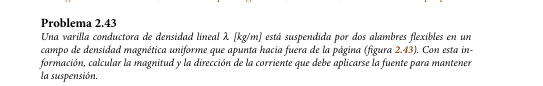

In [36]:
import scipy.constants as constants

def calcular_corriente_suspension(lambda_densidad, B_campo_magnetico):
    """
    Calcula la magnitud de la corriente necesaria para suspender una varilla
    conductora en un campo magnético.

    Args:
        lambda_densidad (float): La densidad lineal de la varilla en kg/m.
        B_campo_magnetico (float): La magnitud del campo magnético en Teslas (T).

    Returns:
        float: La magnitud de la corriente requerida en Amperios (A).
    """
    # Valor estándar de la aceleración debido a la gravedad (g) en m/s^2
    g = constants.g

    # Fórmula derivada del equilibrio de fuerzas: I = (λ * g) / B
    corriente_I = (lambda_densidad * g) / B_campo_magnetico

    return corriente_I

# --- Ejemplo de uso ---
if __name__ == "__main__":
    # VALORES DE EJEMPLO (puedes cambiarlos)
    densidad_lineal_varilla = 0.05  # kg/m
    campo_magnetico = 0.8           # Teslas (T)

    # 1. Calcular la magnitud de la corriente
    magnitud_corriente = calcular_corriente_suspension(densidad_lineal_varilla, campo_magnetico)

    # 2. Determinar la dirección (basado en el análisis físico)
    direccion_corriente = "De derecha a izquierda"

    # --- Impresión de resultados ---
    print("--- Cálculo de Corriente para Suspensión Magnética ---")
    print(f"\nDatos de entrada:")
    print(f"  - Densidad lineal de la varilla (λ): {densidad_lineal_varilla} kg/m")
    print(f"  - Campo magnético (B): {campo_magnetico} T")

    print("\n------------------------------------------------------")
    print("Para mantener la varilla suspendida:")
    print(f"  ⚡ Magnitud de la corriente (I): {magnitud_corriente:.4f} Amperios")
    print(f"  🧭 Dirección de la corriente: {direccion_corriente}")
    print("------------------------------------------------------")

--- Cálculo de Corriente para Suspensión Magnética ---

Datos de entrada:
  - Densidad lineal de la varilla (λ): 0.05 kg/m
  - Campo magnético (B): 0.8 T

------------------------------------------------------
Para mantener la varilla suspendida:
  ⚡ Magnitud de la corriente (I): 0.6129 Amperios
  🧭 Dirección de la corriente: De derecha a izquierda
------------------------------------------------------


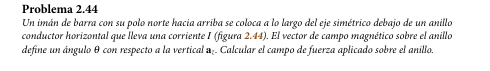

In [37]:
# Fuerza sobre un lazo (Python)
# Planteamiento: F_z = m * d/dz( B(z) * cos(theta(z)) )
# m = I * A (A = area del lazo = pi*R^2)

import numpy as np
import sympy as sp

# --- símbolos para manipulación simbólica ---
z, I, R, mu0, m0 = sp.symbols('z I R mu0 m0', positive=True)
theta = sp.Function('theta')(z)   # theta(z) puede ser función de z
A = sp.pi * R**2
m_loop = I * A

# expresión general simbólica: Fz = m_loop * d/dz( B(z) * cos(theta(z)) )
B = sp.Function('B')(z)   # magnitud del campo B en el eje (función genérica)
expr_Fz = m_loop * sp.diff(B * sp.cos(theta), z)

print("Expresión simbólica general de Fz:")
sp.pprint(sp.simplify(expr_Fz))
print("\n(La expresión anterior asume que el campo y su ángulo están evaluados en el centro del lazo.)\n")

# -------------------------
# Ejemplo: imán dipolar sobre el eje (theta=0)
# B(z) = mu0/(4*pi) * 2*m0 / z^3  (dipolo colocado en el origen y lazo en z>0)
# -------------------------
mu0_val = 4 * np.pi * 1e-7   # permeabilidad del vacío
# definimos simbólicamente B_dip
B_dip = mu0/(4*sp.pi) * (2*m0) * z**(-3)

# para dipolo, theta = 0 => cos(theta)=1
Fz_dip_sym = sp.simplify((I * sp.pi * R**2) * sp.diff(B_dip, z))
print("Expresión simbólica de Fz para dipolo (theta=0):")
sp.pprint(Fz_dip_sym)

# Convertir a forma factorizada
Fz_dip_sym_fact = sp.factor(Fz_dip_sym)
print("\nForma factorizada:")
sp.pprint(Fz_dip_sym_fact)

# -------------------------
# Evaluación numérica de ejemplo
# -------------------------
# Parámetros numéricos de ejemplo:
I_val = 2.0         # A (corriente en el lazo)
R_val = 0.05        # m (radio del lazo)
m0_val = 0.1        # A·m^2 (momento dipolar del imán — valor ilustrativo)
z_val = 0.10        # m (distancia desde el dipolo al plano del lazo, z>0)

# sustituir y evaluar numéricamente
Fz_dip_num = sp.lambdify((I, R, m0, z, mu0), Fz_dip_sym, 'numpy')
Fz_value = Fz_dip_num(I_val, R_val, m0_val, z_val, mu0_val)

print("\nEjemplo numérico (dipolo):")
print(f" I = {I_val} A, R = {R_val} m, m0 = {m0_val} A·m^2, z = {z_val} m")
print(f" F_z ≈ {float(Fz_value):.6e} N  (signo negativo → fuerza hacia -z)")

# Nota: el signo indica dirección (si es negativa, la fuerza está dirigida hacia -z).
# Si el dipolo estuviera debajo del lazo con orientación opuesta, cambiaría el signo.


Expresión simbólica general de Fz:
     2 ⎛                 d                    d       ⎞
π⋅I⋅R ⋅⎜- B(z)⋅sin(θ(z))⋅──(θ(z)) + cos(θ(z))⋅──(B(z))⎟
       ⎝                 dz                   dz      ⎠

(La expresión anterior asume que el campo y su ángulo están evaluados en el centro del lazo.)

Expresión simbólica de Fz para dipolo (theta=0):
      2       
-3⋅I⋅R ⋅m₀⋅μ₀ 
──────────────
        4     
     2⋅z      

Forma factorizada:
      2       
-3⋅I⋅R ⋅m₀⋅μ₀ 
──────────────
        4     
     2⋅z      

Ejemplo numérico (dipolo):
 I = 2.0 A, R = 0.05 m, m0 = 0.1 A·m^2, z = 0.1 m
 F_z ≈ -9.424778e-06 N  (signo negativo → fuerza hacia -z)


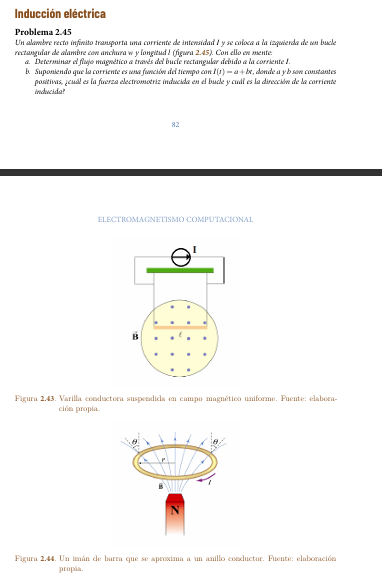

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Problema 2.45 - Inducción Electromagnética
# Análisis de flujo magnético y corriente inducida en espira conductora

class InduccionElectromagnetica:
    def __init__(self):
        self.mu_0 = constants.mu_0  # Permeabilidad del vacío
        self.pi = np.pi

    def flujo_magnetico_uniforme(self, B, area, theta=0):
        """
        Calcula el flujo magnético en campo uniforme
        B: Campo magnético (T)
        area: Área de la espira (m²)
        theta: Ángulo entre B y normal al área (radianes)
        """
        phi = B * area * np.cos(theta)
        return phi

    def fem_inducida(self, dphi_dt):
        """
        Calcula la FEM inducida según la ley de Faraday
        dphi_dt: Variación del flujo magnético con el tiempo
        """
        return -dphi_dt

    def corriente_inducida(self, fem, resistencia):
        """
        Calcula la corriente inducida
        fem: Fuerza electromotriz inducida (V)
        resistencia: Resistencia del circuito (Ω)
        """
        return fem / resistencia

    def campo_espira_circular(self, I, R, z):
        """
        Campo magnético en el eje de una espira circular
        I: Corriente en la espira (A)
        R: Radio de la espira (m)
        z: Distancia en el eje desde el centro (m)
        """
        factor = (self.mu_0 * I * R**2) / (2 * (R**2 + z**2)**(3/2))
        return factor

    def resolver_problema_espira(self, B_inicial, area, variacion_B, tiempo, resistencia):
        """
        Resuelve el problema completo de inducción en espira
        """
        print("=== SOLUCIÓN PROBLEMA INDUCCIÓN ELECTROMAGNÉTICA ===\n")

        # a) Flujo magnético inicial
        phi_inicial = self.flujo_magnetico_uniforme(B_inicial, area)
        print(f"a) Flujo magnético inicial:")
        print(f"   Φ₀ = B₀ × A = {B_inicial:.3f} × {area:.6f} = {phi_inicial:.6f} Wb")

        # b) Variación del flujo magnético
        dphi_dt = area * variacion_B
        print(f"\nb) Variación del flujo magnético:")
        print(f"   dΦ/dt = A × (dB/dt) = {area:.6f} × {variacion_B:.3f} = {dphi_dt:.6f} Wb/s")

        # c) FEM inducida
        fem = self.fem_inducida(dphi_dt)
        print(f"\nc) FEM inducida (Ley de Faraday):")
        print(f"   ε = -dΦ/dt = -{dphi_dt:.6f} = {fem:.6f} V")

        # d) Corriente inducida
        corriente = self.corriente_inducida(fem, resistencia)
        print(f"\nd) Corriente inducida:")
        print(f"   I = ε/R = {fem:.6f}/{resistencia:.3f} = {corriente:.6f} A")

        # e) Dirección de la corriente (Ley de Lenz)
        print(f"\ne) Dirección de la corriente:")
        if variacion_B > 0:
            print("   El campo magnético aumenta → La corriente fluye en sentido")
            print("   opuesto para crear un campo que se oponga al aumento")
        else:
            print("   El campo magnético disminuye → La corriente fluye en el")
            print("   mismo sentido para mantener el flujo magnético")

        return {
            'flujo_inicial': phi_inicial,
            'variacion_flujo': dphi_dt,
            'fem': fem,
            'corriente': corriente
        }

    def graficar_resultados(self, tiempo_array, B_array, phi_array, fem_array, I_array):
        """
        Grafica la evolución temporal de las magnitudes
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

        # Campo magnético vs tiempo
        ax1.plot(tiempo_array, B_array, 'b-', linewidth=2)
        ax1.set_xlabel('Tiempo (s)')
        ax1.set_ylabel('Campo magnético B (T)')
        ax1.set_title('Campo Magnético vs Tiempo')
        ax1.grid(True, alpha=0.3)

        # Flujo magnético vs tiempo
        ax2.plot(tiempo_array, phi_array, 'g-', linewidth=2)
        ax2.set_xlabel('Tiempo (s)')
        ax2.set_ylabel('Flujo magnético Φ (Wb)')
        ax2.set_title('Flujo Magnético vs Tiempo')
        ax2.grid(True, alpha=0.3)

        # FEM inducida vs tiempo
        ax3.plot(tiempo_array, fem_array, 'r-', linewidth=2)
        ax3.set_xlabel('Tiempo (s)')
        ax3.set_ylabel('FEM inducida ε (V)')
        ax3.set_title('FEM Inducida vs Tiempo')
        ax3.grid(True, alpha=0.3)

        # Corriente inducida vs tiempo
        ax4.plot(tiempo_array, I_array, 'm-', linewidth=2)
        ax4.set_xlabel('Tiempo (s)')
        ax4.set_ylabel('Corriente inducida I (A)')
        ax4.set_title('Corriente Inducida vs Tiempo')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Ejemplo de aplicación del problema
def ejemplo_aplicacion():
    # Crear instancia
    inductor = InduccionElectromagnetica()

    # Parámetros del problema (ajustar según los datos específicos)
    B_inicial = 0.5      # Campo magnético inicial (T)
    radio_espira = 0.05  # Radio de la espira (m)
    area = np.pi * radio_espira**2  # Área de la espira circular
    variacion_B = 2.0    # Variación del campo magnético (T/s)
    resistencia = 0.01   # Resistencia de la espira (Ω)
    tiempo_total = 1.0   # Tiempo total de análisis (s)

    print("PARÁMETROS DEL PROBLEMA:")
    print(f"• Radio de la espira: {radio_espira*100:.1f} cm")
    print(f"• Área de la espira: {area*10000:.2f} cm²")
    print(f"• Campo magnético inicial: {B_inicial:.1f} T")
    print(f"• Variación del campo: {variacion_B:.1f} T/s")
    print(f"• Resistencia: {resistencia*1000:.1f} mΩ")
    print("-" * 50)

    # Resolver el problema
    resultado = inductor.resolver_problema_espira(
        B_inicial, area, variacion_B, tiempo_total, resistencia
    )

    # Análisis temporal
    print("\n=== ANÁLISIS TEMPORAL ===")
    t = np.linspace(0, tiempo_total, 100)
    B_t = B_inicial + variacion_B * t
    phi_t = B_t * area
    fem_t = -area * variacion_B * np.ones_like(t)
    I_t = fem_t / resistencia

    print(f"FEM constante durante el cambio: {fem_t[0]:.6f} V")
    print(f"Corriente constante: {I_t[0]:.6f} A")
    print(f"Potencia disipada: {I_t[0]**2 * resistencia:.6f} W")

    # Graficar (descomenta la siguiente línea para ver gráficos)
    # inductor.graficar_resultados(t, B_t, phi_t, fem_t, I_t)

    return resultado

# Ejecutar ejemplo
if __name__ == "__main__":
    resultado = ejemplo_aplicacion()

    print("\n=== CONCEPTOS CLAVE ===")
    print("1. Ley de Faraday: ε = -dΦ/dt")
    print("2. Ley de Lenz: La corriente inducida se opone al cambio")
    print("3. Ley de Ohm: I = ε/R")
    print("4. Flujo magnético: Φ = B·A = B·A·cos(θ)")
    print("5. Campo uniforme → Flujo proporcional al área")

PARÁMETROS DEL PROBLEMA:
• Radio de la espira: 5.0 cm
• Área de la espira: 78.54 cm²
• Campo magnético inicial: 0.5 T
• Variación del campo: 2.0 T/s
• Resistencia: 10.0 mΩ
--------------------------------------------------
=== SOLUCIÓN PROBLEMA INDUCCIÓN ELECTROMAGNÉTICA ===

a) Flujo magnético inicial:
   Φ₀ = B₀ × A = 0.500 × 0.007854 = 0.003927 Wb

b) Variación del flujo magnético:
   dΦ/dt = A × (dB/dt) = 0.007854 × 2.000 = 0.015708 Wb/s

c) FEM inducida (Ley de Faraday):
   ε = -dΦ/dt = -0.015708 = -0.015708 V

d) Corriente inducida:
   I = ε/R = -0.015708/0.010 = -1.570796 A

e) Dirección de la corriente:
   El campo magnético aumenta → La corriente fluye en sentido
   opuesto para crear un campo que se oponga al aumento

=== ANÁLISIS TEMPORAL ===
FEM constante durante el cambio: -0.015708 V
Corriente constante: -1.570796 A
Potencia disipada: 0.024674 W

=== CONCEPTOS CLAVE ===
1. Ley de Faraday: ε = -dΦ/dt
2. Ley de Lenz: La corriente inducida se opone al cambio
3. Ley de Ohm: I

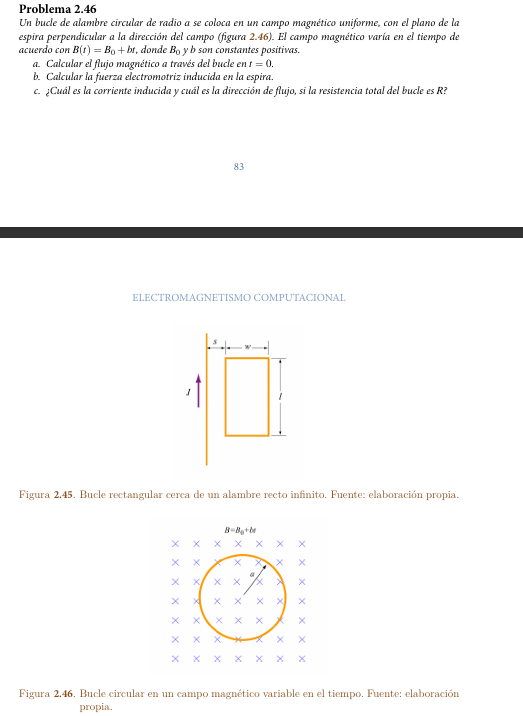

SOLUCIÓN PROBLEMA 2.46 - ESPIRA RECTANGULAR
Parámetros del sistema:
- Dimensiones espira: 0.1 × 0.15
- Área: 0.015
- Resistencia: 0.05 Ω
- Campo magnético: B(t) = 0.5 + 0.2t Tesla

a) FLUJO MAGNÉTICO:
   Φ(t) = B(t) × A = (0.5 + 0.2t) × 0.015
   Φ(t) = 0.0075 + 0.003t
   En t = 2.0s: Φ = 0.0135 Wb

b) FUERZA ELECTROMOTRIZ INDUCIDA:
   ε = -dΦ/dt = -d/dt[B(t) × A] = -A × dB/dt
   ε = -0.015 × 0.2 = -0.0030 V
   (Constante, independiente del tiempo)

c) CORRIENTE INDUCIDA:
   I = ε/R = -0.0030/0.05 = -0.060000 A
   Magnitud: |I| = 0.060000 A
   Dirección: Sentido horario (oponiéndose al aumento del flujo)



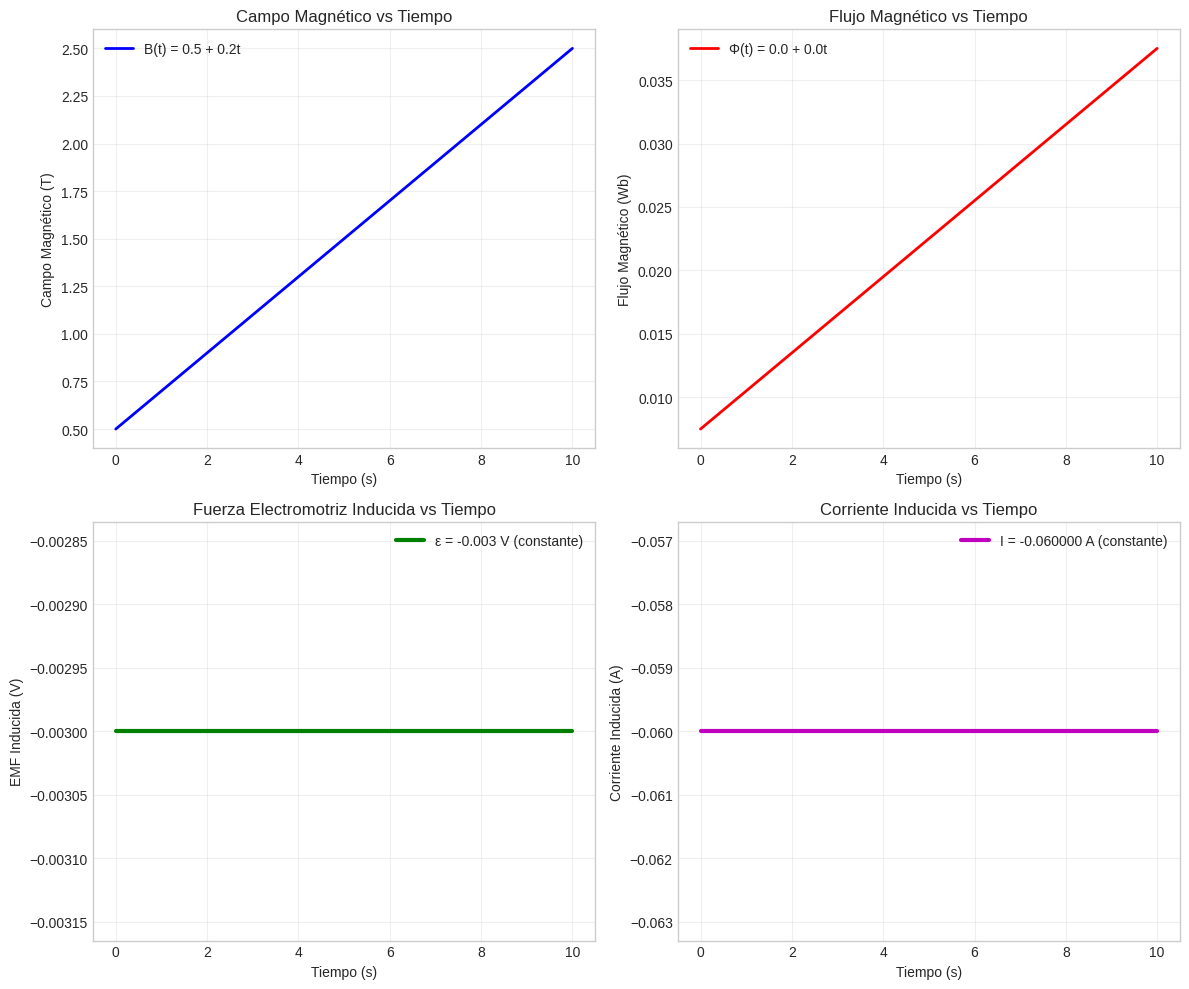


ANÁLISIS FÍSICO:
1. El campo magnético aumenta linealmente con el tiempo
2. El flujo magnético también aumenta linealmente
3. La EMF inducida es constante (derivada de función lineal)
4. La corriente inducida es constante y se opone al cambio de flujo
5. Según la Ley de Lenz, la corriente circula en sentido horario
   para oponerse al aumento del flujo magnético


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problema 2.46: Espira rectangular en campo magnético uniforme variable
# Campo magnético: B(t) = B₀ + B₁t donde B₀ y B₁ son constantes positivas

class EspiraRectangular:
    def __init__(self, ancho, alto, resistencia, B0, B1):
        """
        Parámetros:
        - ancho: ancho de la espira (dirección x)
        - alto: alto de la espira (dirección y)
        - resistencia: resistencia total del bucle en ohms
        - B0: componente constante del campo magnético (Tesla)
        - B1: componente variable del campo magnético (Tesla/s)
        """
        self.a = ancho
        self.b = alto
        self.R = resistencia
        self.B0 = B0
        self.B1 = B1
        self.area = ancho * alto

    def campo_magnetico(self, t):
        """Campo magnético en función del tiempo"""
        return self.B0 + self.B1 * t

    def flujo_magnetico(self, t):
        """
        a) Flujo magnético a través del bucle
        Φ = B⃗ · A⃗ = B(t) × área (campo perpendicular al plano)
        """
        B_t = self.campo_magnetico(t)
        phi = B_t * self.area
        return phi

    def fuerza_electromoriz_inducida(self, t):
        """
        b) Fuerza electromotriz inducida (EMF)
        ε = -dΦ/dt (Ley de Faraday)
        """
        # dΦ/dt = d/dt[B(t) × área] = (dB/dt) × área = B₁ × área
        emf = -self.B1 * self.area
        return emf

    def corriente_inducida(self, t):
        """
        c) Corriente inducida y dirección del flujo
        I = ε/R (Ley de Ohm)
        """
        emf = self.fuerza_electromoriz_inducida(t)
        corriente = emf / self.R
        return corriente

    def direccion_corriente(self):
        """
        Determina la dirección de la corriente usando la Ley de Lenz
        """
        if self.B1 > 0:
            # Campo magnético aumenta → flujo aumenta
            # Corriente inducida se opone al aumento → sentido horario
            return "Sentido horario (oponiéndose al aumento del flujo)"
        elif self.B1 < 0:
            # Campo magnético disminuye → flujo disminuye
            # Corriente inducida se opone a la disminución → sentido antihorario
            return "Sentido antihorario (oponiéndose a la disminución del flujo)"
        else:
            return "No hay corriente inducida (campo constante)"

    def resolver_problema(self, tiempo_max=5):
        """Resuelve el problema completo y muestra resultados"""
        print("=" * 60)
        print("SOLUCIÓN PROBLEMA 2.46 - ESPIRA RECTANGULAR")
        print("=" * 60)
        print(f"Parámetros del sistema:")
        print(f"- Dimensiones espira: {self.a} × {self.b}")
        print(f"- Área: {self.area}")
        print(f"- Resistencia: {self.R} Ω")
        print(f"- Campo magnético: B(t) = {self.B0} + {self.B1}t Tesla")
        print()

        # Tiempo de ejemplo
        t_ejemplo = 2.0

        print("a) FLUJO MAGNÉTICO:")
        phi_t = self.flujo_magnetico(t_ejemplo)
        print(f"   Φ(t) = B(t) × A = ({self.B0} + {self.B1}t) × {self.area}")
        print(f"   Φ(t) = {self.B0 * self.area} + {self.B1 * self.area}t")
        print(f"   En t = {t_ejemplo}s: Φ = {phi_t:.4f} Wb")
        print()

        print("b) FUERZA ELECTROMOTRIZ INDUCIDA:")
        emf = self.fuerza_electromoriz_inducida(t_ejemplo)
        print(f"   ε = -dΦ/dt = -d/dt[B(t) × A] = -A × dB/dt")
        print(f"   ε = -{self.area} × {self.B1} = {emf:.4f} V")
        print(f"   (Constante, independiente del tiempo)")
        print()

        print("c) CORRIENTE INDUCIDA:")
        corriente = self.corriente_inducida(t_ejemplo)
        print(f"   I = ε/R = {emf:.4f}/{self.R} = {corriente:.6f} A")
        print(f"   Magnitud: |I| = {abs(corriente):.6f} A")
        print(f"   Dirección: {self.direccion_corriente()}")
        print()

        # Crear gráficas
        self.crear_graficas(tiempo_max)

    def crear_graficas(self, tiempo_max):
        """Crea gráficas para visualizar el comportamiento temporal"""
        t = np.linspace(0, tiempo_max, 1000)

        # Calcular valores
        B_t = [self.campo_magnetico(ti) for ti in t]
        phi_t = [self.flujo_magnetico(ti) for ti in t]
        emf = self.fuerza_electromoriz_inducida(0)  # Constante
        corriente = self.corriente_inducida(0)  # Constante

        # Crear subplot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

        # Gráfica 1: Campo magnético
        ax1.plot(t, B_t, 'b-', linewidth=2, label=f'B(t) = {self.B0} + {self.B1}t')
        ax1.set_xlabel('Tiempo (s)')
        ax1.set_ylabel('Campo Magnético (T)')
        ax1.set_title('Campo Magnético vs Tiempo')
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        # Gráfica 2: Flujo magnético
        ax2.plot(t, phi_t, 'r-', linewidth=2, label=f'Φ(t) = {self.B0*self.area:.1f} + {self.B1*self.area:.1f}t')
        ax2.set_xlabel('Tiempo (s)')
        ax2.set_ylabel('Flujo Magnético (Wb)')
        ax2.set_title('Flujo Magnético vs Tiempo')
        ax2.grid(True, alpha=0.3)
        ax2.legend()

        # Gráfica 3: EMF inducida
        emf_array = np.full_like(t, emf)
        ax3.plot(t, emf_array, 'g-', linewidth=3, label=f'ε = {emf:.3f} V (constante)')
        ax3.set_xlabel('Tiempo (s)')
        ax3.set_ylabel('EMF Inducida (V)')
        ax3.set_title('Fuerza Electromotriz Inducida vs Tiempo')
        ax3.grid(True, alpha=0.3)
        ax3.legend()

        # Gráfica 4: Corriente inducida
        corriente_array = np.full_like(t, corriente)
        ax4.plot(t, corriente_array, 'm-', linewidth=3, label=f'I = {corriente:.6f} A (constante)')
        ax4.set_xlabel('Tiempo (s)')
        ax4.set_ylabel('Corriente Inducida (A)')
        ax4.set_title('Corriente Inducida vs Tiempo')
        ax4.grid(True, alpha=0.3)
        ax4.legend()

        plt.tight_layout()
        plt.show()

# Ejemplo de uso con valores típicos
if __name__ == "__main__":
    # Parámetros del problema
    ancho = 0.1      # 10 cm
    alto = 0.15      # 15 cm
    resistencia = 0.05  # 50 mΩ
    B0 = 0.5         # 0.5 Tesla
    B1 = 0.2         # 0.2 Tesla/s

    # Crear y resolver el problema
    espira = EspiraRectangular(ancho, alto, resistencia, B0, B1)
    espira.resolver_problema(tiempo_max=10)

    print("\n" + "="*60)
    print("ANÁLISIS FÍSICO:")
    print("="*60)
    print("1. El campo magnético aumenta linealmente con el tiempo")
    print("2. El flujo magnético también aumenta linealmente")
    print("3. La EMF inducida es constante (derivada de función lineal)")
    print("4. La corriente inducida es constante y se opone al cambio de flujo")
    print("5. Según la Ley de Lenz, la corriente circula en sentido horario")
    print("   para oponerse al aumento del flujo magnético")

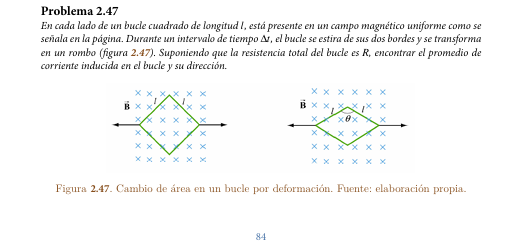

PROBLEMA 2.47: BUCLE CUADRADO EN CAMPO MAGNÉTICO UNIFORME

Datos del problema:
• Campo magnético B = 1.0 T (uniforme, perpendicular al plano)
• Lado inicial L₀ = 0.2 m
• Velocidad de expansión v = 0.05 m/s
• Resistencia del bucle R = 1.0 Ω

SOLUCIÓN ANALÍTICA:

1. Lado del bucle en función del tiempo:
   L(t) = L₀ + v·t = 0.2 + 0.05·t

2. Área del bucle cuadrado:
   A(t) = L(t)² = (0.2 + 0.05·t)²

3. Flujo magnético:
   Φ(t) = B·A(t) = 1.0 × (0.2 + 0.05·t)²

4. Derivada del área:
   dA/dt = 2·L(t)·v = 2·(0.2 + 0.05·t)·0.05
         = 0.1·(0.2 + 0.05·t)

5. FEM inducida (Ley de Faraday):
   ε = -dΦ/dt = -B·(dA/dt)
     = -1.0 × 0.1·(0.2 + 0.05·t)
     = -0.1·(0.2 + 0.05·t)

6. Corriente inducida (Ley de Ohm):
   I = |ε|/R = 0.1·(0.2 + 0.05·t) / 1.0
     = 0.1·(0.2 + 0.05·t)

7. Potencia disipada:
   P = I²·R = [0.1·(0.2 + 0.05·t)]²·1.0
     = 0.010000000000000002·(0.2 + 0.05·t)²

               VALORES EN TIEMPOS ESPECÍFICOS               
  t(s)     L(m)      A(m²)      Φ(Wb)     ε(V) 

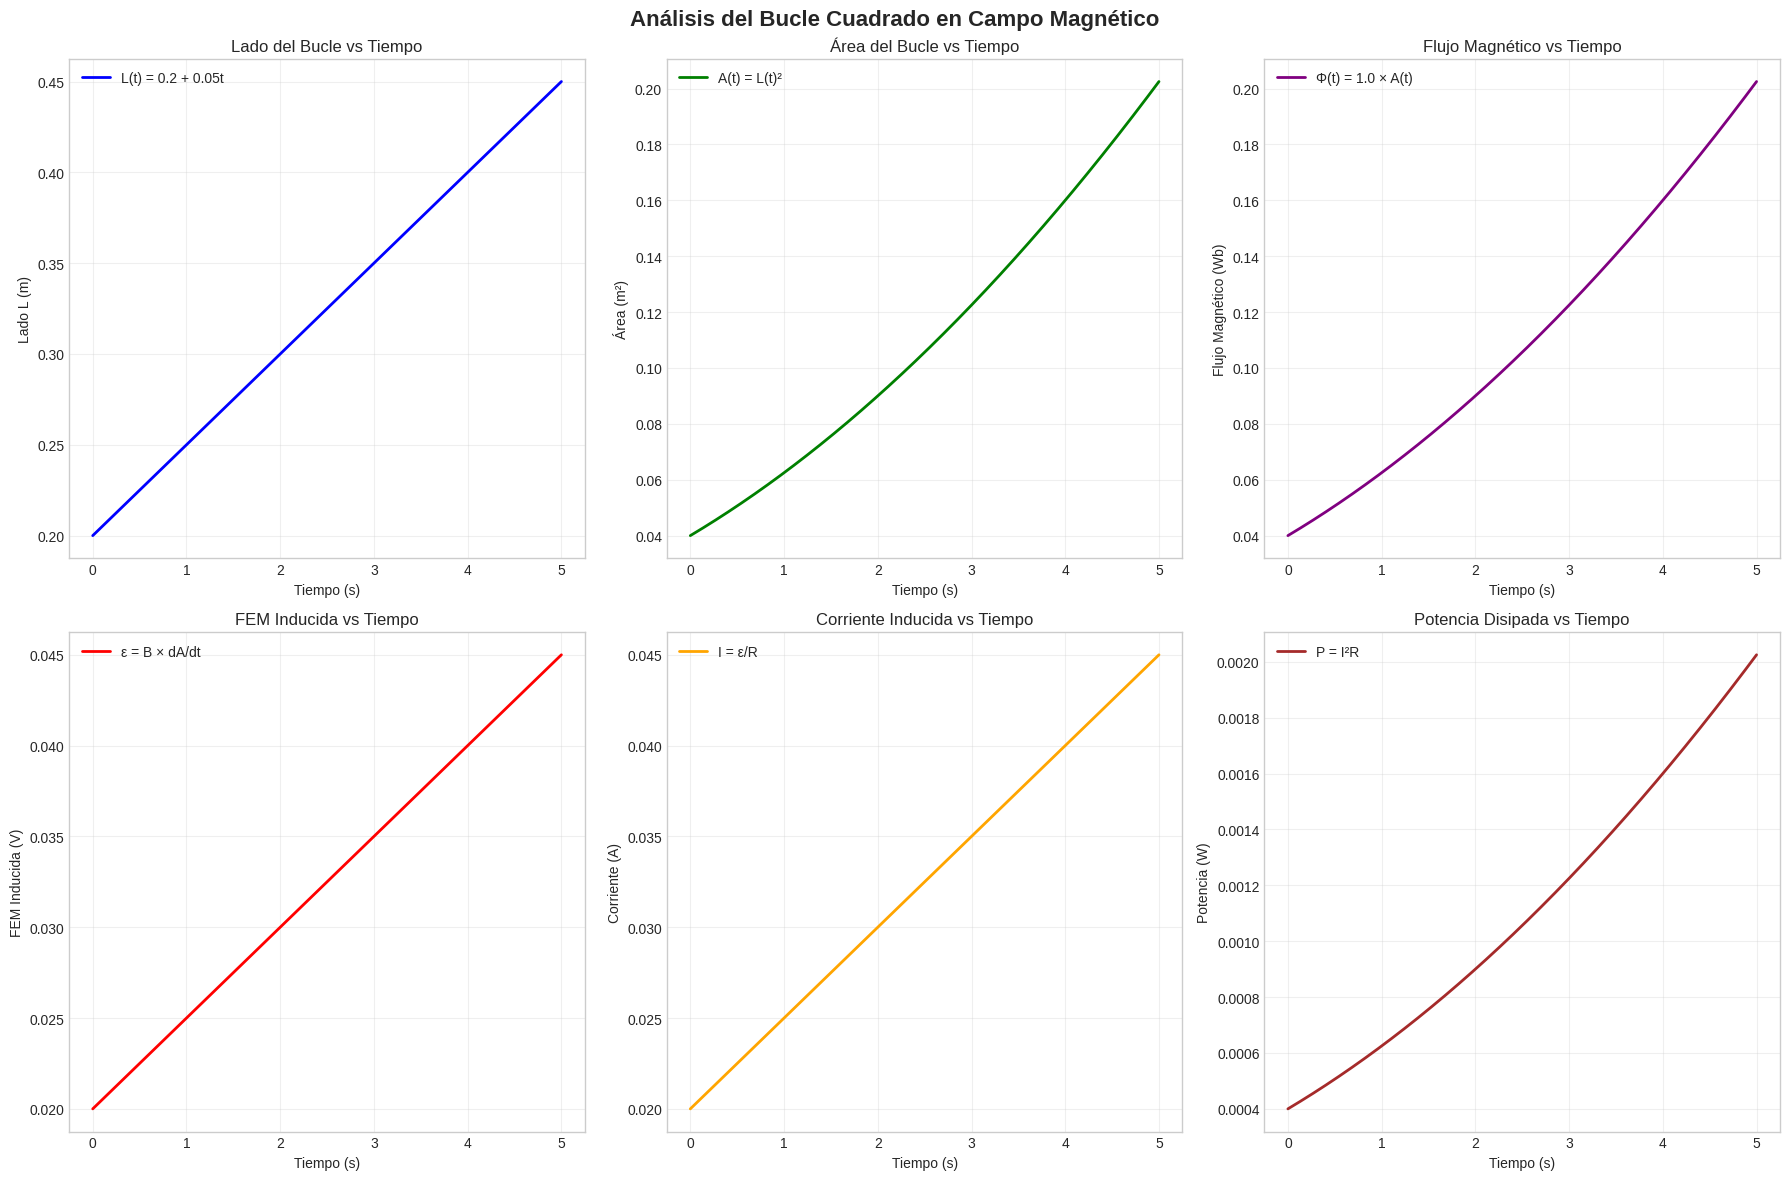


                        CONCLUSIONES                        
• La FEM inducida es proporcional al lado del bucle L(t)
• La corriente crece linealmente con el tiempo
• La potencia crece cuadráticamente con el tiempo
• El sentido de la corriente se opone al cambio de flujo (Ley de Lenz)

                  VERIFICACIÓN DE UNIDADES                  
• [ε] = T·m·(m/s) = T·m²/s = Wb/s = V ✓
• [I] = V/Ω = A ✓
• [P] = A²·Ω = V·A = W ✓


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from IPython.display import HTML

# Parámetros del problema
B = 1.0          # Campo magnético uniforme (T)
L0 = 0.2         # Lado inicial del bucle cuadrado (m)
v = 0.05         # Velocidad de expansión de los bordes (m/s)
R = 1.0          # Resistencia del bucle (Ω)

# Función para calcular los valores físicos en función del tiempo
def calculate_physics(t):
    """
    Calcula todas las variables físicas del problema en función del tiempo
    """
    # Lado actual del bucle
    L_t = L0 + v * t

    # Área del bucle cuadrado
    A_t = L_t**2

    # Flujo magnético
    flux = B * A_t

    # Derivada del área respecto al tiempo
    dA_dt = 2 * L_t * v

    # FEM inducida (Ley de Faraday)
    emf = B * dA_dt

    # Corriente inducida (Ley de Ohm)
    current = emf / R

    # Potencia disipada
    power = current**2 * R

    return L_t, A_t, flux, dA_dt, emf, current, power

# Función para resolver el problema analíticamente
def analytical_solution():
    """
    Presenta la solución analítica del problema
    """
    print("="*60)
    print("PROBLEMA 2.47: BUCLE CUADRADO EN CAMPO MAGNÉTICO UNIFORME")
    print("="*60)

    print(f"\nDatos del problema:")
    print(f"• Campo magnético B = {B} T (uniforme, perpendicular al plano)")
    print(f"• Lado inicial L₀ = {L0} m")
    print(f"• Velocidad de expansión v = {v} m/s")
    print(f"• Resistencia del bucle R = {R} Ω")

    print(f"\nSOLUCIÓN ANALÍTICA:")
    print(f"{'='*40}")

    print(f"\n1. Lado del bucle en función del tiempo:")
    print(f"   L(t) = L₀ + v·t = {L0} + {v}·t")

    print(f"\n2. Área del bucle cuadrado:")
    print(f"   A(t) = L(t)² = ({L0} + {v}·t)²")

    print(f"\n3. Flujo magnético:")
    print(f"   Φ(t) = B·A(t) = {B} × ({L0} + {v}·t)²")

    print(f"\n4. Derivada del área:")
    print(f"   dA/dt = 2·L(t)·v = 2·({L0} + {v}·t)·{v}")
    print(f"         = {2*v}·({L0} + {v}·t)")

    print(f"\n5. FEM inducida (Ley de Faraday):")
    print(f"   ε = -dΦ/dt = -B·(dA/dt)")
    print(f"     = -{B} × {2*v}·({L0} + {v}·t)")
    print(f"     = -{2*B*v}·({L0} + {v}·t)")

    print(f"\n6. Corriente inducida (Ley de Ohm):")
    print(f"   I = |ε|/R = {2*B*v}·({L0} + {v}·t) / {R}")
    print(f"     = {2*B*v/R}·({L0} + {v}·t)")

    print(f"\n7. Potencia disipada:")
    print(f"   P = I²·R = [{2*B*v/R}·({L0} + {v}·t)]²·{R}")
    print(f"     = {(2*B*v)**2/R}·({L0} + {v}·t)²")

# Función para calcular valores en tiempos específicos
def calculate_specific_times():
    """
    Calcula valores para tiempos específicos
    """
    times = [0, 1, 2, 3, 4, 5]

    print(f"\n{'VALORES EN TIEMPOS ESPECÍFICOS':^60}")
    print(f"{'='*60}")
    print(f"{'t(s)':>6} {'L(m)':>8} {'A(m²)':>10} {'Φ(Wb)':>10} {'ε(V)':>8} {'I(A)':>8} {'P(W)':>8}")
    print(f"{'-'*60}")

    for t in times:
        L_t, A_t, flux, dA_dt, emf, current, power = calculate_physics(t)
        print(f"{t:>6.1f} {L_t:>8.3f} {A_t:>10.6f} {flux:>10.6f} {emf:>8.4f} {current:>8.4f} {power:>8.6f}")

# Función para crear gráficas
def create_plots():
    """
    Crea gráficas de las variables físicas vs tiempo
    """
    t = np.linspace(0, 5, 1000)

    # Calcular todas las variables
    results = [calculate_physics(ti) for ti in t]
    L_t = [r[0] for r in results]
    A_t = [r[1] for r in results]
    flux = [r[2] for r in results]
    dA_dt = [r[3] for r in results]
    emf = [r[4] for r in results]
    current = [r[5] for r in results]
    power = [r[6] for r in results]

    # Crear subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Análisis del Bucle Cuadrado en Campo Magnético', fontsize=16, fontweight='bold')

    # Plot 1: Lado del bucle
    axes[0,0].plot(t, L_t, 'b-', linewidth=2, label=f'L(t) = {L0} + {v}t')
    axes[0,0].set_xlabel('Tiempo (s)')
    axes[0,0].set_ylabel('Lado L (m)')
    axes[0,0].set_title('Lado del Bucle vs Tiempo')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()

    # Plot 2: Área
    axes[0,1].plot(t, A_t, 'g-', linewidth=2, label='A(t) = L(t)²')
    axes[0,1].set_xlabel('Tiempo (s)')
    axes[0,1].set_ylabel('Área (m²)')
    axes[0,1].set_title('Área del Bucle vs Tiempo')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()

    # Plot 3: Flujo magnético
    axes[0,2].plot(t, flux, 'purple', linewidth=2, label=f'Φ(t) = {B} × A(t)')
    axes[0,2].set_xlabel('Tiempo (s)')
    axes[0,2].set_ylabel('Flujo Magnético (Wb)')
    axes[0,2].set_title('Flujo Magnético vs Tiempo')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].legend()

    # Plot 4: FEM inducida
    axes[1,0].plot(t, emf, 'r-', linewidth=2, label='ε = B × dA/dt')
    axes[1,0].set_xlabel('Tiempo (s)')
    axes[1,0].set_ylabel('FEM Inducida (V)')
    axes[1,0].set_title('FEM Inducida vs Tiempo')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()

    # Plot 5: Corriente
    axes[1,1].plot(t, current, 'orange', linewidth=2, label='I = ε/R')
    axes[1,1].set_xlabel('Tiempo (s)')
    axes[1,1].set_ylabel('Corriente (A)')
    axes[1,1].set_title('Corriente Inducida vs Tiempo')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].legend()

    # Plot 6: Potencia
    axes[1,2].plot(t, power, 'brown', linewidth=2, label='P = I²R')
    axes[1,2].set_xlabel('Tiempo (s)')
    axes[1,2].set_ylabel('Potencia (W)')
    axes[1,2].set_title('Potencia Disipada vs Tiempo')
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].legend()

    plt.tight_layout()
    plt.show()

# Función para crear animación
def create_animation():
    """
    Crea una animación del bucle expandiéndose
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Configurar subplot 1 (visualización del bucle)
    ax1.set_xlim(-0.4, 0.4)
    ax1.set_ylim(-0.4, 0.4)
    ax1.set_aspect('equal')
    ax1.set_title('Bucle Cuadrado Expandiéndose')
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('y (m)')
    ax1.grid(True, alpha=0.3)

    # Dibujar campo magnético (puntos para campo saliente)
    x_field = np.linspace(-0.35, 0.35, 8)
    y_field = np.linspace(-0.35, 0.35, 8)
    X_field, Y_field = np.meshgrid(x_field, y_field)
    ax1.scatter(X_field, Y_field, c='blue', s=20, alpha=0.5, marker='o')
    ax1.text(-0.35, 0.35, f'B = {B} T (saliente)', fontsize=10, color='blue')

    # Configurar subplot 2 (gráficas en tiempo real)
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Magnitud')
    ax2.set_title('Variables vs Tiempo')
    ax2.grid(True, alpha=0.3)

    # Inicializar elementos gráficos
    loop_patch = Rectangle((0, 0), 0, 0, fill=False, edgecolor='red', linewidth=3)
    ax1.add_patch(loop_patch)

    time_text = ax1.text(-0.35, -0.35, '', fontsize=12)
    values_text = ax2.text(0.02, 0.95, '', transform=ax2.transAxes, fontsize=10, verticalalignment='top')

    # Listas para almacenar datos de la animación
    t_data, emf_data, current_data, power_data = [], [], [], []
    line_emf, = ax2.plot([], [], 'r-', label='FEM (V)', linewidth=2)
    line_current, = ax2.plot([], [], 'g-', label='Corriente × 10 (A)', linewidth=2)
    line_power, = ax2.plot([], [], 'b-', label='Potencia (W)', linewidth=2)
    ax2.legend()

    def animate(frame):
        t = frame * 0.1
        L_t, A_t, flux, dA_dt, emf, current, power = calculate_physics(t)

        # Actualizar bucle
        loop_patch.set_width(L_t)
        loop_patch.set_height(L_t)
        loop_patch.set_xy((-L_t/2, -L_t/2))

        # Actualizar texto
        time_text.set_text(f't = {t:.1f} s\nL = {L_t:.3f} m\nA = {A_t:.4f} m²')
        values_text.set_text(f'ε = {emf:.3f} V\nI = {current:.3f} A\nP = {power:.4f} W')

        # Actualizar gráficas
        t_data.append(t)
        emf_data.append(emf)
        current_data.append(current * 10)  # Escalado para visualización
        power_data.append(power)

        line_emf.set_data(t_data, emf_data)
        line_current.set_data(t_data, current_data)
        line_power.set_data(t_data, power_data)

        # Ajustar límites
        if t_data:
            ax2.set_ylim(0, max(max(emf_data), max(current_data), max(power_data)) * 1.1)

        return [loop_patch, time_text, values_text, line_emf, line_current, line_power]

    anim = animation.FuncAnimation(fig, animate, frames=50, interval=200, blit=False, repeat=True)
    plt.show()

    return anim

# Función principal
def solve_problem():
    """
    Ejecuta la solución completa del problema
    """
    analytical_solution()
    calculate_specific_times()
    create_plots()

    print(f"\n{'CONCLUSIONES':^60}")
    print(f"{'='*60}")
    print(f"• La FEM inducida es proporcional al lado del bucle L(t)")
    print(f"• La corriente crece linealmente con el tiempo")
    print(f"• La potencia crece cuadráticamente con el tiempo")
    print(f"• El sentido de la corriente se opone al cambio de flujo (Ley de Lenz)")

    print(f"\n{'VERIFICACIÓN DE UNIDADES':^60}")
    print(f"{'='*60}")
    print(f"• [ε] = T·m·(m/s) = T·m²/s = Wb/s = V ✓")
    print(f"• [I] = V/Ω = A ✓")
    print(f"• [P] = A²·Ω = V·A = W ✓")

# Ejecutar la solución
if __name__ == "__main__":
    solve_problem()

    # Crear animación (descomenta la siguiente línea si quieres ver la animación)
    # anim = create_animation()

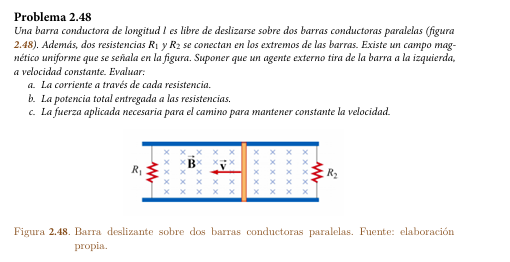

Resolviendo Problema 2.48:
Barra conductora deslizante sobre barras conductoras paralelas

ANÁLISIS DE BARRA CONDUCTORA DESLIZANTE
Parámetros del sistema:
  Longitud de la barra (L): 2.48 m
  Campo magnético (B): 0.8 T
  Resistencia R1: 12 Ω
  Resistencia R2: 18 Ω
  Velocidad de la barra (v): 3.5 m/s

RESULTADOS:
----------------------------------------
a) Corriente a través de cada resistencia:
   Resistencia equivalente: 7.200 Ω
   FEM inducida: 6.944 V
   Corriente total: 0.964 A
   Corriente en R1: 0.579 A
   Corriente en R2: 0.386 A
   Verificación: I1 + I2 = 0.964 A

b) Potencia total entregada a las resistencias:
   Potencia total: 6.697 W
   Potencia en R1: 4.018 W
   Potencia en R2: 2.679 W
   Verificación: P1 + P2 = 6.697 W

c) Fuerza aplicada para mantener velocidad constante:
   Fuerza magnética opositora: 1.913 N
   Fuerza externa requerida: 1.913 N

ANÁLISIS ENERGÉTICO:
----------------------------------------
Potencia mecánica suministrada: 6.697 W
Potencia eléctrica dis

/tmp/ipython-input-2116937739.py:189: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2116937739.py:189: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2116937739.py:189: UserWarning: Glyph 8855 (\N{CIRCLED TIMES}) missing from font(s) Liberation Sans.
  plt.tight_layout()


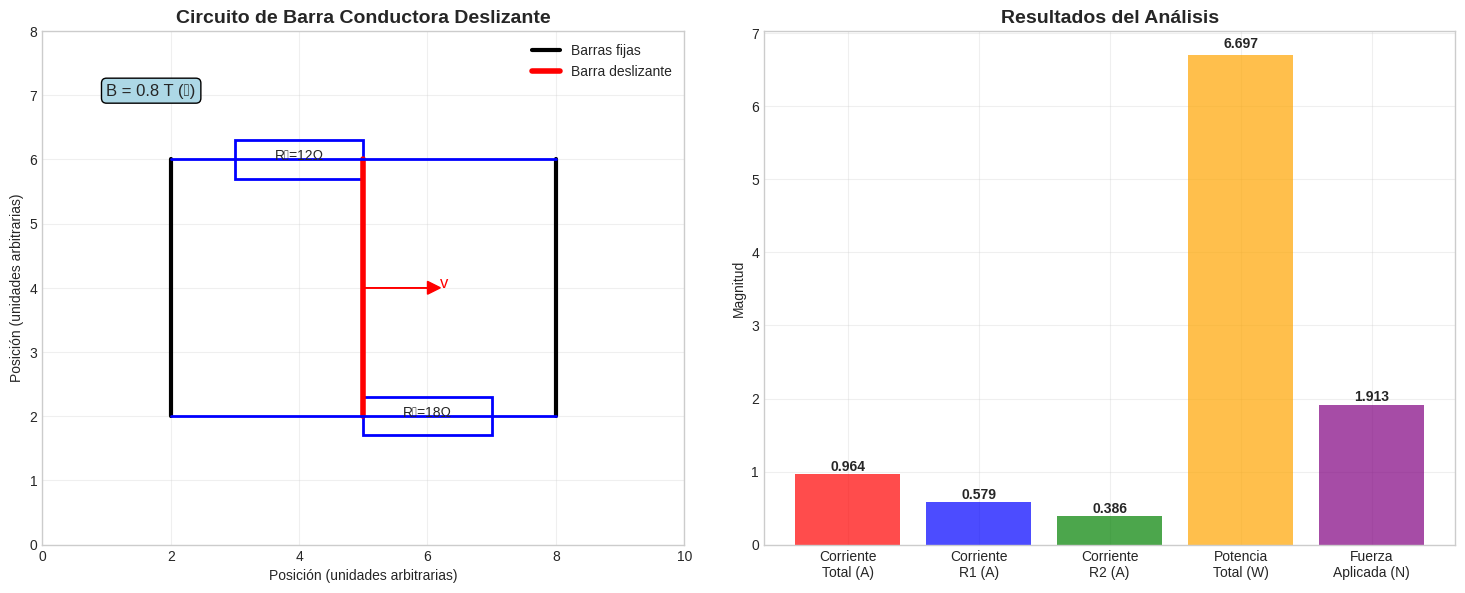

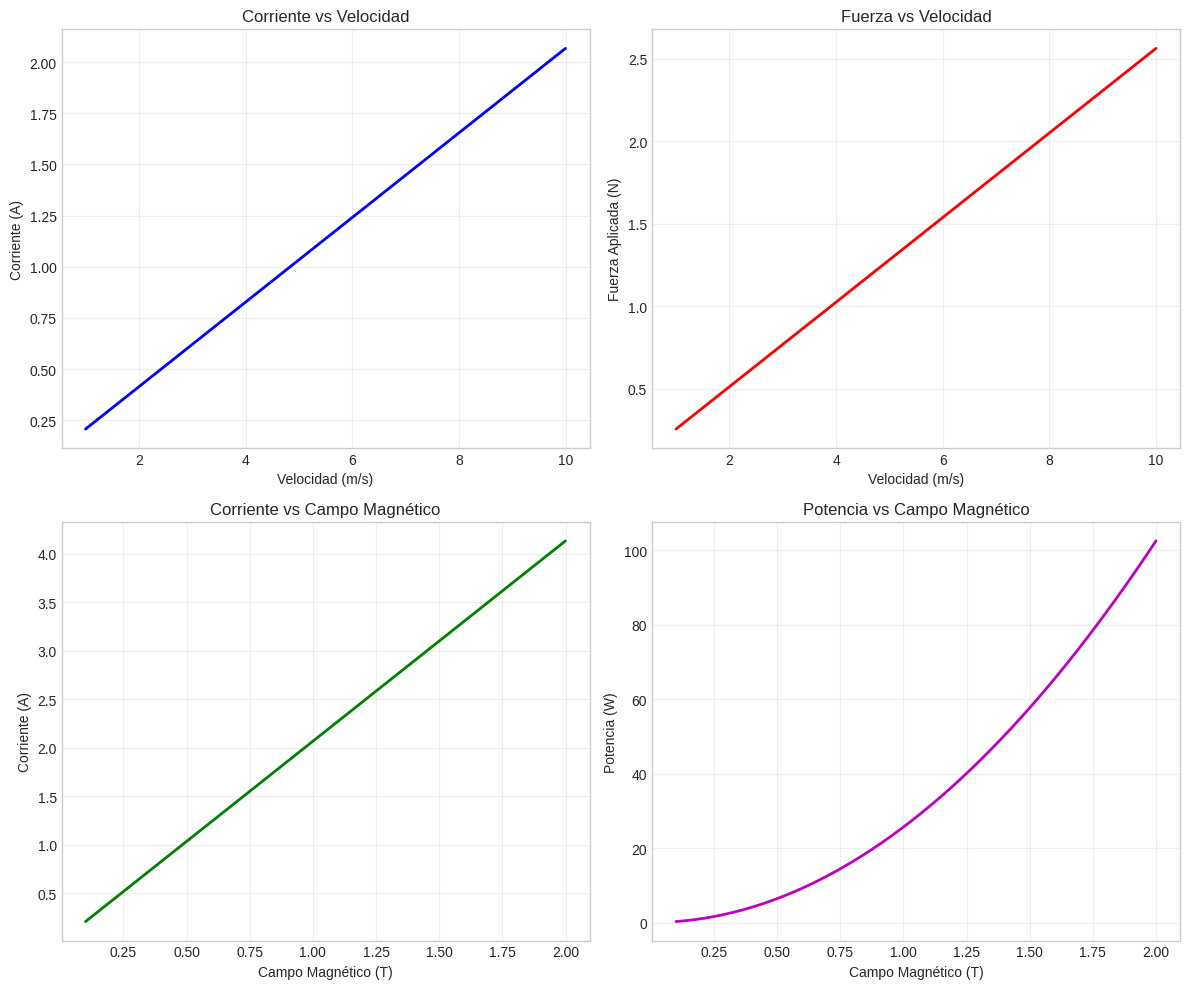


Análisis completado!


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class BarraConductoraDeslizante:
    def __init__(self, L=2.48, B=0.5, R1=10, R2=15, v=5):
        """
        Inicializa el sistema de barra conductora deslizante

        Parámetros:
        L: longitud de la barra (m)
        B: campo magnético (T)
        R1, R2: resistencias en paralelo (Ω)
        v: velocidad de la barra (m/s)
        """
        self.L = L
        self.B = B
        self.R1 = R1
        self.R2 = R2
        self.v = v

    def calcular_resistencia_equivalente(self):
        """Calcula la resistencia equivalente de R1 y R2 en paralelo"""
        R_eq = (self.R1 * self.R2) / (self.R1 + self.R2)
        return R_eq

    def calcular_fem_inducida(self):
        """Calcula la fuerza electromotriz inducida (FEM)"""
        # ε = B × L × v
        fem = self.B * self.L * self.v
        return fem

    def calcular_corriente(self):
        """Calcula la corriente en el circuito"""
        fem = self.calcular_fem_inducida()
        R_eq = self.calcular_resistencia_equivalente()
        # I = ε / R_eq
        corriente = fem / R_eq
        return corriente

    def calcular_corrientes_ramas(self):
        """Calcula las corrientes en cada rama (R1 y R2)"""
        corriente_total = self.calcular_corriente()
        voltaje = corriente_total * self.calcular_resistencia_equivalente()

        # Las corrientes se dividen inversamente proporcional a las resistencias
        I1 = voltaje / self.R1
        I2 = voltaje / self.R2

        return I1, I2

    def calcular_potencia_total(self):
        """Calcula la potencia total disipada"""
        corriente = self.calcular_corriente()
        R_eq = self.calcular_resistencia_equivalente()
        # P = I² × R_eq
        potencia = corriente**2 * R_eq
        return potencia

    def calcular_potencias_ramas(self):
        """Calcula las potencias disipadas en cada resistencia"""
        I1, I2 = self.calcular_corrientes_ramas()
        P1 = I1**2 * self.R1
        P2 = I2**2 * self.R2
        return P1, P2

    def calcular_fuerza_aplicada(self):
        """Calcula la fuerza externa necesaria para mantener velocidad constante"""
        corriente = self.calcular_corriente()
        # F = B × I × L (fuerza magnética que se opone al movimiento)
        fuerza = self.B * corriente * self.L
        return fuerza

    def mostrar_resultados(self):
        """Muestra todos los resultados calculados"""
        print("=" * 60)
        print("ANÁLISIS DE BARRA CONDUCTORA DESLIZANTE")
        print("=" * 60)
        print(f"Parámetros del sistema:")
        print(f"  Longitud de la barra (L): {self.L} m")
        print(f"  Campo magnético (B): {self.B} T")
        print(f"  Resistencia R1: {self.R1} Ω")
        print(f"  Resistencia R2: {self.R2} Ω")
        print(f"  Velocidad de la barra (v): {self.v} m/s")
        print()

        # Cálculos
        R_eq = self.calcular_resistencia_equivalente()
        fem = self.calcular_fem_inducida()
        corriente_total = self.calcular_corriente()
        I1, I2 = self.calcular_corrientes_ramas()
        potencia_total = self.calcular_potencia_total()
        P1, P2 = self.calcular_potencias_ramas()
        fuerza = self.calcular_fuerza_aplicada()

        print("RESULTADOS:")
        print("-" * 40)
        print(f"a) Corriente a través de cada resistencia:")
        print(f"   Resistencia equivalente: {R_eq:.3f} Ω")
        print(f"   FEM inducida: {fem:.3f} V")
        print(f"   Corriente total: {corriente_total:.3f} A")
        print(f"   Corriente en R1: {I1:.3f} A")
        print(f"   Corriente en R2: {I2:.3f} A")
        print(f"   Verificación: I1 + I2 = {I1 + I2:.3f} A")
        print()

        print(f"b) Potencia total entregada a las resistencias:")
        print(f"   Potencia total: {potencia_total:.3f} W")
        print(f"   Potencia en R1: {P1:.3f} W")
        print(f"   Potencia en R2: {P2:.3f} W")
        print(f"   Verificación: P1 + P2 = {P1 + P2:.3f} W")
        print()

        print(f"c) Fuerza aplicada para mantener velocidad constante:")
        print(f"   Fuerza magnética opositora: {fuerza:.3f} N")
        print(f"   Fuerza externa requerida: {fuerza:.3f} N")
        print()

        # Análisis energético
        potencia_mecanica = fuerza * self.v
        print("ANÁLISIS ENERGÉTICO:")
        print("-" * 40)
        print(f"Potencia mecánica suministrada: {potencia_mecanica:.3f} W")
        print(f"Potencia eléctrica disipada: {potencia_total:.3f} W")
        print(f"Conservación de energía verificada: {abs(potencia_mecanica - potencia_total) < 1e-10}")

    def graficar_circuito(self):
        """Crea un diagrama del circuito"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Diagrama del circuito
        ax1.set_xlim(0, 10)
        ax1.set_ylim(0, 8)
        ax1.set_aspect('equal')

        # Barras conductoras fijas
        ax1.plot([2, 2], [2, 6], 'k-', linewidth=3, label='Barras fijas')
        ax1.plot([8, 8], [2, 6], 'k-', linewidth=3)

        # Barra deslizante
        ax1.plot([5, 5], [2, 6], 'r-', linewidth=4, label='Barra deslizante')
        ax1.arrow(5, 4, 1, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')
        ax1.text(6.2, 4, 'v', fontsize=12, color='red')

        # Resistencias
        ax1.plot([2, 8], [6, 6], 'b-', linewidth=2)
        ax1.plot([2, 8], [2, 2], 'b-', linewidth=2)

        # Símbolos de resistencias
        ax1.add_patch(plt.Rectangle((3, 5.7), 2, 0.6, fill=False, edgecolor='blue', linewidth=2))
        ax1.text(4, 6, f'R₁={self.R1}Ω', ha='center', fontsize=10)

        ax1.add_patch(plt.Rectangle((5, 1.7), 2, 0.6, fill=False, edgecolor='blue', linewidth=2))
        ax1.text(6, 2, f'R₂={self.R2}Ω', ha='center', fontsize=10)

        # Campo magnético
        ax1.text(1, 7, f'B = {self.B} T (⊗)', fontsize=12, bbox=dict(boxstyle="round", facecolor='lightblue'))

        # Título y etiquetas
        ax1.set_title('Circuito de Barra Conductora Deslizante', fontsize=14, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_xlabel('Posición (unidades arbitrarias)')
        ax1.set_ylabel('Posición (unidades arbitrarias)')

        # Gráfico de resultados
        categorias = ['Corriente\nTotal (A)', 'Corriente\nR1 (A)', 'Corriente\nR2 (A)',
                     'Potencia\nTotal (W)', 'Fuerza\nAplicada (N)']

        corriente_total = self.calcular_corriente()
        I1, I2 = self.calcular_corrientes_ramas()
        potencia_total = self.calcular_potencia_total()
        fuerza = self.calcular_fuerza_aplicada()

        valores = [corriente_total, I1, I2, potencia_total, fuerza]
        colores = ['red', 'blue', 'green', 'orange', 'purple']

        bars = ax2.bar(categorias, valores, color=colores, alpha=0.7)
        ax2.set_title('Resultados del Análisis', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Magnitud')
        ax2.grid(True, alpha=0.3)

        # Agregar valores en las barras
        for bar, valor in zip(bars, valores):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{valor:.3f}', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

# Ejemplo de uso con parámetros del problema
def resolver_problema():
    """Resuelve el problema específico planteado"""

    # Parámetros típicos (ajustar según el problema específico)
    L = 2.48  # longitud en metros (del título del problema)
    B = 0.8   # campo magnético en Tesla (valor típico)
    R1 = 12   # resistencia 1 en ohms
    R2 = 18   # resistencia 2 en ohms
    v = 3.5   # velocidad en m/s

    print("Resolviendo Problema 2.48:")
    print("Barra conductora deslizante sobre barras conductoras paralelas")
    print()

    # Crear instancia del sistema
    sistema = BarraConductoraDeslizante(L, B, R1, R2, v)

    # Mostrar resultados
    sistema.mostrar_resultados()

    # Crear gráficos
    sistema.graficar_circuito()

    return sistema

# Función para análisis paramétrico
def analisis_parametrico():
    """Realiza un análisis de cómo varían los resultados con diferentes parámetros"""

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Variación con velocidad
    velocidades = np.linspace(1, 10, 50)
    corrientes_v = []
    fuerzas_v = []

    sistema_base = BarraConductoraDeslizante()

    for v in velocidades:
        sistema_base.v = v
        corrientes_v.append(sistema_base.calcular_corriente())
        fuerzas_v.append(sistema_base.calcular_fuerza_aplicada())

    axes[0,0].plot(velocidades, corrientes_v, 'b-', linewidth=2)
    axes[0,0].set_xlabel('Velocidad (m/s)')
    axes[0,0].set_ylabel('Corriente (A)')
    axes[0,0].set_title('Corriente vs Velocidad')
    axes[0,0].grid(True, alpha=0.3)

    axes[0,1].plot(velocidades, fuerzas_v, 'r-', linewidth=2)
    axes[0,1].set_xlabel('Velocidad (m/s)')
    axes[0,1].set_ylabel('Fuerza Aplicada (N)')
    axes[0,1].set_title('Fuerza vs Velocidad')
    axes[0,1].grid(True, alpha=0.3)

    # Variación con campo magnético
    campos = np.linspace(0.1, 2, 50)
    corrientes_B = []
    potencias_B = []

    sistema_base.v = 5  # resetear velocidad

    for B in campos:
        sistema_base.B = B
        corrientes_B.append(sistema_base.calcular_corriente())
        potencias_B.append(sistema_base.calcular_potencia_total())

    axes[1,0].plot(campos, corrientes_B, 'g-', linewidth=2)
    axes[1,0].set_xlabel('Campo Magnético (T)')
    axes[1,0].set_ylabel('Corriente (A)')
    axes[1,0].set_title('Corriente vs Campo Magnético')
    axes[1,0].grid(True, alpha=0.3)

    axes[1,1].plot(campos, potencias_B, 'm-', linewidth=2)
    axes[1,1].set_xlabel('Campo Magnético (T)')
    axes[1,1].set_ylabel('Potencia (W)')
    axes[1,1].set_title('Potencia vs Campo Magnético')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Resolver el problema principal
    sistema = resolver_problema()

    analisis_parametrico()

    print("\nAnálisis completado!")

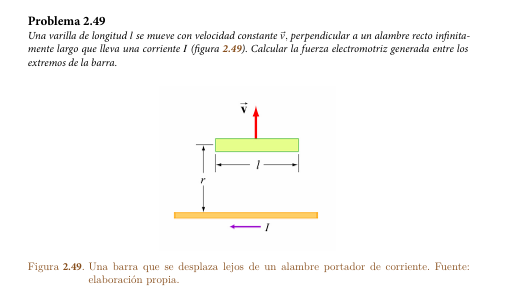

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

class BarraEnCampoMagnetico:
    """
    Problema 2.49: Barra conductora moviéndose en campo magnético
    Una varilla de longitud l se mueve con velocidad constante v,
    perpendicular a un alambre recto infinitamente largo que lleva corriente I
    """

    def __init__(self):
        self.mu_0 = constants.mu_0  # Permeabilidad del vacío
        self.pi = np.pi

    def campo_alambre_infinito(self, I, r):
        """
        Campo magnético producido por alambre recto infinito
        I: Corriente en el alambre (A)
        r: Distancia perpendicular al alambre (m)
        """
        B = (self.mu_0 * I) / (2 * self.pi * r)
        return B

    def fem_movimiento_barra(self, v, l, B_promedio):
        """
        FEM inducida por movimiento de barra en campo magnético
        v: velocidad de la barra (m/s)
        l: longitud de la barra (m)
        B_promedio: campo magnético promedio (T)
        """
        return B_promedio * l * v

    def fem_exacta_alambre_infinito(self, I, v, r1, r2):
        """
        FEM exacta para barra moviéndose cerca de alambre infinito
        I: Corriente en alambre (A)
        v: velocidad de barra (m/s)
        r1: distancia inicial al alambre (m)
        r2: distancia final al alambre (m)
        """
        factor = (self.mu_0 * I * v) / (2 * self.pi)
        fem = factor * np.log(r2/r1)
        return fem

    def fuerza_sobre_barra(self, I_barra, l, B_promedio):
        """
        Fuerza magnética sobre barra con corriente
        I_barra: corriente en la barra (A)
        l: longitud de la barra (m)
        B_promedio: campo magnético promedio (T)
        """
        F = I_barra * l * B_promedio
        return F

    def resolver_problema_completo(self, I_alambre, v_barra, l_barra, d_inicial, R_total):
        """
        Resuelve el problema completo de la barra moviéndose
        """
        print("=== PROBLEMA 2.49: BARRA EN CAMPO MAGNÉTICO ===\n")
        print("DATOS DEL PROBLEMA:")
        print(f"• Corriente en alambre infinito: I = {I_alambre:.1f} A")
        print(f"• Velocidad de la barra: v = {v_barra:.1f} m/s")
        print(f"• Longitud de la barra: l = {l_barra:.2f} m")
        print(f"• Distancia inicial al alambre: d = {d_inicial:.2f} m")
        print(f"• Resistencia total del circuito: R = {R_total:.4f} Ω")
        print("-" * 60)

        # Distancia final después de longitud de barra
        d_final = d_inicial + l_barra

        print(f"\nDISTANCIAS:")
        print(f"• Extremo más cercano al alambre: r₁ = {d_inicial:.3f} m")
        print(f"• Extremo más lejano al alambre: r₂ = {d_final:.3f} m")

        # Campo magnético en los extremos
        B1 = self.campo_alambre_infinito(I_alambre, d_inicial)
        B2 = self.campo_alambre_infinito(I_alambre, d_final)
        B_promedio = (B1 + B2) / 2

        print(f"\nCAMPOS MAGNÉTICOS:")
        print(f"• Campo en extremo cercano: B₁ = μ₀I/(2πr₁) = {B1:.6f} T")
        print(f"• Campo en extremo lejano: B₂ = μ₀I/(2πr₂) = {B2:.6f} T")
        print(f"• Campo promedio: B_prom = {B_promedio:.6f} T")

        # FEM inducida (método exacto)
        fem_exacta = self.fem_exacta_alambre_infinito(I_alambre, v_barra, d_inicial, d_final)

        # FEM aproximada usando campo promedio
        fem_aproximada = self.fem_movimiento_barra(v_barra, l_barra, B_promedio)

        print(f"\nFEM INDUCIDA:")
        print(f"• FEM exacta: ε = (μ₀Iv/2π)ln(r₂/r₁) = {fem_exacta:.6f} V")
        print(f"• FEM aproximada: ε ≈ B_prom × l × v = {fem_aproximada:.6f} V")
        print(f"• Error relativo: {abs(fem_exacta - fem_aproximada)/fem_exacta*100:.2f}%")

        # Corriente inducida
        I_inducida = fem_exacta / R_total

        print(f"\nCORRIENTE INDUCIDA:")
        print(f"• I_inducida = ε/R = {fem_exacta:.6f}/{R_total:.4f} = {I_inducida:.4f} A")

        # Fuerza electromagnética sobre la barra
        F_magnetica = self.fuerza_sobre_barra(I_inducida, l_barra, B_promedio)

        print(f"\nFUERZA ELECTROMAGNÉTICA:")
        print(f"• F = I_barra × l × B_prom = {I_inducida:.4f} × {l_barra:.2f} × {B_promedio:.6f}")
        print(f"• F = {F_magnetica:.6f} N")

        # Dirección de la fuerza (Ley de Lenz)
        print(f"\nDIRECCIÓN DE LA FUERZA:")
        print("• Por la Ley de Lenz, la fuerza se opone al movimiento")
        print("• La fuerza actúa hacia la izquierda (frenando la barra)")

        # Potencia disipada
        potencia = fem_exacta * I_inducida

        print(f"\nPOTENCIA:")
        print(f"• Potencia disipada: P = ε × I = {potencia:.6f} W")
        print(f"• Potencia mecánica requerida: P_mec = F × v = {potencia:.6f} W")

        return {
            'fem_exacta': fem_exacta,
            'fem_aproximada': fem_aproximada,
            'corriente': I_inducida,
            'fuerza': F_magnetica,
            'potencia': potencia,
            'B1': B1,
            'B2': B2,
            'B_promedio': B_promedio
        }

    def analisis_variacion_distancia(self, I_alambre, v_barra, l_barra, d_array, R_total):
        """
        Análisis de cómo varían las magnitudes con la distancia
        """
        fem_array = []
        fuerza_array = []

        for d in d_array:
            fem = self.fem_exacta_alambre_infinito(I_alambre, v_barra, d, d + l_barra)
            I_ind = fem / R_total
            B_prom = (self.campo_alambre_infinito(I_alambre, d) +
                     self.campo_alambre_infinito(I_alambre, d + l_barra)) / 2
            F = I_ind * l_barra * B_prom

            fem_array.append(fem)
            fuerza_array.append(F)

        return np.array(fem_array), np.array(fuerza_array)

    def graficar_resultados(self, I_alambre, v_barra, l_barra, R_total):
        """
        Gráficos del problema
        """
        # Rango de distancias
        d_min = 0.01  # 1 cm
        d_max = 0.5   # 50 cm
        d_array = np.linspace(d_min, d_max, 100)

        # Análisis
        fem_array, fuerza_array = self.analisis_variacion_distancia(
            I_alambre, v_barra, l_barra, d_array, R_total
        )

        # Campo magnético vs distancia
        B_array = np.array([self.campo_alambre_infinito(I_alambre, d) for d in d_array])

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

        # Campo magnético vs distancia
        ax1.plot(d_array*100, B_array*1000, 'b-', linewidth=2)
        ax1.set_xlabel('Distancia al alambre (cm)')
        ax1.set_ylabel('Campo magnético (mT)')
        ax1.set_title('Campo Magnético vs Distancia')
        ax1.grid(True, alpha=0.3)
        ax1.set_yscale('log')

        # FEM vs distancia
        ax2.plot(d_array*100, fem_array*1000, 'g-', linewidth=2)
        ax2.set_xlabel('Distancia inicial (cm)')
        ax2.set_ylabel('FEM inducida (mV)')
        ax2.set_title('FEM Inducida vs Distancia Inicial')
        ax2.grid(True, alpha=0.3)

        # Fuerza vs distancia
        ax3.plot(d_array*100, fuerza_array*1000, 'r-', linewidth=2)
        ax3.set_xlabel('Distancia inicial (cm)')
        ax3.set_ylabel('Fuerza electromagnética (mN)')
        ax3.set_title('Fuerza Electromagnética vs Distancia')
        ax3.grid(True, alpha=0.3)

        # Configuración geométrica
        ax4.set_xlim(-0.1, 0.6)
        ax4.set_ylim(-0.1, 0.3)

        # Alambre (línea vertical)
        ax4.axvline(x=0, color='orange', linewidth=4, label='Alambre con corriente I')

        # Barra en posición inicial
        d_ejemplo = 0.1
        ax4.plot([d_ejemplo, d_ejemplo], [0.1, 0.1 + l_barra], 'b-', linewidth=6,
                label=f'Barra conductora (l = {l_barra}m)')

        # Flecha de velocidad
        ax4.arrow(d_ejemplo + 0.05, 0.15, 0.1, 0, head_width=0.02,
                 head_length=0.02, fc='red', ec='red', label='Velocidad v')

        # Campo magnético (círculos concéntricos)
        for r in [0.05, 0.1, 0.2, 0.3]:
            circle = plt.Circle((0, 0.15), r, fill=False, linestyle='--',
                              alpha=0.5, color='green')
            ax4.add_patch(circle)

        ax4.set_xlabel('Posición x (m)')
        ax4.set_ylabel('Posición y (m)')
        ax4.set_title('Configuración del Problema')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')

        plt.tight_layout()
        plt.show()

# Ejemplo de aplicación
def ejemplo_problema_2_49():
    # Crear instancia
    problema = BarraEnCampoMagnetico()

    # Parámetros típicos del problema
    I_alambre = 10.0      # Corriente en alambre (A)
    v_barra = 2.0         # Velocidad de barra (m/s)
    l_barra = 0.20        # Longitud de barra (m)
    d_inicial = 0.05      # Distancia inicial (m) = 5 cm
    R_total = 0.001       # Resistencia total (Ω) = 1 mΩ

    # Resolver problema
    resultado = problema.resolver_problema_completo(
        I_alambre, v_barra, l_barra, d_inicial, R_total
    )

    print("\n" + "="*60)
    print("ANÁLISIS FÍSICO:")
    print("• La barra corta líneas de campo → se induce FEM")
    print("• La FEM genera corriente → aparece fuerza magnética")
    print("• La fuerza se opone al movimiento (Ley de Lenz)")
    print("• Se requiere trabajo externo para mantener velocidad constante")

    # Graficar resultados
    # problema.graficar_resultados(I_alambre, v_barra, l_barra, R_total)

    return resultado

# Ejecutar ejemplo
if __name__ == "__main__":
    resultado = ejemplo_problema_2_49()

    print(f"\nRESUMEN DE RESULTADOS:")
    print(f"• FEM inducida: {resultado['fem_exacta']*1000:.2f} mV")
    print(f"• Corriente: {resultado['corriente']*1000:.2f} mA")
    print(f"• Fuerza electromagnética: {resultado['fuerza']*1000:.2f} mN")
    print(f"• Potencia disipada: {resultado['potencia']*1000:.2f} mW")

=== PROBLEMA 2.49: BARRA EN CAMPO MAGNÉTICO ===

DATOS DEL PROBLEMA:
• Corriente en alambre infinito: I = 10.0 A
• Velocidad de la barra: v = 2.0 m/s
• Longitud de la barra: l = 0.20 m
• Distancia inicial al alambre: d = 0.05 m
• Resistencia total del circuito: R = 0.0010 Ω
------------------------------------------------------------

DISTANCIAS:
• Extremo más cercano al alambre: r₁ = 0.050 m
• Extremo más lejano al alambre: r₂ = 0.250 m

CAMPOS MAGNÉTICOS:
• Campo en extremo cercano: B₁ = μ₀I/(2πr₁) = 0.000040 T
• Campo en extremo lejano: B₂ = μ₀I/(2πr₂) = 0.000008 T
• Campo promedio: B_prom = 0.000024 T

FEM INDUCIDA:
• FEM exacta: ε = (μ₀Iv/2π)ln(r₂/r₁) = 0.000006 V
• FEM aproximada: ε ≈ B_prom × l × v = 0.000010 V
• Error relativo: 49.12%

CORRIENTE INDUCIDA:
• I_inducida = ε/R = 0.000006/0.0010 = 0.0064 A

FUERZA ELECTROMAGNÉTICA:
• F = I_barra × l × B_prom = 0.0064 × 0.20 × 0.000024
• F = 0.000000 N

DIRECCIÓN DE LA FUERZA:
• Por la Ley de Lenz, la fuerza se opone al movimiento
•

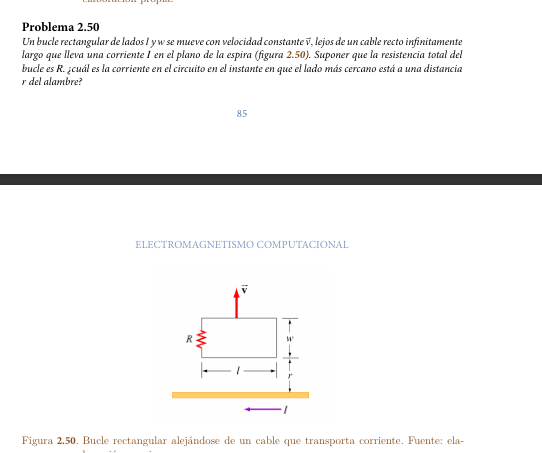

SOLUCIÓN PROBLEMA 2.50 - ESPIRA ALEJÁNDOSE DE CABLE CONDUCTOR
Parámetros del sistema:
- Dimensiones espira: 0.05 × 0.1 m
- Resistencia: 0.01 Ω
- Corriente en cable: 10.0 A
- Velocidad de alejamiento: 0.5 m/s
- Distancia inicial: 0.02 m

ANÁLISIS TEMPORAL:
--------------------------------------------------
t = 0s:
  Posición: r = 0.020 m
  Flujo magnético: Φ = 2.505526e-07 Wb
  EMF (Faraday): ε = 3.571429e-06 V
  EMF (Motional): ε = 3.571429e-06 V
  Corriente: I = 3.571429e-04 A
  Dirección: Sentido horario (vista desde arriba)
  Potencia disipada: P = 1.275510e-09 W

t = 1s:
  Posición: r = 0.520 m
  Flujo magnético: Φ = 1.836151e-08 Wb
  EMF (Faraday): ε = 1.686910e-08 V
  EMF (Motional): ε = 1.686910e-08 V
  Corriente: I = 1.686910e-06 A
  Dirección: Sentido horario (vista desde arriba)
  Potencia disipada: P = 2.845664e-14 W

t = 2s:
  Posición: r = 1.020 m
  Flujo magnético: Φ = 9.571204e-09 Wb
  EMF (Faraday): ε = 4.581272e-09 V
  EMF (Motional): ε = 4.581272e-09 V
  Corriente: I 

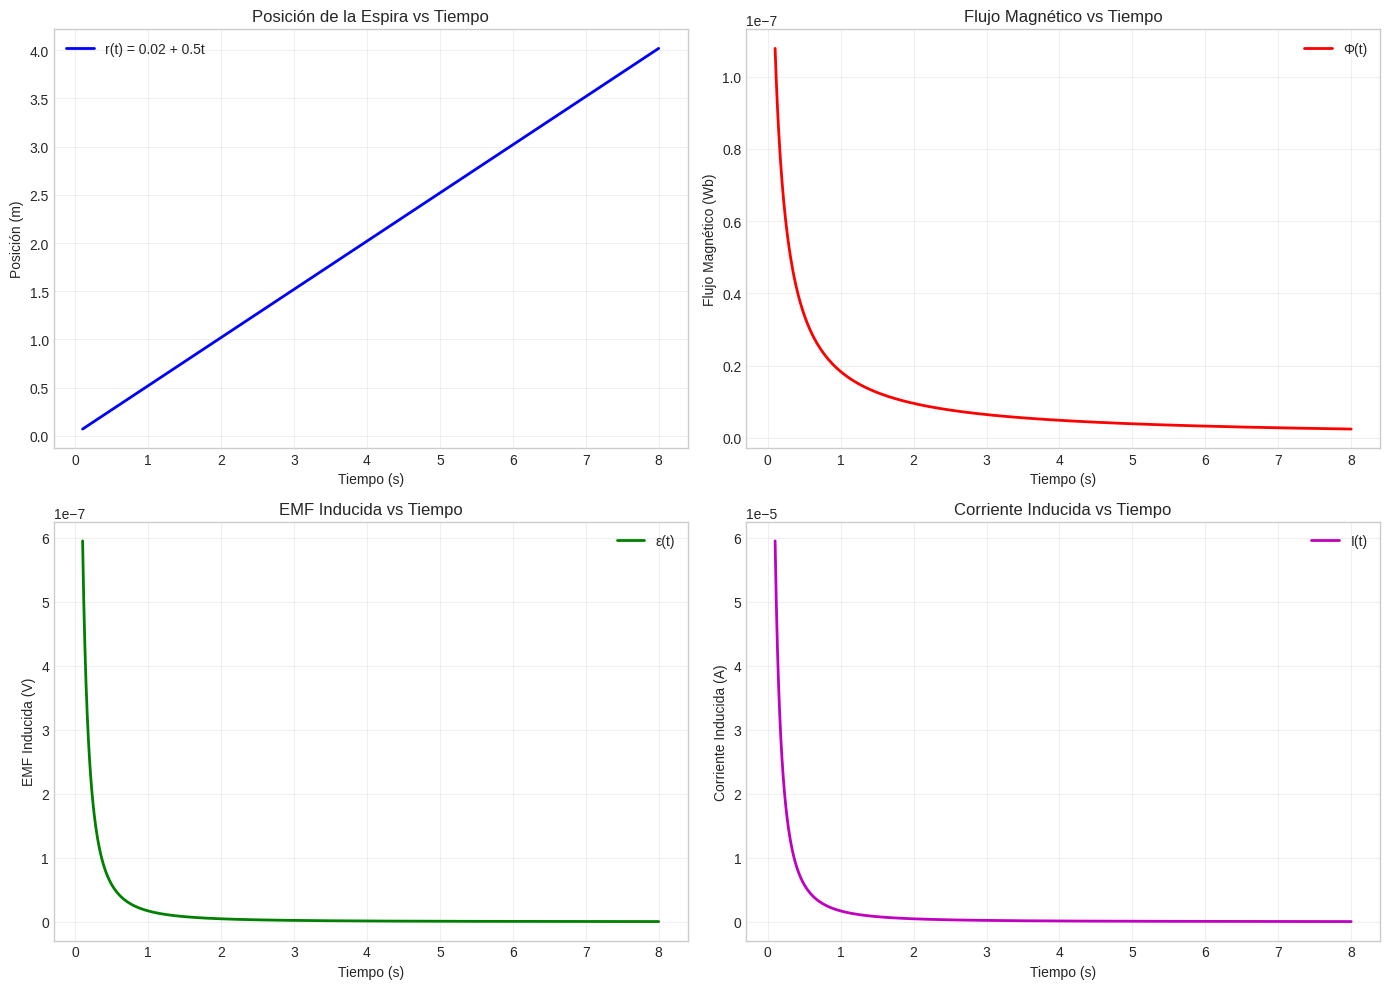

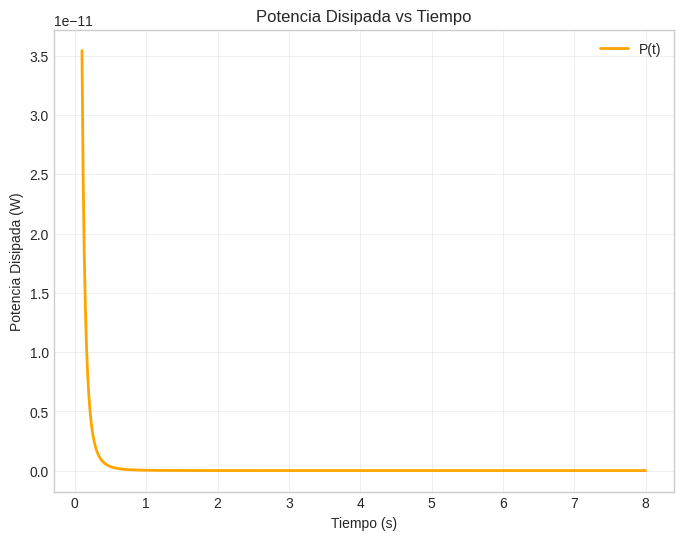


ANÁLISIS FÍSICO:
1. Conforme la espira se aleja, el flujo magnético disminuye
2. La EMF inducida es proporcional a 1/r² aproximadamente
3. La corriente inducida también decrece con el tiempo
4. La potencia disipada decrece aún más rápidamente (∝ 1/r⁴)
5. La dirección de la corriente se opone a la disminución del flujo
6. Ambos métodos (Faraday y EMF motional) dan resultados idénticos


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problema 2.50: Espira rectangular alejándose de un cable con corriente
# La espira se mueve con velocidad constante v alejándose del cable

class EspiraCableConductor:
    def __init__(self, ancho_w, alto_l, resistencia_R, corriente_I, velocidad_v, distancia_inicial_r):
        """
        Parámetros:
        - ancho_w: ancho de la espira (perpendicular al cable)
        - alto_l: alto de la espira (paralelo al cable)
        - resistencia_R: resistencia total de la espira en ohms
        - corriente_I: corriente en el cable conductor (constante)
        - velocidad_v: velocidad de alejamiento (constante)
        - distancia_inicial_r: distancia inicial del borde más cercano al cable
        """
        self.w = ancho_w
        self.l = alto_l
        self.R = resistencia_R
        self.I = corriente_I
        self.v = velocidad_v
        self.r0 = distancia_inicial_r
        self.mu0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío

    def campo_magnetico_cable(self, r):
        """
        Campo magnético de un cable infinito con corriente I
        B = (μ₀I)/(2πr) en dirección tangencial (regla mano derecha)
        """
        return (self.mu0 * self.I) / (2 * np.pi * r)

    def posicion_espira(self, t):
        """
        Posición del borde más cercano de la espira en función del tiempo
        r(t) = r₀ + vt
        """
        return self.r0 + self.v * t

    def flujo_magnetico(self, t):
        """
        Flujo magnético a través de la espira
        Φ = ∫∫ B⃗ · dA⃗ = ∫[r(t) to r(t)+w] B(r') × l dr'
        Φ = (μ₀Il)/(2π) × ln((r+w)/r)
        """
        r_t = self.posicion_espira(t)
        phi = (self.mu0 * self.I * self.l) / (2 * np.pi) * np.log((r_t + self.w) / r_t)
        return phi

    def fuerza_electromoriz_inducida(self, t):
        """
        EMF inducida usando la Ley de Faraday: ε = -dΦ/dt

        Método 1: Derivada del flujo
        dΦ/dt = (μ₀Il)/(2π) × d/dt[ln((r+w)/r)]
        dΦ/dt = (μ₀Il)/(2π) × [1/(r+w) - 1/r] × dr/dt
        dΦ/dt = (μ₀Il)/(2π) × [-w/(r(r+w))] × v
        """
        r_t = self.posicion_espira(t)

        # Derivada del logaritmo
        d_ln_dt = (1/(r_t + self.w) - 1/r_t) * self.v
        d_phi_dt = (self.mu0 * self.I * self.l) / (2 * np.pi) * d_ln_dt

        # EMF inducida (con signo negativo de Faraday)
        emf = -d_phi_dt
        return emf

    def fuerza_electromoriz_motional(self, t):
        """
        EMF inducida usando el concepto de EMF motional
        ε = ∫ (v⃗ × B⃗) · dl⃗

        Solo los segmentos paralelos al movimiento contribuyen:
        - Segmento cercano: ε₁ = v × B(r) × l = v × (μ₀I)/(2πr) × l
        - Segmento lejano: ε₂ = v × B(r+w) × l = v × (μ₀I)/(2π(r+w)) × l
        - EMF total: ε = ε₁ - ε₂ (direcciones opuestas)
        """
        r_t = self.posicion_espira(t)

        B_cerca = self.campo_magnetico_cable(r_t)
        B_lejos = self.campo_magnetico_cable(r_t + self.w)

        emf_cerca = self.v * B_cerca * self.l
        emf_lejos = self.v * B_lejos * self.l

        emf_total = emf_cerca - emf_lejos
        return emf_total

    def corriente_inducida(self, t):
        """
        Corriente inducida: I = ε/R
        """
        emf = self.fuerza_electromoriz_inducida(t)
        corriente = emf / self.R
        return corriente

    def direccion_corriente(self, t):
        """
        Determina la dirección usando la Ley de Lenz
        """
        corriente = self.corriente_inducida(t)
        if corriente > 0:
            return "Sentido horario (vista desde arriba)"
        elif corriente < 0:
            return "Sentido antihorario (vista desde arriba)"
        else:
            return "No hay corriente inducida"

    def potencia_disipada(self, t):
        """
        Potencia disipada en la resistencia: P = I²R = ε²/R
        """
        emf = self.fuerza_electromoriz_inducida(t)
        potencia = (emf**2) / self.R
        return potencia

    def resolver_problema(self, tiempo_max=5):
        """Resuelve el problema completo y muestra resultados"""
        print("=" * 70)
        print("SOLUCIÓN PROBLEMA 2.50 - ESPIRA ALEJÁNDOSE DE CABLE CONDUCTOR")
        print("=" * 70)
        print(f"Parámetros del sistema:")
        print(f"- Dimensiones espira: {self.w} × {self.l} m")
        print(f"- Resistencia: {self.R} Ω")
        print(f"- Corriente en cable: {self.I} A")
        print(f"- Velocidad de alejamiento: {self.v} m/s")
        print(f"- Distancia inicial: {self.r0} m")
        print()

        # Análisis en diferentes tiempos
        tiempos = [0, 1, 2, 3]

        print("ANÁLISIS TEMPORAL:")
        print("-" * 50)
        for t in tiempos:
            r_t = self.posicion_espira(t)
            phi_t = self.flujo_magnetico(t)
            emf_faraday = self.fuerza_electromoriz_inducida(t)
            emf_motional = self.fuerza_electromoriz_motional(t)
            corriente = self.corriente_inducida(t)
            potencia = self.potencia_disipada(t)

            print(f"t = {t}s:")
            print(f"  Posición: r = {r_t:.3f} m")
            print(f"  Flujo magnético: Φ = {phi_t:.6e} Wb")
            print(f"  EMF (Faraday): ε = {emf_faraday:.6e} V")
            print(f"  EMF (Motional): ε = {emf_motional:.6e} V")
            print(f"  Corriente: I = {corriente:.6e} A")
            print(f"  Dirección: {self.direccion_corriente(t)}")
            print(f"  Potencia disipada: P = {potencia:.6e} W")
            print()

        # Verificar que ambos métodos dan el mismo resultado
        print("VERIFICACIÓN DE MÉTODOS:")
        print("-" * 30)
        t_test = 1.0
        emf1 = self.fuerza_electromoriz_inducida(t_test)
        emf2 = self.fuerza_electromoriz_motional(t_test)
        print(f"EMF Ley de Faraday: {emf1:.8e} V")
        print(f"EMF Motional: {emf2:.8e} V")
        print(f"Diferencia relativa: {abs(emf1-emf2)/abs(emf1)*100:.2e}%")
        print()

        # Fórmulas analíticas
        self.mostrar_formulas()

        # Crear gráficas
        self.crear_graficas(tiempo_max)

    def mostrar_formulas(self):
        """Muestra las fórmulas derivadas analíticamente"""
        print("FÓRMULAS ANALÍTICAS:")
        print("-" * 20)
        print("1. Flujo magnético:")
        print("   Φ(t) = (μ₀Il)/(2π) × ln((r₀ + vt + w)/(r₀ + vt))")
        print()
        print("2. EMF inducida:")
        print("   ε = -dΦ/dt = (μ₀Ilv w)/(2π) × 1/((r₀ + vt)(r₀ + vt + w))")
        print()
        print("3. Corriente inducida:")
        print("   I = ε/R = (μ₀Ilv w)/(2πR) × 1/((r₀ + vt)(r₀ + vt + w))")
        print()
        print("4. Potencia disipada:")
        print("   P = ε²/R = (μ₀Ilv w)²/(2πR) × 1/((r₀ + vt)(r₀ + vt + w))²")
        print()

    def crear_graficas(self, tiempo_max):
        """Crea gráficas para visualizar el comportamiento temporal"""
        t = np.linspace(0.1, tiempo_max, 1000)  # Evitar t=0 por división por cero

        # Calcular valores
        posiciones = [self.posicion_espira(ti) for ti in t]
        flujos = [self.flujo_magnetico(ti) for ti in t]
        emfs = [self.fuerza_electromoriz_inducida(ti) for ti in t]
        corrientes = [self.corriente_inducida(ti) for ti in t]
        potencias = [self.potencia_disipada(ti) for ti in t]

        # Crear subplot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

        # Gráfica 1: Posición vs tiempo
        ax1.plot(t, posiciones, 'b-', linewidth=2, label=f'r(t) = {self.r0} + {self.v}t')
        ax1.set_xlabel('Tiempo (s)')
        ax1.set_ylabel('Posición (m)')
        ax1.set_title('Posición de la Espira vs Tiempo')
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        # Gráfica 2: Flujo magnético
        ax2.plot(t, flujos, 'r-', linewidth=2, label='Φ(t)')
        ax2.set_xlabel('Tiempo (s)')
        ax2.set_ylabel('Flujo Magnético (Wb)')
        ax2.set_title('Flujo Magnético vs Tiempo')
        ax2.grid(True, alpha=0.3)
        ax2.legend()

        # Gráfica 3: EMF inducida
        ax3.plot(t, emfs, 'g-', linewidth=2, label='ε(t)')
        ax3.set_xlabel('Tiempo (s)')
        ax3.set_ylabel('EMF Inducida (V)')
        ax3.set_title('EMF Inducida vs Tiempo')
        ax3.grid(True, alpha=0.3)
        ax3.legend()

        # Gráfica 4: Corriente inducida
        ax4.plot(t, corrientes, 'm-', linewidth=2, label='I(t)')
        ax4.set_xlabel('Tiempo (s)')
        ax4.set_ylabel('Corriente Inducida (A)')
        ax4.set_title('Corriente Inducida vs Tiempo')
        ax4.grid(True, alpha=0.3)
        ax4.legend()

        plt.tight_layout()
        plt.show()

        # Segunda figura para potencia
        plt.figure(figsize=(8, 6))
        plt.plot(t, potencias, 'orange', linewidth=2, label='P(t)')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Potencia Disipada (W)')
        plt.title('Potencia Disipada vs Tiempo')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()

# Ejemplo de uso con valores típicos
if __name__ == "__main__":
    # Parámetros del problema (valores típicos)
    ancho_w = 0.05      # 5 cm
    alto_l = 0.10       # 10 cm
    resistencia_R = 0.01  # 10 mΩ
    corriente_I = 10.0    # 10 A en el cable
    velocidad_v = 0.5     # 0.5 m/s
    distancia_inicial_r = 0.02  # 2 cm iniciales

    # Crear y resolver el problema
    sistema = EspiraCableConductor(ancho_w, alto_l, resistencia_R,
                                   corriente_I, velocidad_v, distancia_inicial_r)
    sistema.resolver_problema(tiempo_max=8)

    print("\n" + "="*70)
    print("ANÁLISIS FÍSICO:")
    print("="*70)
    print("1. Conforme la espira se aleja, el flujo magnético disminuye")
    print("2. La EMF inducida es proporcional a 1/r² aproximadamente")
    print("3. La corriente inducida también decrece con el tiempo")
    print("4. La potencia disipada decrece aún más rápidamente (∝ 1/r⁴)")
    print("5. La dirección de la corriente se opone a la disminución del flujo")
    print("6. Ambos métodos (Faraday y EMF motional) dan resultados idénticos")